# Global marine HC genes distribution project
Each section should be able to run independently.
When running each section, load everything in that section to make sure the data needed is there <br>

[I. IMG/M metagenomes metadata processing](#I) <br>

[II. Processing MEGAN csv class comparison output](#II) <br>
- [II-1. Functions to import and process megan csv files](#II1)<br>
- [II-2. Process Blast summary files](#II2)<br>
- [II-3. Get the deep vs shallow labels and clades files for taxonomic trees](#II3)<br>

[III. Processing reference Genomes meta and HC gene affiliation](#III)<br>
- [III-1. Taxonomic distribution plots](#III1) <br>
- [III-2. Get labels and clade color files for phylogenic trees of sequences](#III2) <br>
    [For AlkB reference sequences](#ALK) <br>
    [For RHO reference sequences](#RHO) <br>

[IV. Scraping EMBI-EBI for a subset of GOS](#IV)<br>
- [IV-1. Download EBI GOS metagenomes faa and process EBI meta data](#IV1)<br>
- [IV-2. Get total base pairs in EBI data](#IV2)<br>

[V. Analyzing gene distribution in metagenomes](#V)<br>
- [V-1. Box plots and histograms](#V1) <br>
- [V-2. Regression predictive model](#V2) <br>
- [V-3. Taxonomic plots](#V3) <br>
- [V-4. Statistical analyses](#V4)<br>
- [V-5. Analyzing GOS subset](#V5)<br>
- [V-6. Analyzing deep ocean subset](#V6)<br>

[VI. Geographic plotting of genes](#VI)<br>
- [VI-1. Plotting the all sample locations on interactive map](#VI1)<br>
- [VI-2. Plotting the distribution of genes on map](#VI2)<br>

[VII. Miscellaneous](#VII)

In [1]:
# Necessary packages, run first
import pandas as pd
import numpy as np
import csv
import string
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import seaborn as sns

## I. IMG/M metagenomes metadata processing <a class="anchor" id="I"></a>
This code processes the present hydrocarbon-degrading genes in metagenomes, including processing meta data and megan output

In [2]:
meta = pd.read_csv('IMG_metadata.csv')

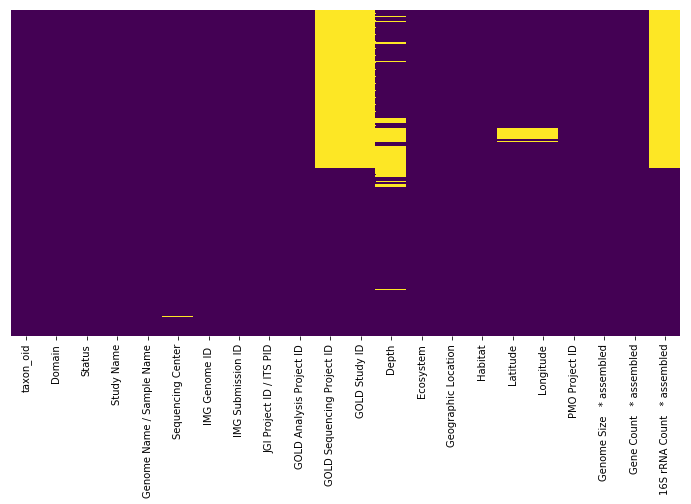

In [123]:
plt.figure(figsize=(12,6))
sns.heatmap(meta.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
meta['IMG Submission ID'].head()

0    21802
1    21795
2    12508
3    12505
4    21819
Name: IMG Submission ID, dtype: int64

In [6]:
RHO = pd.read_csv('RHO_genecount.csv')

In [14]:
RHO['IMG Submission ID'] = RHO['filename'].apply(lambda x:int(x.split('.')[0]))
RHO['IMG Genome ID '] = RHO['filename'].apply(lambda x:int(x.split('.')[0]))
meta['IMG Submission ID'] = meta['IMG Submission ID'].apply(lambda x:int(x))
combined_1 = pd.merge(RHO,meta,on=['IMG Submission ID'])
combined_2 = pd.merge(RHO,meta,on=['IMG Genome ID '])

In [100]:
combined_2.columns = ['Unnamed: 0', 'filename', 'count', 'IMG Submission ID',
       'IMG Genome ID', 'taxon_oid', 'Domain', 'Status', 'Study Name',
       'Genome Name / Sample Name', 'Sequencing Center',
       'JGI Project ID / ITS PID', 'GOLD Analysis Project ID',
       'GOLD Sequencing Project ID', 'GOLD Study ID', 'Depth', 'Ecosystem',
       'Geographic Location', 'Habitat', 'Latitude', 'Longitude',
       'PMO Project ID', 'Genome Size   * assembled',
       'Gene Count   * assembled', '16S rRNA Count   * assembled']

In [99]:
combined_1.columns = ['Unnamed: 0', 'filename', 'count', 'IMG Submission ID',
       'IMG Genome ID', 'taxon_oid', 'Domain', 'Status', 'Study Name',
       'Genome Name / Sample Name', 'Sequencing Center',
       'JGI Project ID / ITS PID', 'GOLD Analysis Project ID',
       'GOLD Sequencing Project ID', 'GOLD Study ID', 'Depth', 'Ecosystem',
       'Geographic Location', 'Habitat', 'Latitude', 'Longitude',
       'PMO Project ID', 'Genome Size   * assembled',
       'Gene Count   * assembled', '16S rRNA Count   * assembled']

In [104]:
combined = pd.concat([combined_1,combined_2],axis=0)
combined['RHO_percentage'] = combined['count']/combined['Gene Count   * assembled']*100

In [117]:
combined.columns

Index(['Unnamed: 0', 'filename', 'count', 'IMG Submission ID', 'IMG Genome ID',
       'taxon_oid', 'Domain', 'Status', 'Study Name',
       'Genome Name / Sample Name', 'Sequencing Center',
       'JGI Project ID / ITS PID', 'GOLD Analysis Project ID',
       'GOLD Sequencing Project ID', 'GOLD Study ID', 'Depth', 'Ecosystem',
       'Geographic Location', 'Habitat', 'Latitude', 'Longitude',
       'PMO Project ID', 'Genome Size   * assembled',
       'Gene Count   * assembled', '16S rRNA Count   * assembled',
       'RHO_percentage'],
      dtype='object')

In [120]:
combined['Habitat'].value_counts()

Marine                   309
Pelagic marine            41
Seawater                  19
seawater                  10
Freshwater and marine     10
Subsurface plume           4
surface seawater           4
marine                     3
Freshwater                 2
Hypersaline                1
Name: Habitat, dtype: int64

In [124]:
combined['Sequencing Center'].value_counts()

DOE Joint Genome Institute (JGI)                321
J. Craig Venter Institute (JCVI)                 57
University of Maryland                           10
Major University, Chile                           4
Oregon State University                           2
Max Planck Institute for Marine Microbiology      2
University of Hawaii                              1
Technion-Israel Institute of Technology           1
Pennsylvania State University                     1
University of Southern California                 1
University of Washington                          1
Royal Institute of Technology                     1
Argonne National Laboratory                       1
Name: Sequencing Center, dtype: int64

In [125]:
sediment = [name for name in combined['Study Name'] if 'sediment' in name.lower()]

In [127]:
len(sediment)

23

In [143]:
combined[combined['RHO_percentage']>0.2]['Study Name']

257    Marine microbial communities from Global Ocean...
265    Marine microbial communities from expanding ox...
273    Marine microbial communities from expanding ox...
274    Marine microbial communities from expanding ox...
Name: Study Name, dtype: object

In [49]:
rho = pd.read_csv("RHO_genecount.csv")
alk = pd.read_csv("AlkB_genecount.csv")
df = pd.merge(rho,alk,on=['filename'])
df.drop('Unnamed: 0_y',1,inplace=True)
df.columns = ['ID','IMG Genome ID ','RHO_count','AlkB_count']

In [51]:
df['IMG Genome ID ']=df['IMG Genome ID '].apply(lambda x:np.int(x.split('.')[0]))
df['IMG Submission ID'] = df['IMG Genome ID ']

In [35]:
meta = pd.read_csv("IMG_metadata.csv")
meta.drop_duplicates(keep='first',inplace=True)

In [79]:
meta_merge1 = pd.merge(meta,df,on=['IMG Genome ID '])
meta_merge1.drop('IMG Submission ID_y',1,inplace=True)
meta_merge1.columns = ['taxon_oid', 'Domain', 'Status', 'Study Name',
       'Genome Name / Sample Name', 'Sequencing Center', 'IMG Genome ID',
       'IMG Submission ID', 'JGI Project ID / ITS PID',
       'GOLD Analysis Project ID', 'GOLD Sequencing Project ID',
       'GOLD Study ID', 'Depth', 'Ecosystem', 'Geographic Location', 'Habitat',
       'Latitude', 'Longitude', 'PMO Project ID', 'Genome Size   * assembled',
       'Gene Count   * assembled', '16S rRNA Count   * assembled', 'ID',
       'RHO_count', 'AlkB_count']

In [80]:
meta_merge2 = pd.merge(meta,df,on=['IMG Submission ID'])
meta_merge2.drop('IMG Genome ID _y',1,inplace=True)
meta_merge2.columns = ['taxon_oid', 'Domain', 'Status', 'Study Name',
       'Genome Name / Sample Name', 'Sequencing Center', 'IMG Genome ID',
       'IMG Submission ID', 'JGI Project ID / ITS PID',
       'GOLD Analysis Project ID', 'GOLD Sequencing Project ID',
       'GOLD Study ID', 'Depth', 'Ecosystem', 'Geographic Location', 'Habitat',
       'Latitude', 'Longitude', 'PMO Project ID', 'Genome Size   * assembled',
       'Gene Count   * assembled', '16S rRNA Count   * assembled', 'ID',
       'RHO_count', 'AlkB_count']

In [81]:
meta_merge = pd.concat([meta_merge1,meta_merge2])

In [107]:
meta_merge['AlkB_percentage'] = meta_merge['AlkB_count']/meta_merge['Gene Count   * assembled'] * 100
meta_merge['AlkB_normalized'] = meta_merge['AlkB_count']/meta_merge['Genome Size   * assembled']*10e6

In [105]:
meta_merge['RHO_percentage'] = meta_merge['RHO_count']/meta_merge['Gene Count   * assembled'] * 100
meta_merge['RHO_normalized'] = meta_merge['RHO_count']/meta_merge['Genome Size   * assembled']*10e6

In [146]:
coastal1 = [location for location in meta_merge['Genome Name / Sample Name'] if 'coastal' in location.lower()]

In [117]:
hypersaline = [location for location in meta_merge['Study Name'] if 'hypersaline' in location.lower()]

In [130]:
GOS = [location for location in meta_merge['Study Name'] if 'gos' in location.lower()]

In [122]:
sediment = [location for location in meta_merge['Study Name'] if 'sediment' in location.lower()]

In [147]:
len(coastal)

24

In [132]:
coastal2 = [location for location in meta_merge['Genome Name / Sample Name'] if 'coastal' in location.lower()]

In [148]:
meta_merge[meta_merge['Genome Name / Sample Name'].str.contains('Coast')]

,taxon_oid,Domain,Status,Study Name,Genome Name / Sample Name,Sequencing Center,IMG Genome ID,IMG Submission ID,JGI Project ID / ITS PID,GOLD Analysis Project ID,...,Genome Size * assembled,Gene Count * assembled,16S rRNA Count * assembled,ID,RHO_count,AlkB_count,AlkB_percentage,AlkB_normalized,RHO_percentage,RHO_normalized
76,3300000115,Metagenome,Finished,Marine microbial communities from Delaware Coast,Marine microbial communities from Delaware Coa...,DOE Joint Genome Institute (JGI),3300000115,7061,404854,Ga0026080,...,524209194,1204138,205.0,108,350,97,0.008056,1.850406,0.029066,6.676724
112,3300000117,Metagenome,Finished,Marine microbial communities from Delaware Coast,Marine microbial communities from Delaware Coa...,DOE Joint Genome Institute (JGI),3300000117,7063,403858,Ga0026082,...,575155359,1341985,255.0,110,503,90,0.006706,1.564795,0.037482,8.745463
113,3300000321,Metagenome,Finished,Marine microbial communities from Delaware Coast,Marine microbial communities from Delaware Coa...,DOE Joint Genome Institute (JGI),3300000321,9485,403858,Ga0026083,...,11256121,45129,168.0,216,6,5,0.011079,4.442028,0.013295,5.330433
114,3300000320,Metagenome,Draft,Marine microbial communities from Delaware Coast,Marine microbial communities from Delaware Coa...,DOE Joint Genome Institute (JGI),3300000320,9484,403856,Ga0026023,...,3880822,10893,37.0,384,0,2,0.018360,5.153547,0.000000,0.000000
115,3300000101,Metagenome,Draft,Marine microbial communities from Delaware Coast,Marine microbial communities from Delaware Coa...,DOE Joint Genome Institute (JGI),3300000101,7667,403856,Ga0026022,...,647909234,1375242,282.0,107,565,166,0.012071,2.562087,0.041084,8.720357
116,3300000116,Metagenome,Finished,Marine microbial communities from Delaware Coast,Marine microbial communities from Delaware Coa...,DOE Joint Genome Institute (JGI),3300000116,7062,403855,Ga0026081,...,590073671,1417215,280.0,109,289,104,0.007338,1.762492,0.020392,4.897694
51,3300001965,Metagenome,Permanent Draft,Marine microbial communities from Global Ocean...,Marine microbial communities from Coastal Flor...,J. Craig Venter Institute (JCVI),3300001965,21805,0,Gs0055716,...,135719211,247934,NaN,88,121,54,0.021780,3.978803,0.048803,8.915466
155,3300006352,Metagenome,Permanent Draft,Marine microbial communities from the West Ant...,Marine microbial communities from the West Ant...,DOE Joint Genome Institute (JGI),3300006352,72353,1074265,Gs0099540,...,703643715,2042806,NaN,317,1142,159,0.007783,2.259666,0.055903,16.229805
156,3300006191,Metagenome,Permanent Draft,Marine microbial communities from the West Ant...,Marine microbial communities from the West Ant...,DOE Joint Genome Institute (JGI),3300006191,72352,1074264,Gs0099540,...,800696355,2281572,NaN,316,1222,155,0.006794,1.935815,0.053560,15.261716
157,3300006190,Metagenome,Permanent Draft,Marine microbial communities from the West Ant...,Marine microbial communities from the West Ant...,DOE Joint Genome Institute (JGI),3300006190,71590,1074263,Gs0099540,...,564462456,1566335,NaN,314,685,96,0.006129,1.700733,0.043733,12.135440


In [ ]:
meta_merge.to_csv('IMG_meta_AlkB_RHO.csv')

In [249]:
# Import meta data
meta = pd.read_csv("IMG_metadata.csv")
meta = meta.drop(['taxon_oid','Domain','GOLD Sequencing Project ID','Ecosystem',
       'GOLD Study ID','JGI Project ID / ITS PID','PMO Project ID','16S rRNA Count   * assembled'],1)
meta.rename(index=str, columns={"IMG Genome ID ": "IMG Genome ID"},inplace=True)

# Assign coastal, open, or saline locations
locations  = []
for i in range(0,meta.shape[0]):
    if 'coast' in meta['Genome Name / Sample Name'].iloc[i].lower():
        locations.append('coastal')
    elif 'saline' in meta['Genome Name / Sample Name'].iloc[i].lower():
        locations.append('hypersaline')
    else:
        locations.append('open')
# Append locations as new column to meta df
meta['location'] = locations

In [76]:
for i in range(df.shape[0]):
    if 'fresh' in df['Relative location'].iloc[i]:
        df['Relative location'].iloc[i] = 'fresh water'
    elif 'coast' in df['Relative location'].iloc[i]:
        df['Relative location'].iloc[i] = 'coastal'
df.to_csv('IMG_EBI_metadata.csv')

/Users/uyennguyen/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


## II. Processing MEGAN csv class comparison output<a class="anchor" id="II"></a>

### II-1. Functions to import and process megan csv files <a class="anchor" id="II1"></a>
Sample ID needs to be in format that contains '.' between the ID and the extension. E.g, 26688.assembled.faa_RHO.faa.RHO.blast

In [82]:
def megan_level(filename,taxonlevel):
    """
    Function to process compared megan txt files
    filename
    taxonlevel: Kingdom, Phylum, Class
    """
    megan = pd.read_csv(filename)
    megan['Level'] = megan['#Datasets'].apply(lambda x:x.split(':')[0])
    megan['Taxon'] = megan['#Datasets'].apply(lambda x:x.split(':')[1].strip('""'))
    megan.drop('#Datasets',1,inplace=True)
    phylum = megan[megan['Level']==taxonlevel]
    phylum.drop('Level',1,inplace=True)
    phylum.set_index('Taxon',inplace=True)
    phylum_T = phylum.T
    phylum_T['IMG Genome ID'] = phylum_T.index
    phylum_T['IMG Genome ID'] = phylum_T['IMG Genome ID'].apply(lambda x:x.split('.')[0])
    phylum_T['IMG Submission ID'] = phylum_T['IMG Genome ID']
    
    return phylum_T

def get_merge_data(foldername,taxonlevel):
    """
    Function to merge all processed megan files
    foldername
    taxonlevel: Kingdom, Phylum, Class,Order,Family,Genus
    """
    megan_merge = megan_level(foldername+filenames[0],taxonlevel)
    for file in filenames[1:]:
        processed_file = megan_level(foldername+file,taxonlevel)
        megan_merge = pd.concat([megan_merge,processed_file], axis=0, ignore_index=True)
    megan_merge.fillna(value=0,inplace=True)
    
    return megan_merge

def merge_with_meta(gene_df,meta_df):
    """
    Function to merge megan file with meta data
    gene_df: output from the get_merge_data function
    meta_df: meta df
    """
    gene_df.drop_duplicates(subset=['IMG Genome ID'],keep='first',inplace=True)
    meta_gene_2 = pd.merge(gene_df,meta_df,on=['IMG Submission ID'])
    meta_gene_1 = pd.merge(gene_df,meta_df,on=['IMG Genome ID'])
    meta_gene_1.drop('IMG Submission ID_y',axis=1,inplace=True)
    meta_gene_1.rename(index=str, columns={"IMG Submission ID_x": "IMG Submission ID"},inplace=True)
    meta_gene_2.drop('IMG Genome ID_y',axis=1,inplace=True)
    meta_gene_2.rename(index=str, columns={"IMG Genome ID_x": "IMG Genome ID"},inplace=True)
    meta_gene = pd.concat([meta_gene_1, meta_gene_2])
    meta_gene.drop_duplicates(subset=['IMG Genome ID'],keep='first',inplace=True)
    
    return meta_gene


### Apply to the data

In [98]:
# Load the Megan filename and folder
pathtofilenames = 'Redo_AlkB_megan/Redo_AlkB_megan.csv'
foldername = "Redo_AlkB_megan/"
with open(pathtofilenames,'r') as f:
    filenames = [line.rstrip() for line in f]

In [622]:
ind = []
for filename in filenames:
    ind += list(megan_level(foldername+filename,"Family").index)

/Users/uyennguyen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [84]:
df = pd.read_csv("IMG_EBI_metadata_chemdata.csv",index_col=0)
df['IMG Submission ID'].fillna(value=0,inplace=True)
df['IMG Submission ID']=df['IMG Submission ID'].apply(lambda x:str(int(x)))
df.rename(index=str, columns={"IMG Genome ID ": "IMG Genome ID"},inplace=True)

In [235]:
df[df['Sample type']=='water']['Ocean'].value_counts().reset_index()

,index,Ocean
0,North Pacific,289
1,North Atlantic,186
2,South Atlantic,57
3,Mediterranean,47
4,South Pacific,40
5,South Indian,25
6,Black Sea,15
7,Arctic,12
8,Antarctica,9


In [38]:
df['Genome Size   * assembled'].describe()

count    7.700000e+02
mean     2.927952e+08
std      5.489865e+08
min      4.128500e+04
25%      3.459754e+07
50%      9.497701e+07
75%      2.918556e+08
max      6.556162e+09
Name: Genome Size   * assembled, dtype: float64

In [109]:
# Process megan file for AlkB, at Class level
gene_df = get_merge_data(foldername,"Genus")

# Merge with meta data
meta_gene = merge_with_meta(gene_df,df)
#meta_gene.drop(['Unnamed: 0', 'Unnamed: 0.1'],1,inplace=True)

/Users/uyennguyen/anaconda3/envs/TEST/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/uyennguyen/anaconda3/envs/TEST/lib/python3.6/site-packages/ipykernel_launcher.py:30: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [100]:
meta_gene.shape

(676, 43)

In [613]:
nomatchlist = []
for i in range(gene_df.shape[0]):
    if gene_df['IMG Genome ID'].iloc[i] not in list(df['IMG Genome ID']) and gene_df['IMG Genome ID'].iloc[i] not in list(df['IMG Submission ID']):
        nomatchlist.append(i)
    

In [614]:
gene_df[gene_df['IMG Genome ID']=='21821']

,Actinobacteria,Alphaproteobacteria,Bacilli,Bacteroidia,Betaproteobacteria,Chloroflexia,Cytophagia,Deferribacteres,Deltaproteobacteria,Flavobacteriia,...,IMG Genome ID,IMG Submission ID,Insecta,Leotiomycetes,Mammalia,Nitrospira <class>,Oligoflexia,Sordariomycetes,Sphingobacteriia,Thermoprotei
333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21821,21821,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [615]:
meta_gene[meta_gene['IMG Genome ID']=='21821']

,Actinobacteria,Alphaproteobacteria,Bacilli,Bacteroidia,Betaproteobacteria,Chloroflexia,Cytophagia,Deferribacteres,Deltaproteobacteria,Flavobacteriia,...,Genome Name / Sample Name,Genome Size * assembled,Geographic Location,Habitat,Latitude,Longitude,Relative location,Sequencing Center,Study Name,Sample type
299,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Marine microbial communities from Polynesia - ...,562395,Polynesia,Marine,-8.415,-124.23972,open ocean,J. Craig Venter Institute (JCVI),Marine microbial communities from Global Ocean...,water


In [616]:
df[df['IMG Genome ID']=='MGYA00034809']

,Depth,Genome Name / Sample Name,Genome Size * assembled,Geographic Location,Habitat,IMG Genome ID,IMG Submission ID,Latitude,Longitude,Relative location,Sequencing Center,Study Name,Sample type
685,2.0,Water sample taken on 2009-05-21 11:00 AM +000...,49238456,North Atlantic Ocean:Northern European Seas:Ce...,NaN,MGYA00034809,0,50.249832,-4.216942,coastal,J. Craig Venter Institute (JCVI),Marine microbial communities from Global Ocean...,water


In [233]:
df.columns

Index(['Unnamed: 0', 'Depth', 'Genome Name / Sample Name',
       'Genome Size   * assembled', 'Geographic Location', 'Habitat',
       'IMG Genome ID', 'IMG Submission ID', 'Latitude', 'Longitude', 'Ocean',
       'Relative location', 'Sample type', 'Sequencing Center', 'Study Name',
       'Phosphate', 'Dissolved_oxygen', 'Nitrate', 'Apparent_oxygen',
       'Temperature', 'Salinity', 'Oxygen_saturation', 'DOC', 'DON', 'DOP'],
      dtype='object')

In [110]:
notinlist = []
for i in range(df.shape[0]):
    if df['IMG Genome ID'].iloc[i] not in list(meta_gene['IMG Genome ID']) and df['IMG Submission ID'].iloc[i] not in list(meta_gene['IMG Submission ID']):
        notinlist.append(i)

df_notinlist = df[['Depth', 'Genome Name / Sample Name','Ocean',
       'Genome Size   * assembled', 'Geographic Location', 'Habitat',
       'IMG Genome ID', 'IMG Submission ID', 'Latitude', 'Longitude',
       'Relative location', 'Sequencing Center', 'Study Name', 'Sample type',
        'Phosphate', 'Dissolved_oxygen', 'Nitrate', 'Apparent_oxygen',
        'Temperature', 'Salinity', 'Oxygen_saturation', 'DOC', 'DON', 'DOP']].iloc[notinlist]

nontaxon_cols = ['Genome Name / Sample Name','Relative location',
                 'Genome Size   * assembled', 'Geographic Location', 'Habitat',
                 'Longitude','Latitude','IMG Genome ID', 'IMG Submission ID',
                 'Sample type', 'Sequencing Center','Study Name','Depth','Ocean',
                 'Phosphate', 'Dissolved_oxygen', 'Nitrate', 'Apparent_oxygen',
                 'Temperature', 'Salinity', 'Oxygen_saturation', 'DOC', 'DON', 'DOP']
taxon_cols = list(set(meta_gene.columns)-set(nontaxon_cols))

for c in taxon_cols:
    df_notinlist[c] = np.zeros(df_notinlist.shape[0])

merge = pd.concat([meta_gene,df_notinlist])

/Users/uyennguyen/anaconda3/envs/TEST/lib/python3.6/site-packages/ipykernel_launcher.py:24: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [111]:
merge['Total AlkB hits'] = merge[taxon_cols].sum(axis=1)
merge['AlkB hits/Gbp'] = merge['Total AlkB hits']/merge['Genome Size   * assembled']*1000000000

In [113]:
merge['Ocean'].head(2)

0    North Pacific
1    North Pacific
Name: Ocean, dtype: object

In [112]:
merge.to_csv('AlkB_meta_genus.csv')

In [21]:
meta_RHO_count = RHO_meta.groupby('Relative location').sum()
meta_RHO_count.drop(['Latitude', 'Longitude','Depth','Unnamed: 0'],axis=1,inplace=True)
meta_RHO_count

,Actinobacteria,Alphaproteobacteria,Bacilli,Betaproteobacteria,Bryopsida,Caldisericia,Chloroflexia,Chlorophyceae,Clostridia,Cytophagia,...,Mammalia,Maxillopoda,Nitrospira <class>,Oligoflexia,Sordariomycetes,Sphingobacteriia,Spirochaetia,Thermotogae,Verrucomicrobiae,Genome Size * assembled
Relative location,,,,,,,,,,,,,,,,,,,,,
coastal,1014.0,4330.0,252.0,558.0,28.0,4.0,159.0,51.0,1.0,1.0,...,11.0,0.0,2.0,14.0,0.0,0.0,1.0,0.0,0.0,25299217742
coastal bloom,20.0,55.0,1.0,5.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,406861622
freshwater,11.0,20.0,14.0,31.0,2.0,0.0,2.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,435592938
hypersaline,2.0,14.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,210753851
open ocean,6701.0,25919.0,4519.0,6445.0,82.0,56.0,1987.0,125.0,14.0,8.0,...,19.0,6.0,57.0,71.0,13.0,1.0,22.0,4.0,1.0,152414608271


In [53]:
df['Sample type'] = sample_types
df.to_csv('IMG_EBI_metadata.csv')

In [51]:
GOM  = []
for i in range(0,MmoX_meta.shape[0]):
    if 'gulf of mexico' in MmoX_meta['Genome Name / Sample Name'].iloc[i].lower() or 'gulf of mexico' in MmoX_meta['Study Name'].iloc[i].lower():
        GOM.append(1)
    else:
        GOM.append(0)

MmoX_meta['GOM'] = GOM

In [52]:
MmoX_meta_GOM = MmoX_meta.groupby('GOM').sum()
MmoX_meta_GOM.drop(['IMG Genome ID','IMG Submission ID','Latitude', 'Longitude','Depth'],axis=1,inplace=True)

In [53]:
MmoX_meta_GOM

,Actinobacteria,Alphaproteobacteria,Bacilli,Bacteroidia,Betaproteobacteria,Chloroflexia,Cytophagia,Deferribacteres,Flavobacteriia,Gammaproteobacteria,Insecta,Leotiomycetes,Nitrospira <class>,Oligoflexia,Sordariomycetes,Sphingobacteriia,Thermoprotei,Genome Size * assembled,Gene Count * assembled
GOM,,,,,,,,,,,,,,,,,,,
0,1165.0,5762.0,8.0,16.0,986.0,10.0,111.0,1.0,12057.0,12352.0,2.0,3.0,3.0,6.0,33.0,64.0,1.0,180302246529,390725923
1,26.0,13.0,0.0,0.0,10.0,0.0,0.0,0.0,28.0,72.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,528117119,766237


In [54]:
MmoX_meta['GOM'].value_counts()

0    410
1      6
Name: GOM, dtype: int64

In [55]:
MmoX_meta_percent_nonGOM = MmoX_meta_GOM.iloc[0][0:11]/(MmoX_meta_GOM.iloc[0][0:11].sum())*100
MmoX_meta_percent_GOM = MmoX_meta_GOM.iloc[1][0:11]/(MmoX_meta_GOM.iloc[1][0:11].sum())*100
df = pd.DataFrame()
df['nonGOM'] = MmoX_meta_percent_nonGOM
df['GOM'] = MmoX_meta_percent_GOM
df.to_csv('GOM_AlkB_classpercentages.csv')

In [56]:
df

,nonGOM,GOM
Actinobacteria,3.587927,17.333333
Alphaproteobacteria,17.745611,8.666667
Bacilli,0.024638,0.000000
Bacteroidia,0.049276,0.000000
Betaproteobacteria,3.036649,6.666667
Chloroflexia,0.030798,0.000000
Cytophagia,0.341854,0.000000
Deferribacteres,0.003080,0.000000
Flavobacteriia,37.132738,18.666667
Gammaproteobacteria,38.041269,48.000000


In [182]:
meta_RHO_location = meta_RHO.groupby('Geographic Location').sum()
#meta_RHO_location.drop(['IMG Genome ID','IMG Submission ID','Latitude', 'Longitude','RHO_count'],axis=1,inplace=True)

In [183]:
meta_RHO_location.to_csv('RHO_rawcount_bygeographic.csv')

In [186]:
meta_AlkB['location'].value_counts()

open           366
coastal         39
hypersaline      1
Name: location, dtype: int64

### Combine Alk, RHO, MmoX into one df

In [57]:
rho = pd.read_csv('RHO_meta.csv')
alk = pd.read_csv('AlkB_meta.csv')
mmo = pd.read_csv('MmoX_meta.csv')
rho = rho[['IMG Genome ID','IMG Submission ID','Total RHO raw counts', 'RHO hits/Gbp', 'Latitude', 'Longitude','Depth']]
alk = alk[['IMG Genome ID','Latitude', 'Longitude','Total AlkB raw counts', 'AlkB hits/Gbp','Depth']]
mmo = mmo[['IMG Genome ID','Total MmoX raw counts','Total hits/Gbp']]
df = pd.merge(alk,mmo,how='left',on=['IMG Genome ID'])
df1 = pd.merge(rho,df,how='left',left_on=['IMG Submission ID'],right_on=['IMG Genome ID'])
df2 = pd.merge(rho,df,how='left',on=['IMG Genome ID'])
df1.to_csv('AlkB_RHO_MMO_summary_1.csv')
df2.to_csv('AlkB_RHO_MMO_summary_2.csv')

### II-2. Process Blast summary files <a class="anchor" id="II2"></a>

In [6]:
# Import IMG metadata
IMG = pd.read_csv('IMG_EBI_metadata.csv')
IMG.head(2)

,Depth,Genome Name / Sample Name,Genome Size * assembled,Geographic Location,Habitat,IMG Genome ID,IMG Submission ID,Latitude,Longitude,Relative location,Sequencing Center,Study Name,Sample type
0,1.1,"Marine microbial communities from Dirty Rock, ...",88355364,"Dirty Rock, Cocos Island, Costa Rica",Marine,3300001961,21802,5.552778,-87.087776,coral reef,J. Craig Venter Institute (JCVI),Marine microbial communities from Global Ocean...,water
1,2.0,Marine microbial communities from Yucatan Chan...,174719720,"Yucatan Channel, Mexico",Marine,3300001969,21795,20.522500,-85.413610,open ocean,J. Craig Venter Institute (JCVI),Marine microbial communities from Global Ocean...,water


In [4]:
# Import and process blast sumary files
#alk_blast_sum['seq_id'].iloc[592:] = alk_blast_sum['seq_id'].iloc[592:].apply(lambda x:x.split('.')[0])
#alk_blast_sum['file_id'].iloc[592:] = alk_blast_sum['file_id'].iloc[592:].apply(lambda x:x.split('_')[0])
#alk_blast_sum.to_csv('AlkB_blast_identity_summary.csv')

#rho_blast_sum['seq_id'].iloc[581:]= rho_blast_sum['seq_id'].iloc[581:].apply(lambda x:x.split('.')[0])
#rho_blast_sum['file_id'].iloc[581:]= rho_blast_sum['file_id'].iloc[581:].apply(lambda x:x.split('_')[0])
#rho_blast_sum.to_csv('RHO_blast_identity_summary.csv')

alk_blast_sum = pd.read_csv('AlkB_blast_identity_summary.csv',index_col=0)
#alk_blast_sum = alk_blast_sum.iloc[:663]

rho_blast_sum = pd.read_csv('RHO_blast_identity_summary.csv',index_col=0)
#rho_blast_sum = rho_blast_sum.iloc[:647]

In [157]:
alk_blast_sum.tail()

,file_id,greaterthan70,identities,lessthan50,seq_id,total_hits
699,MGYA00175365,0,"[42, 38, 38]",3,NODE-87-length-3623-cov-0,3
700,MGYA00175366,0,"[36, 57, 36, 56]",2,NODE-8399-length-892-cov-1,4
701,MGYA00175367,2,"[57, 85, 37, 85, 34]",2,NODE-382-length-3939-cov-1,5
702,MGYA00175368,0,"[37, 29]",2,NODE-2682-length-1168-cov-1,2
703,MGYA00175369,0,"[33, 42, 42]",3,NODE-68-length-5130-cov-1,3


##### Functions to merge blast data with metadata and get different subsets by depth

In [90]:
def merge_blast_with_meta(blast_df,IMG,genename):
    
    blast_df['file_id'] = blast_df['file_id'].astype(str)
    IMG['IMG Submission ID'] = IMG['IMG Submission ID'].astype(str)
    IMG['IMG Genome ID'] = IMG['IMG Genome ID'].astype(str)
    blast_IMG_1 = pd.merge(blast_df,IMG,left_on=['file_id'],right_on=['IMG Genome ID'])
    blast_IMG_2 = pd.merge(blast_df,IMG,left_on=['file_id'],right_on=['IMG Submission ID'])
    blast_IMG = pd.concat([blast_IMG_1,blast_IMG_2])
    blast_IMG.drop_duplicates(inplace=True)
    print('%s shape: '%genename + str(blast_IMG.shape))
    
    return blast_IMG

def get_deep_mid_shallow(blast_IMG,depth1,depth2):
    
    blast_shallow = blast_IMG[(blast_IMG['Sample type']=='water')&(blast_IMG['Depth']<=depth1)&(blast_IMG['Relative location']=='open ocean')]
    blast_mid = blast_IMG[(blast_IMG['Sample type']=='water')&(blast_IMG['Depth']<=depth2)&(blast_IMG['Depth']>depth1)&(blast_IMG['Relative location']=='open ocean')]
    blast_deep = blast_IMG[(blast_IMG['Sample type']=='water')&(blast_IMG['Depth']>depth2)&(blast_IMG['Relative location']=='open ocean')]
    blast_water = blast_IMG[blast_IMG['Sample type']=='water']
    blast_sed = blast_IMG[blast_IMG['Sample type']=='sediment']
    
    print({"shallow": blast_shallow.shape[0],"mid": blast_mid.shape[0],"deep": blast_deep.shape[0],
          "sediment": blast_sed.shape[0], "water":blast_water.shape[0]})
    
    return blast_shallow,blast_mid,blast_deep,blast_sed,blast_water

    
blast_IMG_alk = merge_blast_with_meta(alk_blast_sum,IMG,'AlkB')
blast_shallow_alk,blast_mid_alk,blast_deep_alk,blast_sed_alk,blast_water_alk = get_deep_mid_shallow(blast_IMG_alk,depth1=200,depth2=1000)

blast_IMG_rho = merge_blast_with_meta(rho_blast_sum,IMG,'RHDs')
blast_shallow_rho,blast_mid_rho,blast_deep_rho,blast_sed_rho,blast_water_rho = get_deep_mid_shallow(blast_IMG_rho,depth1=200,depth2=1000)


AlkB shape: (674, 19)
{'shallow': 121, 'mid': 49, 'deep': 156, 'sediment': 46, 'water': 628}
RHDs shape: (671, 19)
{'shallow': 114, 'mid': 49, 'deep': 164, 'sediment': 51, 'water': 620}


In [101]:
print(blast_IMG_alk['total_hits'].sum())
print(blast_IMG_rho['total_hits'].sum())

39352
80294


In [104]:
print(blast_IMG_rho['greaterthan70'].sum())
print(blast_IMG_rho['lessthan50'].sum())
print(blast_IMG_alk['greaterthan70'].sum())
print(blast_IMG_alk['lessthan50'].sum())


6163
49206
3458
20423


##### Function to summarize the distribution of blast identity match

In [91]:
def get_identitypercent(blast_df):
    
    identity = []
    for i in range(blast_df.shape[0]):
        identity = identity+list(map(int, blast_df['identities'].iloc[i].strip('[]').split(','))) 
        
    print({'greaterthan70':round(blast_df['greaterthan70'].sum()/blast_df['total_hits'].sum()*100,1),
           'lessthan50':round(blast_df['lessthan50'].sum()/blast_df['total_hits'].sum()*100,1)})
    
    return identity

print('AlkB blast summary: deep, mid, shallow, sediment,water')
iden_deep_alk,iden_mid_alk,iden_shallow_alk,iden_sed_alk,iden_water_alk = get_identitypercent(blast_deep_alk),get_identitypercent(blast_mid_alk),get_identitypercent(blast_shallow_alk),get_identitypercent(blast_sed_alk),get_identitypercent(blast_water_alk)
print('RHDs blast summary: deep, mid, shallow,sediment,water')
iden_deep_rho,iden_mid_rho,iden_shallow_rho,iden_sed_rho,iden_water_rho  = get_identitypercent(blast_deep_rho),get_identitypercent(blast_mid_rho),get_identitypercent(blast_shallow_rho),get_identitypercent(blast_sed_rho),get_identitypercent(blast_water_rho)


AlkB blast summary: deep, mid, shallow, sediment,water
{'greaterthan70': 22.7, 'lessthan50': 44.4}
{'greaterthan70': 1.5, 'lessthan50': 81.9}
{'greaterthan70': 4.6, 'lessthan50': 58.3}
{'greaterthan70': 13.7, 'lessthan50': 33.2}
{'greaterthan70': 8.3, 'lessthan50': 53.6}
RHDs blast summary: deep, mid, shallow,sediment,water
{'greaterthan70': 13.6, 'lessthan50': 61.9}
{'greaterthan70': 7.5, 'lessthan50': 74.1}
{'greaterthan70': 7.8, 'lessthan50': 59.9}
{'greaterthan70': 6.5, 'lessthan50': 63.8}
{'greaterthan70': 7.8, 'lessthan50': 61.1}


##### Blast AlkB hist plots

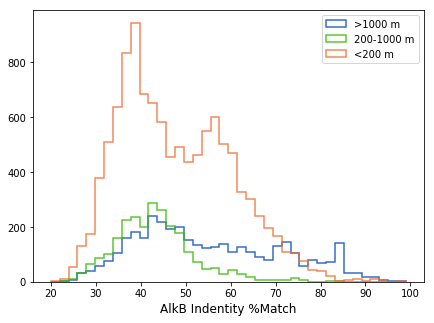

In [74]:
plt.figure(figsize=(7,5))
plt.hist([iden_shallow_alk,iden_mid_alk,iden_deep_alk],histtype='step', alpha=0.8,
         label=['<200 m','200-1000 m','>1000 m'],bins=40,linewidth=1.5, color=['#EF6A30','#32B900','#0049B9'])
plt.legend(loc='best')
plt.xlabel('AlkB Indentity %Match',fontsize=12)
plt.savefig('GOM_HC_figures/AlkB Indentity %Match_3depthgroups.png',dpi=300)

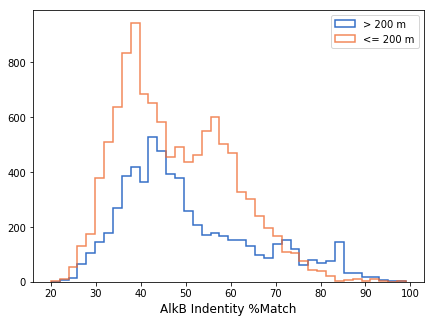

In [87]:
plt.figure(figsize=(7,5))
plt.hist([iden_shallow_alk,iden_mid_alk+iden_deep_alk],histtype='step', alpha=0.8,
         label=['<= 200 m','> 200 m'],bins=40,linewidth=1.5, color=['#EF6A30','#0049B9'])
plt.legend(loc='best')
plt.xlabel('AlkB Indentity %Match',fontsize=12)
plt.savefig('GOM_HC_figures/AlkB Indentity %Match_2depthgroups_200.png',dpi=300)

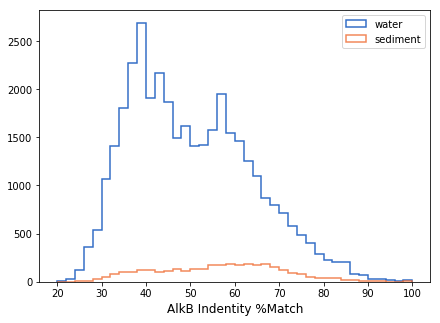

In [93]:
plt.figure(figsize=(7,5))
plt.hist([iden_sed_alk,iden_water_alk],histtype='step', alpha=0.8,
         label=['sediment','water'],bins=40,linewidth=1.5, color=['#EF6A30','#0049B9'])
plt.legend(loc='best')
plt.xlabel('AlkB Indentity %Match',fontsize=12)
plt.savefig('GOM_HC_figures/AlkB Indentity %Match_bysampletype.png',dpi=300)

##### Blast RHDs hist plots

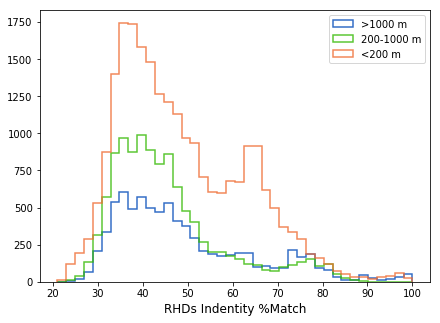

In [79]:
plt.figure(figsize=(7,5))
plt.hist([iden_shallow_rho,iden_mid_rho+iden_deep_rho],histtype='step', alpha=0.8,
         label=['<= 200 m','200-1000 m','>1000 m'],bins=40,linewidth=1.5, color=['#EF6A30','#32B900','#0049B9'])
plt.legend(loc='best')
plt.xlabel('RHDs Indentity %Match',fontsize=12)
plt.savefig('GOM_HC_figures/RHDs Indentity %Match_3depthgroups.png',dpi=300)

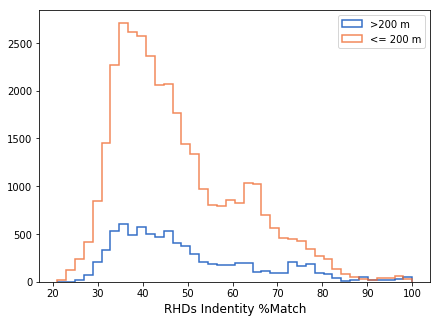

In [88]:
plt.figure(figsize=(7,5))
plt.hist([iden_shallow_rho+iden_mid_rho,iden_deep_rho],histtype='step', alpha=0.8,
         label=['<= 200 m','>200 m'],bins=40,linewidth=1.5, color=['#EF6A30','#0049B9'])
plt.legend(loc='best')
plt.xlabel('RHDs Indentity %Match',fontsize=12)
plt.savefig('GOM_HC_figures/RHDs Indentity %Match_2depthgroups_200.png',dpi=300)

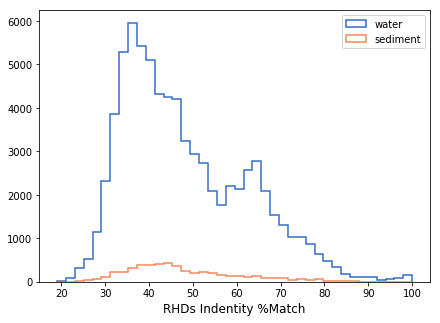

In [94]:
plt.figure(figsize=(7,5))
plt.hist([iden_sed_rho,iden_water_rho],histtype='step', alpha=0.8,
         label=['sediment','water'],bins=40,linewidth=1.5, color=['#EF6A30','#0049B9'])
plt.legend(loc='best')
plt.xlabel('RHDs Indentity %Match',fontsize=12)
plt.savefig('GOM_HC_figures/RHDs Indentity %Match_bysampletype.png',dpi=300)

In [197]:
with open('blast_deep_seqId_rho_1000m.csv','w') as f:
    newfile = csv.writer(f)
    for line in list(blast_deep['seq_id']):
        newfile.writerow([line])

with open('blast_shallow_seqId_rho_1000m.csv','w') as f:
    newfile = csv.writer(f)
    for line in list(blast_shallow['seq_id']):
        newfile.writerow([line])

### II-3. Get the deep vs shallow labels and clades files for taxonomic trees <a class="anchor" id="II3"></a>

In [203]:
# Import original and new ids files
with open('RHO_compare_deep_shallow_oldids.csv','r') as f:
    old_seqids = [line.rstrip() for line in f]
with open('RHO_compare_deep_shallow_newids.csv','r') as f:
    new_seqids = [line.rstrip() for line in f]

ref_seq = pd.read_csv('RHO_sequence_data.csv',index_col=0)


In [103]:
with open('blast_shallow_seqId.csv','r') as f:
    blast_shallow = [line.rstrip() for line in f]

In [204]:
color_dicts = {'Alphaproteobacteria':'#ff6e28',
                  'Gammaproteobacteria':'#db51f7',
                  'Betaproteobacteria':'#ffa51e',
                  'Bacteroidetes/Chlorobi group': '#e5a2a2',
                  'Actinobacteria':'#ad0008',
                  'Chloroflexi':'#5dfcf9',
                  'Firmicutes':'#ce66ff',
                  'delta/epsilon subdivisions': '#895683',
                  'Crenarchaeota':'#ecfc3f',
                  'Cyanobacteria/Melainabacteria group':'#cece0c',
                  'Spirochaetia':'#050b91',
                  'deep':'#338BFF',
                  'shallow':'#3de245',
                  'mid': '#551a8b',
                  'Others': "#634619" }

def get_color_for_refs(color_dicts,subgroup,no_taxa):
    
    colors=[]
    major_subgroups = list(ref_seq['SubGroup'].value_counts().head(no_taxa).reset_index()['index'])
    if subgroup in major_subgroups:
        return color_dicts[subgroup]
    else:
        return color_dicts['Others']

In [102]:
labels = []
colors = []
clade_weight = []
for seq in old_seqids:
    if seq in list(ref_seq['AlkB_seq_id']):
        ref_index = list(ref_seq['AlkB_seq_id']).index(seq)
        labels.append(ref_seq['SubGroup'].iloc[ref_index])
        colors.append(get_color_for_refs(color_dicts,ref_seq['SubGroup'].iloc[ref_index],5))
        clade_weight.append(2)
    else:
        labels.append('deep')
        colors.append(color_dicts['deep'])
        clade_weight.append(1)
    
print(len(labels))
print(len(new_seqids))

with_ref_df = pd.DataFrame({'seq_id':new_seqids,'label':labels,'color':colors,'clade_weight':clade_weight})
with_ref_df['clade_type'] = ['normal']*with_ref_df.shape[0]
with_ref_df['clade'] = ['clade']*with_ref_df.shape[0]

with_ref_df[['seq_id','label']].to_csv('AlkB_deep_refs_label.txt',sep=' ',index=False)
with_ref_df[['seq_id','clade','color','clade_type','clade_weight']].to_csv('AlkB_deep_refs_colors.txt',sep=' ',index=False)

1830
1830


In [209]:
#This cell is for compare shallow and deep seqs
compare_labels = [] 
compare_colors = []
for seq in old_seqids:
    if '_'.join(seq.split('_')[0:-1]) in list(blast_shallow['seq_id']):
        compare_labels.append('shallow')
        compare_colors.append(color_dicts['shallow'])
    elif '_'.join(seq.split('_')[0:-1]) in list(blast_deep['seq_id']):
        compare_labels.append('deep')
        compare_colors.append(color_dicts['deep'])
    else:
        compare_labels.append('mid')
        compare_colors.append(color_dicts['mid'])
deep_shallow_df = pd.DataFrame({'seq_id':new_seqids,'label':compare_labels,'color':compare_colors})
deep_shallow_df['clade_type'] = ['normal']*deep_shallow_df.shape[0]
deep_shallow_df['clade'] = ['clade']*deep_shallow_df.shape[0]
deep_shallow_df['clade_weight'] = [1]*deep_shallow_df.shape[0]
deep_shallow_df[['seq_id','label']].to_csv('RHO_deep_shallow_mid_label.txt',sep=' ',index=False)
deep_shallow_df[['seq_id','clade','color','clade_type','clade_weight']].to_csv('RHO_deep_shallow_mid_colors.txt',sep=' ',index=False)

In [134]:
#This cell is for reference seqs
ref_labels = []
ref_colors = []
match_seqs = []
for seq in old_seqids:
    if seq in list(ref_seq['RHO_seq_id']):
        ref_index = list(ref_seq['RHO_seq_id']).index(seq)
        ref_labels.append(ref_seq['SubGroup'].iloc[ref_index])
        ref_colors.append(get_color_for_refs(color_dicts,ref_seq['SubGroup'].iloc[ref_index],6))
        match_seqs.append(seq)

refs_df = pd.DataFrame({'seq_id':match_seqs,'label':ref_labels,'color':ref_colors})
refs_df['clade_type'] = ['normal']*refs_df.shape[0]
refs_df['clade'] = ['clade']*refs_df.shape[0]
refs_df['clade_weight'] = [1]*refs_df.shape[0]
old_new = pd.DataFrame({'old_id':old_seqids,'new_id':new_seqids})
refs_df = pd.merge(refs_df,old_new,left_on=['seq_id'],right_on=['old_id'])
refs_df[['new_id','label']].to_csv('RHO_refs_label.txt',sep=' ',index=False)
refs_df[['new_id','clade','color','clade_type','clade_weight']].to_csv('RHO_refs_colors.txt',sep=' ',index=False)
#refs_df[['seq_id','label']].to_csv('RHO_refs_label.txt',sep=' ',index=False)
#refs_df[['seq_id','clade','color','clade_type','clade_weight']].to_csv('RHO_refs_colors.txt',sep=' ',index=False)



<br>
## III. Processing reference Genomes meta and HC gene affiliation <a class="anchor" id="III"></a>

In [ ]:
# Codes used to process meta data
#prok = pd.read_csv('genomes_proks.csv')
#prok['Genus'] = prok['#Organism/Name'].apply(lambda x:x.split(' ')[0])
#prok['Species'] = prok['#Organism/Name'].apply(lambda x:' '.join(x.split(' ')[0:2]))
#prok['RefSeq FTP'] = prok['Assembly'].apply(lambda x:x.split(' ')[0])
#files = pd.read_csv('filename.csv')
#files.columns = ['Assembly']
#files.loc[8907] = 'GCA_000007185.1_ASM718v1_protein.faa'
#files['names'] = files['Assembly'].apply(lambda x:x.split('_')[1])
#proks = pd.merge(files,prok,how='left',on=['names'])

#prok['SubGroup'].iloc[:8921] = prok['Organism Groups'].iloc[:8921].apply(lambda x:x.split(';')[2])
#prok['Group'].iloc[:8921] = prok['Organism Groups'].iloc[:8921].apply(lambda x:x.split(';')[1])

In [284]:
# Import NCBI metadata
prok = pd.read_csv('NCBI_genomes_metadata.csv')
prok.dropna(subset=['RefSeq FTP'],inplace=True)
prok['names'] = prok['RefSeq FTP'].apply(lambda x:x.split('/')[-1].split('_')[1])
#prok.info()
prok.drop('Unnamed: 19',1,inplace=True)

In [285]:
rhos = pd.read_csv('GCF_RHO_extractedgenes.csv')
rhos['names'] = rhos['Assembly'].apply(lambda x:x.split('_')[1])
alkb = pd.read_csv('GCF_AlkB_extractedgenes.csv')
alkb['names'] = alkb['Assembly'].apply(lambda x:x.split('_')[1])
alkb.rename(columns={'Seq_ids':'AlkB_seq_id'},inplace=True)
rhos.rename(columns={'Seq_ids':'RHO_seq_id'},inplace=True)

rho_genes = pd.merge(rhos,prok,on=['names'])
rho_genes.drop(['Unnamed: 0','Assembly_y'],1,inplace=True)
rho_genes.rename(columns={'Assembly_x':'Assembly'},inplace=True)

alkb_rhos = pd.merge(rho_genes,alkb,on=['names'])
alkb_rhos.drop(['Unnamed: 0','Assembly_y'],1,inplace=True)
alkb_rhos.rename(columns={'Assembly_x':'Assembly'},inplace=True)

In [286]:
print(alkb_rhos.shape)
alkb_rhos.head()

(8907, 26)


,Assembly,RHO_counts,RHO_seq_id,names,RefSeq FTP,#Organism Name,Organism Groups,Strain,BioSample,BioProject,...,CDS,Release Date,GenBank FTP,Domain,Genus,Species,Group,SubGroup,AlkB_counts,AlkB_seq_id
0,GCA_000007185.1_ASM718v1_protein.faa,0,[],000007185.1,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,Methanopyrus kandleri AV19,Archaea;Euryarchaeota;Methanopyri,AV19,SAMN02603235,PRJNA294,...,1687,2002-04-03T00:00:00Z,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...,Archaea,Methanopyrus,Methanopyrus kandleri,Euryarchaeota,Methanopyri,0,[]
1,GCA_000007225.1_ASM722v1_protein.faa,0,[],000007225.1,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,Pyrobaculum aerophilum str. IM2,Archaea;TACK group;Crenarchaeota,IM2,SAMN02604075,PRJNA172,...,2605,2002-01-24T00:00:00Z,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...,Archaea,Pyrobaculum,Pyrobaculum aerophilum,TACK group,Crenarchaeota,0,[]
2,GCA_000007385.1_ASM738v1_protein.faa,1,['AAW75850.1'],000007385.1,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,Xanthomonas oryzae pv. oryzae KACC 10331,Bacteria;Proteobacteria;Gammaproteobacteria,KACC10331,SAMN02603680,PRJNA12931,...,4538,2005-02-02T00:00:00Z,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...,Bacteria,Xanthomonas,Xanthomonas oryzae,Proteobacteria,Gammaproteobacteria,0,[]
3,GCA_000008085.1_ASM808v1_protein.faa,0,[],000008085.1,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,Nanoarchaeum equitans Kin4-M,Archaea;DPANN group;Nanoarchaeota,NaN,SAMN02603208,PRJNA9599,...,536,2003-12-18T00:00:00Z,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...,Archaea,Nanoarchaeum,Nanoarchaeum equitans,DPANN group,Nanoarchaeota,0,[]
4,GCA_000008605.1_ASM860v1_protein.faa,0,[],000008605.1,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,Treponema pallidum subsp. pallidum str. Nichols,Bacteria;Spirochaetes;Spirochaetia,Nichols,SAMN02604348,PRJNA5,...,1031,1998-03-06T00:00:00Z,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...,Bacteria,Treponema,Treponema pallidum,Spirochaetes,Spirochaetia,0,[]


In [16]:
print(alkb_rhos[alkb_rhos['AlkB_counts']>0]["Domain"].value_counts())
print(alkb_rhos[(alkb_rhos['RHO_counts']>0)&(alkb_rhos['Domain']=='Archaea')]["Genus"].value_counts())

Bacteria    1079
Name: Domain, dtype: int64
Sulfolobus       16
Haloferax         3
Natrialbaceae     1
Natronococcus     1
Vulcanisaeta      1
Acidianus         1
Haloterrigena     1
Haloarcula        1
Halopiger         1
Pyrobaculum       1
Name: Genus, dtype: int64


In [7]:
alkb_rhos[(alkb_rhos['RHO_counts']>0)&((alkb_rhos['AlkB_counts']>1))]['Genus'].shape

(210,)

In [565]:
alkb_rhos[(alkb_rhos['RHO_counts']>1)&(alkb_rhos['AlkB_counts']>1)]['Genus'].shape

(196,)

### III-1. Taxonomic distribution plots <a class="anchor" id="III1"></a>

In [297]:
def get_taxon_df(df,taxon_level1,taxon_level2,genename,no_grouptodisplay=6):
    # get the major Subroups that have high gene counts
    major_groups = alkb_rhos.groupby(taxon_level1)['%s_counts'%genename].sum().sort_values(ascending=False).head(no_grouptodisplay).index.sort_values()
    # Get number of genomes that contain the gene at genus level
    no_of_genomes_contained = alkb_rhos[(alkb_rhos[taxon_level1].isin(major_groups))&(alkb_rhos['%s_counts'%genename]>0)].groupby([taxon_level1,taxon_level2]).size().reset_index()
    # Get number of genomes that were sequenced at genus level
    no_of_genomes_sequenced = alkb_rhos[alkb_rhos[taxon_level1].isin(major_groups)].groupby([taxon_level1,taxon_level2]).size().reset_index()
    # Merge the two data sets
    genomes_contains_sequenced = pd.merge(no_of_genomes_contained,no_of_genomes_sequenced,on=[taxon_level1,taxon_level2])
    genomes_contains_sequenced.rename(columns={'0_x':'no_of_genomes_contains_%s'%genename,'0_y':'no_of_genomes_sequenced'},inplace=True)
    return genomes_contains_sequenced

# plot the distribution of the gene 
def plot_taxon_bars(taxon_df,taxon_level1,taxon_level2,genename,no_todisplay = 5):

    taxon_df.sort_values(by=[taxon_level1,'no_of_genomes_contains_%s'%genename]).groupby(taxon_level1).tail(no_todisplay).set_index(taxon_level2).plot(kind='barh',figsize=(10,10))
    #plt.xscale('log')
    plt.ylabel(taxon_level2,fontsize=14)
    plt.xlabel('Count')
    

In [292]:
alkb_rhos.rename(columns={'RHO_counts':'RHD_counts'},inplace=True)

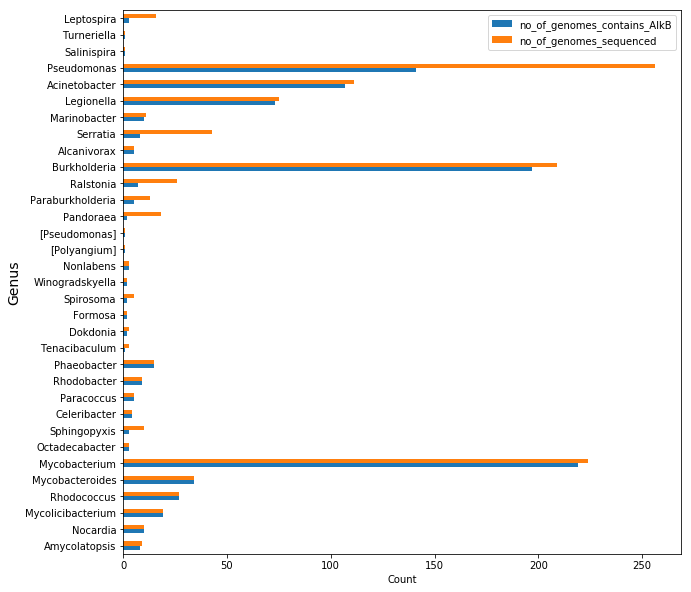

In [301]:
genomes_contains_sequenced = get_taxon_df(alkb_rhos,'SubGroup','Genus','AlkB',no_grouptodisplay=6)
plot_taxon_bars(genomes_contains_sequenced ,'SubGroup','Genus','AlkB',6)
plt.savefig('GOM_HC_figures/Distribution of AlkB.png',bbox_inches='tight',dpi=300)

In [296]:
genomes_contains_sequenced['SubGroup'].value_counts()

Alphaproteobacteria                    103
Gammaproteobacteria                     82
Betaproteobacteria                      70
Actinobacteria                          60
Cyanobacteria/Melainabacteria group     34
Firmicutes                              18
Name: SubGroup, dtype: int64

In [269]:
genomes_contains_sequenced.sort_values(by=['SubGroup','no_of_genomes_contains_AlkB']).groupby('SubGroup').tail(7)

,SubGroup,Genus,no_of_genomes_contains_AlkB,no_of_genomes_sequenced
25,Actinobacteria,Streptomyces,6,83
3,Actinobacteria,Amycolatopsis,8,9
19,Actinobacteria,Nocardia,10,10
18,Actinobacteria,Mycolicibacterium,19,19
23,Actinobacteria,Rhodococcus,27,27
16,Actinobacteria,Mycobacteroides,34,34
15,Actinobacteria,Mycobacterium,219,224
46,Alphaproteobacteria,Novosphingobium,3,4
47,Alphaproteobacteria,Octadecabacter,3,3
60,Alphaproteobacteria,Sphingopyxis,3,10


### III-2. Get the labels and clade color file for sequence phylogenic trees <a class="anchor" id="III2"></a>

#### For AlkB reference sequences <a class="anchor" id="ALK"></a>

In [38]:
alkb =alkb_rhos[alkb_rhos['AlkB_seq_id'] != '[]'][['Group','SubGroup','AlkB_seq_id','Genus','Domain']]
df = []
for i in range(alkb.shape[0]):
    for seq_id in alkb['AlkB_seq_id'].iloc[i].strip('[]').split(','):
        df.append([seq_id.strip(" '"),alkb['Group'].iloc[i],alkb['SubGroup'].iloc[i],alkb['Genus'].iloc[i],alkb['Domain'].iloc[i]])

alkb_df = pd.DataFrame(df,columns=['AlkB_seq_id','Group','SubGroup','Genus','Domain'])
alkb_df.drop_duplicates(inplace=True)
alkb_df.head()
#alkb_df.to_csv('AlkB_sequence_data.csv')

,AlkB_seq_id,Group,SubGroup,Genus,Domain
0,ABO12068.2,Proteobacteria,Gammaproteobacteria,Acinetobacter,Bacteria
1,ABO53908.1,Proteobacteria,Betaproteobacteria,Burkholderia,Bacteria
2,ADX92311.1,Proteobacteria,Gammaproteobacteria,Acinetobacter,Bacteria
3,AFK03166.1,FCB group,Bacteroidetes/Chlorobi group,Emticicia,Bacteria
4,AEJ48190.1,Terrabacteria group,Actinobacteria,Mycobacterium,Bacteria


In [39]:
uniques = ['Gammaproteobacteria','Betaproteobacteria','Actinobacteria','Alphaproteobacteria',
          'Cyanobacteria/Melainabacteria group','Firmicutes','delta/epsilon subdivisions',
          'Bacteroidetes/Chlorobi group','Spirochaetia','Oligoflexia']
colors = ['#c04104','#1440e0','#ffa51e','#e814a3','#1f9b25','#ff0000','#605f56','#5dfcf9','#9d22d6','#c7c1ff']

def get_colors(uniques,colors,subgroup):
    index = uniques.index(subgroup)
    return colors[index]

alkb_df['color'] = alkb_df['SubGroup'].apply(lambda x:get_colors(uniques,colors,x))
alkb_df['clade'] = ['clade'] * alkb_df.shape[0]
alkb_df['clade_type'] = ['normal'] * alkb_df.shape[0]
alkb_df['clade_weigh']= [1] * alkb_df.shape[0]

In [52]:
alkb_df[alkb_df['AlkB_seq_id']=='WP_081649954.1']

,AlkB_seq_id,Group,SubGroup,Genus,Domain,color,clade,clade_type,clade_weigh,AlkB_newids
235,WP_081649954.1,Terrabacteria group,Actinobacteria,Mycolicibacterium,Bacteria,#ffa51e,clade,normal,1,seq238
236,WP_081649954.1,Terrabacteria group,Actinobacteria,Mycobacterium,Bacteria,#ffa51e,clade,normal,1,seq238


In [45]:
with open('GCF_AlkB_filtered_final_newids.csv','r') as f:
    newids = [line.rstrip() for line in f]
with open('GCF_AlkB_filtered_final_oldids.csv','r') as f:
    oldids = [line.rstrip() for line in f]
old_new_ids = pd.DataFrame({'AlkB_seq_id':oldids,'AlkB_newids':newids})
alkb_df = pd.merge(alkb_df,old_new_ids,on=['AlkB_seq_id'])
alkb_df.drop_duplicates(subset=['AlkB_newids'],inplace=True)
alkb_df.shape

(691, 10)

In [55]:
alkb_df[['AlkB_newids','clade','color','clade_type','clade_weigh']].to_csv('alkb_clade.txt',sep=' ',index=False)
alkb_df[['AlkB_newids','SubGroup']].to_csv('alkb_label.txt',sep=' ',index=False)

#### For RHO reference sequences <a class="anchor" id="RHO"></a>

In [11]:
alkb_rhos[alkb_rhos['RHO_counts']>0]['SubGroup'].value_counts()

Gammaproteobacteria                    1468
Betaproteobacteria                      795
Actinobacteria                          528
Alphaproteobacteria                     463
Cyanobacteria/Melainabacteria group     106
Firmicutes                               93
Crenarchaeota                            19
delta/epsilon subdivisions               18
Bacteroidetes/Chlorobi group             18
Spirochaetia                             18
Thermotogae                              16
Chloroflexi                               9
Oligoflexia                               8
Halobacteria                              8
Deinococcus-Thermus                       6
Acidobacteriia                            6
Planctomycetes                            6
Verrucomicrobia                           4
Gemmatimonadetes                          2
Nitrospira                                2
Caldisericia                              1
Armatimonadetes                           1
Solibacteres                    

In [20]:
rho =alkb_rhos[alkb_rhos['RHO_seq_id'] != '[]'][['Group','SubGroup','RHO_seq_id','Genus','Domain']]
df = []
for i in range(rho.shape[0]):
    for seq_id in rho['RHO_seq_id'].iloc[i].strip('[]').split(','):
        df.append([seq_id.strip(" '"),rho['Group'].iloc[i],rho['SubGroup'].iloc[i],rho['Genus'].iloc[i],rho['Domain'].iloc[i]])

rho_df = pd.DataFrame(df,columns=['RHO_seq_id','Group','SubGroup','Genus','Domain'])
rho_df.drop_duplicates(inplace=True)
rho_df.head()
#rho_df.to_csv('RHO_sequence_data.csv')

,RHO_seq_id,Group,SubGroup,Genus,Domain
0,AAW75850.1,Proteobacteria,Gammaproteobacteria,Xanthomonas,Bacteria
1,ABO11285.2,Proteobacteria,Gammaproteobacteria,Acinetobacter,Bacteria
2,ABO11379.2,Proteobacteria,Gammaproteobacteria,Acinetobacter,Bacteria
3,ABO11546.2,Proteobacteria,Gammaproteobacteria,Acinetobacter,Bacteria
4,ABO11645.1,Proteobacteria,Gammaproteobacteria,Acinetobacter,Bacteria


In [22]:
colors = ['#c04104','#1440e0','#ffa51e','#e814a3','#1f9b25','#ff0000','#e5e519','#605f56','#5dfcf9','#9d22d6','#c7c1ff']
uniques = list(rho_df['SubGroup'].value_counts().reset_index()['index'][0:10])
def get_colors(uniques,colors,subgroup):
    if subgroup in uniques:
        index = uniques.index(subgroup)
        return colors[index]
    else:
        return colors[-1]

rho_df['color'] = rho_df['SubGroup'].apply(lambda x:get_colors(uniques,colors,x))
rho_df['clade'] = ['clade'] * rho_df.shape[0]
rho_df['clade_type'] = ['normal'] * rho_df.shape[0]
rho_df['clade_weigh']= [1] * rho_df.shape[0]

In [323]:
with open('GCF_RHO_filtered_final_newids.csv','r') as f:
    newids = [line.rstrip() for line in f]
with open('GCF_RHO_filtered_final_oldids.csv','r') as f:
    oldids = [line.rstrip() for line in f]
old_new_ids = pd.DataFrame({'RHO_seq_id':oldids,'RHO_newids':newids})
rho_df = pd.merge(rho_df,old_new_ids,on=['RHO_seq_id'])
rho_df.shape

(7223, 6)

In [28]:
rho_df[['RHO_newids','clade','color','clade_type','clade_weigh']].to_csv('rhos_clade.txt',sep=' ',index=False)
rho_df[['RHO_newids','SubGroup']].to_csv('rhos_label.txt',sep=' ',index=False)

In [304]:
rho_desc = pd.read_csv('GCF_RHO_first_clean_seqdescription.csv')
rho_desc.head()

,RHO_seq_id,description
0,AAW75850.1,Phenylpropionate dioxygenase
1,ABO11285.2,dioxygenase alpha
2,ABO11379.2,putative vanillate
3,ABO11546.2,vanillate O-demethylase
4,ABO11645.1,benzoate 12


In [326]:
rho_desc_df = pd.merge(rho_df,rho_desc,on=['RHO_seq_id'])
rho_desc_df.head()

,RHO_seq_id,Group,SubGroup,Genus,Domain,RHO_newids,description
0,AAW75850.1,Proteobacteria,Gammaproteobacteria,Xanthomonas,Bacteria,seq0,Phenylpropionate dioxygenase
1,ABO11285.2,Proteobacteria,Gammaproteobacteria,Acinetobacter,Bacteria,seq1,dioxygenase alpha
2,ABO11379.2,Proteobacteria,Gammaproteobacteria,Acinetobacter,Bacteria,seq2,putative vanillate
3,ABO11546.2,Proteobacteria,Gammaproteobacteria,Acinetobacter,Bacteria,seq3,vanillate O-demethylase
4,ABO11645.1,Proteobacteria,Gammaproteobacteria,Acinetobacter,Bacteria,seq4,benzoate 12


In [309]:
def normalize_desc(description):
    description = description.lower()
    if 'ring' in description or 'aromatic' in description or 'PAH' in description or 'dioxygenase [mycobacterium' in description or 'dioxygenase [bordetella' in description:
        return 'aromatic RHD'
    elif 'oxidoreductase' in description or 'oxidase' in description:
        return 'oxidoreductase'
    elif 'ketosteroid' in description:
        return '3-ketosteroid-9-alpha-hydroxylase'
    elif 'rieske' in description or '2fe-2s' in description or 'fe-s' in description or 'ferredoxin' in description or 'iron' in description:
        return 'Rieske 2Fe-2S ferredoxin'
    elif 'hypothetical' in description:
        return 'hypothetical protein'
    elif 'anthranilate' in description:
        return 'anthranilate 1,2-dioxygenase'
    elif 'benzoate' in description:
        return 'benzoate 1,2-dioxygenase'
    elif 'benzene' in description:
        return 'benzene 1,2-dioxygenase'
    elif 'phthalate'in description:
        return 'phthalate 4,5-dioxygenase'
    elif 'biphenyl'in description:
        return 'biphenyl 2,3-dioxygenase'
    elif 'phenylpropionate' in description:
        return '3-phenylpropionate dioxygenase'
    elif 'ribosomal' in description:
        return 'ribosomal subunit'
    else:
        return description

In [327]:
rho_desc_df['description'] = rho_desc_df['description'].apply(normalize_desc)

In [312]:
import random
desc_colors= []
for i in range(0,24):
    r = lambda: random.randint(0,255)
    desc_colors.append('#%02x%02x%02x' % (r(),r(),r()))


In [317]:
color_dicts = {'benzoate 1,2-dioxygenase':'#ff6e28',
                  '3-ketosteroid-9-alpha-hydroxylase':'#e77efc',
                  '3-phenylpropionate dioxygenase':'#f7b34c',
                  'anthranilate 1,2-dioxygenase': '#ff0000',
                  'benzene 1,2-dioxygenase':'#910209',
                  'vanillate monooxygenase':'#5dfcf9',
                  'salicylate hydroxylase':'#d06dff',
                  'vanillate o-demethylase': '#82427a',
                  'biphenyl 2,3-dioxygenase':'#f2ff68',
                  'phthalate 4,5-dioxygenase':'#cece0c',
                  'salicylate 5-hydroxylase':'#050b91',
                   'pheophorbide a':'#4d6ca5',
                   'choline monooxygenase':'#a5ff93',
               'p-cumate dioxygenase':'#ea5b7b',
               'naphthalene 1,2-dioxygenase':'#affffb',
                  'deep':'#338BFF',
                  'shallow':'#3de245',
                  'mid': '#551a8b',
                  'Others': "#634619" }

def get_color_for_desc(color_dicts,subgroup):
    
    major_subgroups = ['benzoate 1,2-dioxygenase','3-ketosteroid-9-alpha-hydroxylase',
                  '3-phenylpropionate dioxygenase','anthranilate 1,2-dioxygenase',
                  'benzene 1,2-dioxygenase','vanillate monooxygenase',
                  'salicylate hydroxylase','vanillate o-demethylase',
                  'biphenyl 2,3-dioxygenase','phthalate 4,5-dioxygenase',
                  'salicylate 5-hydroxylase', 'pheophorbide a',  'choline monooxygenase',
               'p-cumate dioxygenase','naphthalene 1,2-dioxygenase']
    if subgroup in major_subgroups:
        return color_dicts[subgroup]
    else:
        return color_dicts['Others']

In [328]:
rho_desc_df['desc_color'] = rho_desc_df['description'].apply(lambda x:get_color_for_desc(color_dicts,x))

In [333]:
rho_desc_df['clade'] = ['clade'] * rho_desc_df.shape[0]
rho_desc_df['clade_type'] = ['normal'] * rho_desc_df.shape[0]
rho_desc_df['clade_weigh']= [2] * rho_desc_df.shape[0]

In [331]:
rho_desc_df.head()

,RHO_seq_id,Group,SubGroup,Genus,Domain,RHO_newids,description,desc_color,clade,clade_type,clade_weigh
0,AAW75850.1,Proteobacteria,Gammaproteobacteria,Xanthomonas,Bacteria,seq0,3-phenylpropionate dioxygenase,#f7b34c,clade,normal,1
1,ABO11285.2,Proteobacteria,Gammaproteobacteria,Acinetobacter,Bacteria,seq1,dioxygenase alpha,#634619,clade,normal,1
2,ABO11379.2,Proteobacteria,Gammaproteobacteria,Acinetobacter,Bacteria,seq2,putative vanillate,#634619,clade,normal,1
3,ABO11546.2,Proteobacteria,Gammaproteobacteria,Acinetobacter,Bacteria,seq3,vanillate o-demethylase,#82427a,clade,normal,1
4,ABO11645.1,Proteobacteria,Gammaproteobacteria,Acinetobacter,Bacteria,seq4,"benzoate 1,2-dioxygenase",#ff6e28,clade,normal,1


In [334]:
rho_desc_df[['RHO_newids','clade','desc_color','clade_type','clade_weigh']].to_csv('rhos_desc_clade.txt',sep=' ',index=False)
rho_desc_df[['RHO_newids','description']].to_csv('rhos_desc_label.txt',sep=' ',index=False)

In [98]:
uniques = list(rho_desc_df['description'].value_counts().reset_index()['index'][0:23])
def get_colors(uniques,colors,desc):
    if desc in uniques:
        index = uniques.index(desc)
        return colors[index]
    else:
        return colors[-1]

rho_desc_df['desc_color'] = rho_desc_df['description'].apply(lambda x:get_colors(uniques,desc_colors,x))

<br>
## IV. Scraping EMBI-EBI <a class="anchor" id="IV"></a>
Get GOS metagenomes from https://www.ebi.ac.uk/metagenomics/studies/MGYS00000641 <br>
During 2009-2011, microbial communities from aquatic communities in close contact with humans were collected and characterized using shotgun metagenomic sequencing. Sampled environments include coastal sites in the Pacific and Atlantic Ocean, extensive surveys of the Mediterranean and Baltic Seas, along with the Black Sea, Lake Constance, Lake Banyoles, Lake Ciso, and Lake Redon.


In [80]:
import urllib.request
import requests
import bs4
from bs4 import BeautifulSoup
import re

In [106]:
EBI = pd.read_csv('EBI_meta.csv')
EBI['run'] = EBI['run'].apply(lambda x:x.split('/')[-1].split('?')[0])
EBI.head()

,url,taxonomy,analysis_summary,sample,pipeline_version,accession,taxonomy_lsu,go_slim,run,study,taxonomy_ssu,go_terms,downloads,experiment_type,interpro_identifiers,complete_time,instrument_platform,instrument_model
0,https://www.ebi.ac.uk/metagenomics/api/v1/anal...,NaN,"[{'value': '1120', 'key': 'Submitted nucleotid...",https://www.ebi.ac.uk/metagenomics/api/v1/samp...,4.1,MGYA00175297,NaN,NaN,ERR986647,https://www.ebi.ac.uk/metagenomics/api/v1/stud...,NaN,NaN,NaN,metabarcoding,NaN,2018-06-27T00:00:00,LS454,454 GS FLX Titanium
1,https://www.ebi.ac.uk/metagenomics/api/v1/anal...,NaN,"[{'value': '1915', 'key': 'Submitted nucleotid...",https://www.ebi.ac.uk/metagenomics/api/v1/samp...,4.1,MGYA00175298,NaN,NaN,ERR986648,https://www.ebi.ac.uk/metagenomics/api/v1/stud...,NaN,NaN,NaN,metabarcoding,NaN,2018-06-27T00:00:00,LS454,454 GS FLX Titanium
2,https://www.ebi.ac.uk/metagenomics/api/v1/anal...,NaN,"[{'value': '683', 'key': 'Submitted nucleotide...",https://www.ebi.ac.uk/metagenomics/api/v1/samp...,4.1,MGYA00175299,NaN,NaN,ERR986649,https://www.ebi.ac.uk/metagenomics/api/v1/stud...,NaN,NaN,NaN,metabarcoding,NaN,2018-06-27T00:00:00,LS454,454 GS FLX Titanium
3,https://www.ebi.ac.uk/metagenomics/api/v1/anal...,NaN,"[{'value': '10910', 'key': 'Submitted nucleoti...",https://www.ebi.ac.uk/metagenomics/api/v1/samp...,4.1,MGYA00175300,NaN,NaN,ERR986610,https://www.ebi.ac.uk/metagenomics/api/v1/stud...,NaN,NaN,NaN,metabarcoding,NaN,2018-06-28T00:00:00,LS454,454 GS FLX Titanium
4,https://www.ebi.ac.uk/metagenomics/api/v1/anal...,NaN,"[{'value': '1333', 'key': 'Submitted nucleotid...",https://www.ebi.ac.uk/metagenomics/api/v1/samp...,4.1,MGYA00175301,NaN,NaN,ERR986635,https://www.ebi.ac.uk/metagenomics/api/v1/stud...,NaN,NaN,NaN,metabarcoding,NaN,2018-06-28T00:00:00,LS454,454 GS FLX Titanium


In [102]:
EBI = pd.read_csv('EMBI_EBI_GOS.csv')
#EBI['run'] = EBI['run'].apply(lambda x:x.split('/')[-1].split('?')[0])
EBI.head()

,Unnamed: 0,sample,description,run,accession,url,analysis_summary,pipeline_version,study,experiment_type,complete_time,instrument_platform,year,lat,lon,location,sample_name
0,0,ERS819336,Water sample taken on 2010-09-28 07:30 AM +000...,ERR986647,MGYA00175297,https://www.ebi.ac.uk/metagenomics/api/v1/anal...,"[{'value': '1120', 'key': 'Submitted nucleotid...",4.1,https://www.ebi.ac.uk/metagenomics/api/v1/stud...,metabarcoding,2018-06-27T00:00:00,LS454,2010,42.488335,3.145001,France,GS786
1,1,ERS819337,Water sample taken on 2010-09-28 07:30 AM +000...,ERR986648,MGYA00175298,https://www.ebi.ac.uk/metagenomics/api/v1/anal...,"[{'value': '1915', 'key': 'Submitted nucleotid...",4.1,https://www.ebi.ac.uk/metagenomics/api/v1/stud...,metabarcoding,2018-06-27T00:00:00,LS454,2010,42.488335,3.145001,France,GS786
2,2,ERS819338,Water sample taken on 2010-09-28 07:30 AM +000...,ERR986649,MGYA00175299,https://www.ebi.ac.uk/metagenomics/api/v1/anal...,"[{'value': '683', 'key': 'Submitted nucleotide...",4.1,https://www.ebi.ac.uk/metagenomics/api/v1/stud...,metabarcoding,2018-06-27T00:00:00,LS454,2010,42.488335,3.145001,France,GS786
3,3,ERS819299,Water sample taken on 2009-06-06 07:35 AM +000...,ERR986610,MGYA00175300,https://www.ebi.ac.uk/metagenomics/api/v1/anal...,"[{'value': '10910', 'key': 'Submitted nucleoti...",4.1,https://www.ebi.ac.uk/metagenomics/api/v1/stud...,metabarcoding,2018-06-28T00:00:00,LS454,2009,54.268715,7.187117,Germany,GS652
4,4,ERS819324,Water sample taken on 2010-09-07 12:40 PM +000...,ERR986635,MGYA00175301,https://www.ebi.ac.uk/metagenomics/api/v1/anal...,"[{'value': '1333', 'key': 'Submitted nucleotid...",4.1,https://www.ebi.ac.uk/metagenomics/api/v1/stud...,metabarcoding,2018-06-28T00:00:00,LS454,2010,42.435883,28.135767,Bulgaria,GS762


In [117]:
list(EBI['accession']).index('MGYA00034802')

73

### IV-1.Download EBI GOS metagenomes faa and process EBI meta data <a class="anchor" id="IV1"></a>

In [114]:
# Download EBI metagenomes faa
for i in range(0,73):
    url = 'https://www.ebi.ac.uk/metagenomics/api/v1/analyses/'+EBI['accession'].iloc[i]+'/file/'+EBI['run'].iloc[i]+'_FASTA.fasta.gz'
    urllib.urlretrieve(url,'EBI_metagenomes/'+EBI['accession'].iloc[i]+'_DNA'+'.gz')


'https://www.ebi.ac.uk/metagenomics/api/v1/analyses/MGYA00034802/file/ERR986621_FASTA.fasta.gz'

In [ ]:
for i in range(26,EBI.shape[0]):
    url = 'https://www.ebi.ac.uk/metagenomics/api/v1/analyses/'+EBI['accession'].iloc[i]+'/file/'+EBI['run'].iloc[i]+'_FASTQ_CDS.faa.gz'
    urllib.request.urlretrieve(url,'EBI_metagenomes/'+EBI['accession'].iloc[i]+'.gz')

In [116]:
list(EBI['accession']).index('MGYA00010432')

49

In [4]:
# Merge meta data with sample description data
EBI_meta = pd.read_csv('AnalysisJob.csv')
EBI = pd.merge(EBI_meta,EBI,on=['accession'])
EBI.drop(['taxonomy','sample_y','run_y'],1,inplace=True)
EBI.columns = ['sample', 'description', 'run', 'accession', 'url',
       'analysis_summary', 'pipeline_version', 'study', 'experiment_type',
       'complete_time', 'instrument_platform']

In [69]:
description = EBI['description'].iloc[145]
description

'Water sample taken on 2009-03-26 05:18 PM +0000 from site GS605 (lat:20.094784, long:-105.63443), 3.0?m filter fraction. Samples were collected by filtering 200L of water pumped through a 20?m prefilter, then size-fractionating by serial filtration through 3?m, 0.8?m, and 0.1?m membrane filters, then finally, in some samples, through tangential flow filtration fitted with a 50kDa pore size filter to concentrate a viral fraction. This genetic information may be considered to be part of the genetic patrimony of Mexico, the country from which the sample was obtained. Users of this information agree to: 1) acknowledge Mexico as the country of origin in any country where the genetic information is presented and 2) contact the CBD focal point identified on the CBD website: http://www.cbd.int/countries/ if they intend to use the genetic information for commercial purposes.'

In [73]:
#results = re.findall(r"[-+]?\d*\.\d+|\d+", description)
EBI['year'] = EBI['description'].apply(lambda s:re.findall(r"[-+]?\d*\.\d+|\d+", s)[0])
EBI['lat'] = EBI['description'].apply(lambda s:re.findall(r"[-+]?\d*\.\d+|\d+", s)[7])
EBI['lon'] = EBI['description'].apply(lambda s:re.findall(r"[-+]?\d*\.\d+|\d+", s)[8])
EBI['sample_name'] =EBI['description'].apply(lambda s:'GS'+re.findall(r"[-+]?\d*\.\d+|\d+", s)[6])

In [92]:
def get_location(s):
    if 'patrimony of' in s:
        return s.split('patrimony of')[1].split(',')[0].strip(' ')
    else:
        return 'NA'
    
EBI['location'] = EBI['description'].apply(get_location)
#Export meta data
EBI.to_csv('EMBI_EBI_GOS.csv')

<br>
### IV-2. Get total base pairs in EBI data (run on command line, needed python 2.7) <a class="anchor" id="IV2"></a>

In [ ]:
from Bio import SeqIO
import csv

with open('/storage/home/u/utn100/work/IGM_Metagenomes/EBI_metagenomes/EBI_DNA/EBI_DNA_filenames.csv','r') as f:
    filenames = [line.rstrip() for line in f]
    
base_pairs = []

for filename in filenames:
    total = 0
    print(filename)
    fasta_sequences = SeqIO.parse(open('/storage/home/u/utn100/work/IGM_Metagenomes/EBI_metagenomes/EBI_DNA/'+filename),'fasta')
    s = [seq for seq in fasta_sequences]
    for i in s:
        total += len(i.seq)
    base_pairs.append(total)
    
df = pd.DataFrame({'accession':filenames,'Genome_size':base_pairs})
df.to_csv()


#### Merge EBI_genome size and EBI meta to produce new EBI_GOS_meta file

In [230]:
# Merge the metadata and genome size data
#EBI = pd.read_csv('EMBI_EBI_GOS.csv')
#EBI_gene = pd.read_csv('EBI_genomesize.csv')
#EBI = pd.merge(EBI,EBI_gene,on=['accession'])

#EBI['Sequencing Center'] = 145*['J. Craig Venter Institute (JCVI)']
#EBI['Study Name'] = 145 * ['Marine microbial communities from Global Ocean Sampling (GOS)']
#EBI.drop(['Unnamed: 0'],1,inplace=True)


In [ ]:
EBI.columns =  ['sample', 'Genome Name / Sample Name', 'run', 'accession', 'url',
       'analysis_summary', 'pipeline_version', 'study', 'experiment_type',
       'complete_time', 'instrument_platform', 'year', 'Latitude', 'Longitude',
       'location', 'Sample_name', 'Depth (m)', 'Geographic Location', 'Relative location',
        'Sequencing Center', 'Study Name','Genome Size   * assembled']

In [231]:
EBI.columns

Index(['sample', 'Genome Name / Sample Name', 'run', 'accession', 'url',
       'analysis_summary', 'pipeline_version', 'study', 'experiment_type',
       'complete_time', 'instrument_platform', 'year', 'Latitude', 'Longitude',
       'location', 'Sample_name', 'Depth (m)', 'Geographic Location',
       'Relative location', 'Genome Size   * assembled', 'Sequencing Center',
       'Study Name'],
      dtype='object')

In [162]:
EBI['Sample_name'].nunique()

33

In [241]:
# Fill in Depth, location missing values
EBI_dict = EBI[['Sample_name','Geographic Location','Depth (m)','Relative location']].dropna().drop_duplicates().set_index('Sample_name').to_dict()

locations = []
depths =[]
relative_locations = []
for name in EBI['Sample_name']:
    locations.append(EBI_dict['Geographic Location'][name])
    depths.append(EBI_dict['Depth (m)'][name])
    relative_locations.append(EBI_dict['Relative location'][name])
EBI['Geographic Location']=locations
EBI['Depth (m)'] = depths
EBI['Relative location'] = relative_locations
EBI['Relative location'] = EBI['Relative location'].apply(lambda x:x.lower())
EBI.to_csv('EMBI_EBI_GOS.csv')

#### Combine IMG and EBI metadata

In [3]:
EBI = pd.read_csv('EMBI_EBI_GOS.csv')
EBI=EBI[['Genome Name / Sample Name','accession','Latitude', 'Longitude','Depth (m)', 'Geographic Location',
       'Relative location', 'Genome Size   * assembled', 'Sequencing Center',
       'Study Name']]
IMG = pd.read_csv('IMG_metadata.csv')
IMG = IMG[['Study Name',
       'Genome Name / Sample Name', 'Sequencing Center', 'IMG Genome ID ',
       'IMG Submission ID','Depth','Geographic Location', 'Habitat',
       'Latitude', 'Longitude', 'Genome Size   * assembled']]
locations  = []
for i in range(0,IMG.shape[0]):
    if 'coast' in IMG['Genome Name / Sample Name'].iloc[i].lower():
        locations.append('coastal')
    elif 'saline' in IMG['Genome Name / Sample Name'].iloc[i].lower():
        locations.append('hypersaline')
    else:
        locations.append('open ocean')
# Append locations as new column to meta df
IMG['Relative location'] = locations

In [245]:
EBI.columns = ['Genome Name / Sample Name','IMG Genome ID ','Latitude', 'Longitude','Depth', 'Geographic Location',
       'Relative location', 'Genome Size   * assembled', 'Sequencing Center',
       'Study Name']

In [246]:
df = pd.concat([IMG,EBI],join='outer')
df.to_csv("IMG_EBI_metadata.csv")

## V. Analysis of gene distribution metagenomes <a class="anchor" id="V"></a>

### V-1. Box plot and histograms  of gene abundance<a class="anchor" id="V1"></a>

In [2]:
def get_sub_df(df,genename,depth1,depth2):
    """
    Get the sub dataframe 
    """
    sed = df[df['Sample type']=='sediment'][genename + " hits/Gbp"]
    water = df[df['Sample type']=='water'][genename + " hits/Gbp"]
    coastal = df[(df['Sample type']=='water')&(df['Relative location'].str.contains('coastal'))][genename + " hits/Gbp"]
    openocean = df[(df['Sample type']=='water')&(df['Relative location']=='open ocean')][genename + " hits/Gbp"]
    estuary = df[(df['Sample type']=='water')&(df['Relative location']=='estuary')][genename + " hits/Gbp"]
    deepocean = df[(df['Sample type']=='water')&(df['Relative location']=='open ocean')&(df['Depth']>depth2)][genename + " hits/Gbp"]
    midocean = df[(df['Sample type']=='water')&(df['Relative location']=='open ocean')&(df['Depth']>depth1)&(df['Depth']<=depth2)][genename + " hits/Gbp"]
    shallowocean = df[(df['Sample type']=='water')&(df['Relative location']=='open ocean')&(df['Depth']<=depth1)][genename + " hits/Gbp"]
    return sed, water, coastal, openocean,estuary,deepocean,midocean,shallowocean

def boxplot(data_to_plot,labels,genename,figsize=(8,5)):
    """
    This function plot boxplot of certain feature in each class of target variable
    - df: dataframe
    - col: feature column
    """
    # Create a figure instance
    fig = plt.figure(figsize=figsize)
    # Create an axes instance
    ax = fig.add_subplot(111)
    # Create the boxplot
    ax.boxplot(data_to_plot,widths=(0.4))
    ax.set_xticklabels(labels,fontsize=12)
    plt.ylabel(genename + " hits/Gbp",fontsize=12)
    
def plot_hist(data_to_plot,labels,colors,genename,no_bins=30):
    for i in range(len(data_to_plot)):
        data_to_plot[i].hist(alpha=0.4,color=colors[i],label = labels[i],bins=no_bins)
    plt.legend(loc='best')    
    plt.xlabel(genename+" hits/Gbp")
    plt.ylabel('count')


In [3]:
def get_deep_or_shallow(df,depth1,depth2):
    """
    Function to label samples by depth category, deep or shallow
    """
    deep_shallow = []
    for i in range(df.shape[0]):
        if df['Depth'].iloc[i]>depth2:
            deep_shallow.append('>%d m' %depth2)
        elif df['Depth'].iloc[i]<=depth1:
            deep_shallow.append('<=%d m' %depth1)
        else:
            deep_shallow.append('%d-%d m' %(depth1,depth2))
    df['Water_depth'] = deep_shallow
    return df

#### Analyze at class level

In [4]:
RHO = pd.read_csv('RHD_meta_class.csv',index_col=0)
ALK = pd.read_csv('AlkB_meta_class.csv',index_col=0)

sed_alk,water_alk,coast_alk,openocean_alk,estuary_alk, deepocean_alk,midocean_alk,shallowocean_alk = get_sub_df(ALK,'AlkB',200,1000)
sed_rho,water_rho,coast_rho,openocean_rho,estuary_rho,deepocean_rho,midocean_rho,shallowocean_rho = get_sub_df(RHO,'RHD',200,1000)

In [337]:
nogene= RHO[RHO['RHD hits/Gbp']==0]
nogene['Sample type'].value_counts()

water       134
sediment     23
Name: Sample type, dtype: int64

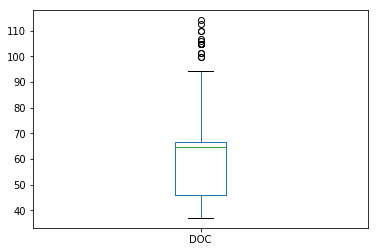

In [7]:
RHO['DOC'].plot(kind='box')

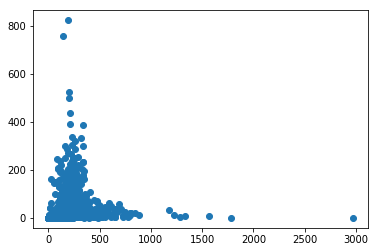

In [599]:
plt.scatter(ALK['AlkB hits/Gbp'],ALK['Total AlkB hits'])

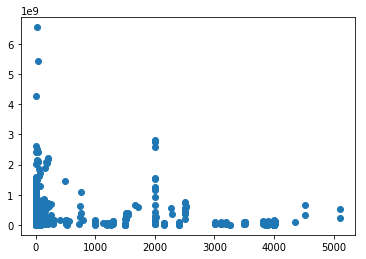

In [6]:
plt.scatter(ALK['Depth'],ALK['Genome Size   * assembled'])

In [607]:
plt.scatter(ALK['Depth'],ALK['Genome Size   * assembled'])

193     3.0
98     13.0
109     9.0
110     7.0
131    32.0
299     1.0
300     1.0
Name: Total AlkB hits, dtype: float64

In [269]:
RHO['Ocean'].value_counts()

North Pacific     309
North Atlantic    210
South Atlantic     57
South Pacific      48
Mediterranean      48
South Indian       25
Arctic             19
Black Sea          15
Antarctica         15
Name: Ocean, dtype: int64

In [270]:
RHO = get_deep_or_shallow(RHO,200,1000)
ALK = get_deep_or_shallow(ALK,200,1000)
ocean_orders = ['North Atlantic','South Atlantic','North Pacific','South Pacific','South Indian','Arctic','Antarctica','Mediterranean','Black Sea']


In [586]:
ALK[ALK['AlkB hits/Gbp']==0]['Ocean'].value_counts()

North Pacific     33
North Atlantic    18
South Pacific     13
Mediterranean     12
Black Sea          6
South Atlantic     2
Antarctica         1
South Indian       1
Name: Ocean, dtype: int64

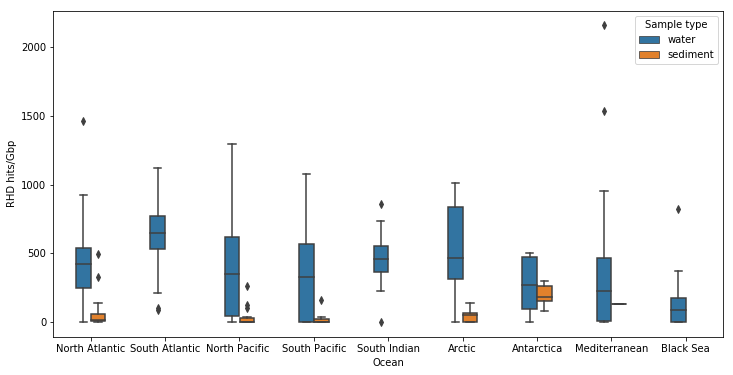

In [11]:
plt.figure(figsize=(12,6))
sns.boxplot('Ocean','RHD hits/Gbp',data=RHO,width=0.4,hue='Sample type',
            hue_order=['water','sediment'],order=ocean_orders)
#plt.savefig('GOM_HC_figures/RHD_byocean_boxplots_sampletype.png',bbox_inches='tight',dpi=300)

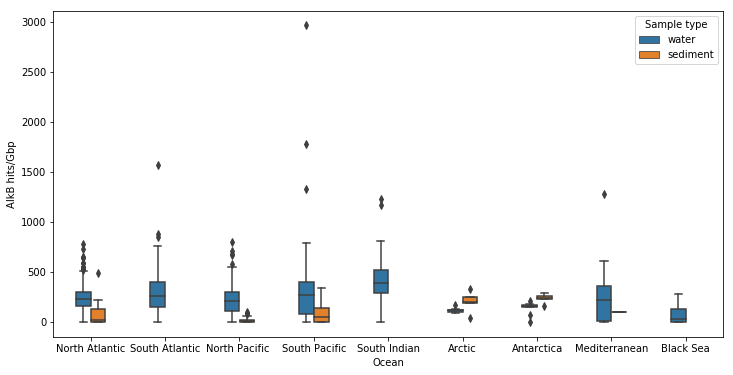

In [224]:
plt.figure(figsize=(12,6))
sns.boxplot('Ocean','AlkB hits/Gbp',data=ALK,width=0.4,hue='Sample type',
            order=ocean_orders)
plt.savefig('GOM_HC_figures/AlkB_byocean_boxplots_sampletype.png',bbox_inches='tight',dpi=300)

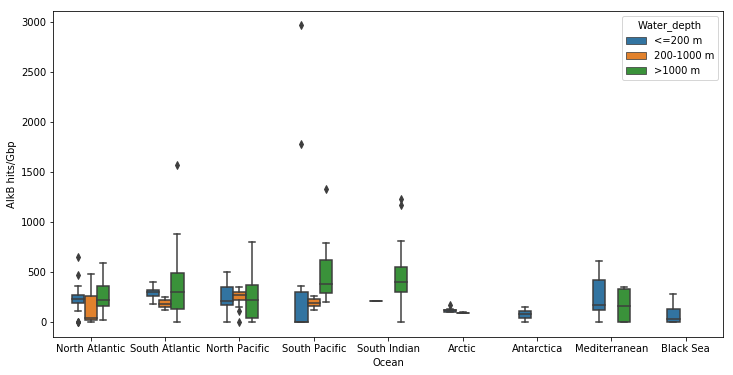

In [41]:
plt.figure(figsize=(12,6))
sns.boxplot('Ocean','AlkB hits/Gbp',data=ALK[(ALK['Sample type']=='water')&(ALK['Relative location']=='open ocean')],hue='Water_depth',
            hue_order=['<=200 m','200-1000 m','>1000 m'],order=ocean_orders,width=0.5)
plt.savefig('GOM_HC_figures/AlkB_byocean_boxplots_depth.png',bbox_inches='tight',dpi=300)

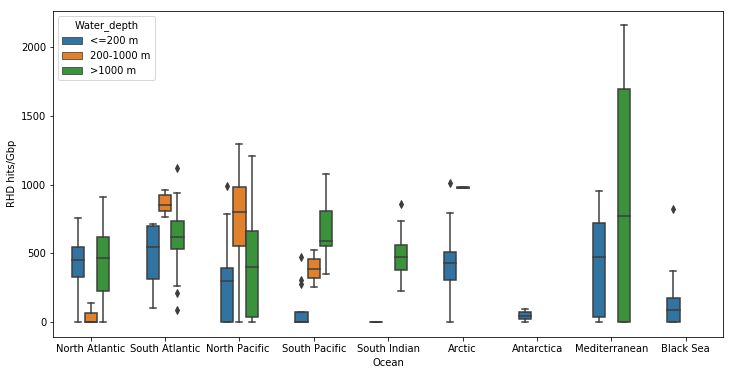

In [42]:
plt.figure(figsize=(12,6))
sns.boxplot('Ocean','RHD hits/Gbp',data=RHO[(RHO['Sample type']=='water')&(RHO['Relative location']=='open ocean')],hue='Water_depth',
            hue_order=['<=200 m','200-1000 m','>1000 m'],order=ocean_orders,width=0.5)
plt.savefig('GOM_HC_figures/RHD_byocean_boxplots_depth.png',bbox_inches='tight',dpi=300)

### V-2. Regression predictive model<a class="anchor" id="V2"></a> 

In [254]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

In [255]:
def convert_location(location):
    if location in ['hypersaline','coral reef','mangrove','freshwater']:
        return 'other'
    else:
        return location

In [10]:
ALK.columns

Index(['Actinobacteria', 'Alphaproteobacteria', 'Apparent_oxygen', 'Bacilli',
       'Bacteroidia', 'Betaproteobacteria', 'Chloroflexia', 'Cytophagia',
       'DOC', 'DON', 'DOP', 'Deferribacteres', 'Deltaproteobacteria', 'Depth',
       'Dissolved_oxygen', 'Flavobacteriia', 'Gammaproteobacteria',
       'Genome Name / Sample Name', 'Genome Size   * assembled',
       'Geographic Location', 'Habitat', 'IMG Genome ID', 'IMG Submission ID',
       'Insecta', 'Latitude', 'Leotiomycetes', 'Longitude', 'Mammalia',
       'Nitrate', 'Nitrospira <class>', 'Ocean', 'Oligoflexia',
       'Oxygen_saturation', 'Phosphate', 'Relative location', 'Salinity',
       'Sample type', 'Sequencing Center', 'Sordariomycetes',
       'Sphingobacteriia', 'Study Name', 'Temperature', 'Thermoprotei',
       'Total AlkB hits', 'AlkB hits/Gbp'],
      dtype='object')

In [256]:
alk_subset = ALK[['Relative location', 'Sample type','Latitude','Depth','Longitude','Genome Size   * assembled',
                       'Nitrate', 'Oxygen_saturation', 'Phosphate','Salinity', 'Temperature', 
                       'Dissolved_oxygen', 'Apparent_oxygen','AlkB hits/Gbp','DOC','DON','DOP','Total AlkB hits','Gammaproteobacteria']]
alk_subset.dropna(inplace=True)

alk_subset['Relative location'] = alk_subset['Relative location'].apply(convert_location)
alk_subset = pd.concat([alk_subset,pd.get_dummies(alk_subset['Relative location'])],axis=1)
alk_subset = pd.concat([alk_subset,pd.get_dummies(alk_subset['Sample type'])],axis=1)

/Users/uyennguyen/anaconda3/envs/TEST/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/uyennguyen/anaconda3/envs/TEST/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [119]:
alk_subset.columns

Index(['Relative location', 'Sample type', 'Latitude', 'Depth', 'Longitude',
       'Genome Size   * assembled', 'Nitrate', 'Oxygen_saturation',
       'Phosphate', 'Salinity', 'Temperature', 'Dissolved_oxygen',
       'Apparent_oxygen', 'AlkB hits/Gbp', 'DOC', 'DON', 'DOP',
       'Total AlkB hits', 'Gammaproteobacteria', 'coastal', 'estuary',
       'fresh water', 'open ocean', 'other', 'sediment', 'water'],
      dtype='object')

In [273]:
rho_subset = RHO[['Relative location', 'Sample type','Latitude','Depth','Longitude',
                       'Nitrate', 'Oxygen_saturation', 'Phosphate','Salinity', 'Temperature', 
                       'Dissolved_oxygen', 'Apparent_oxygen','RHD hits/Gbp','DOC','DON','DOP','Total RHD hits']]
rho_subset.dropna(inplace=True)


rho_subset['Relative location'] = rho_subset['Relative location'].apply(convert_location)
rho_subset = pd.concat([rho_subset,pd.get_dummies(rho_subset['Relative location'])],axis=1)
rho_subset = pd.concat([rho_subset,pd.get_dummies(rho_subset['Sample type'])],axis=1)

/Users/uyennguyen/anaconda3/envs/TEST/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/uyennguyen/anaconda3/envs/TEST/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [257]:
alk_subset = alk_subset[alk_subset['AlkB hits/Gbp']<800]

In [274]:
rho_subset = rho_subset[rho_subset['RHD hits/Gbp'] < 1500]

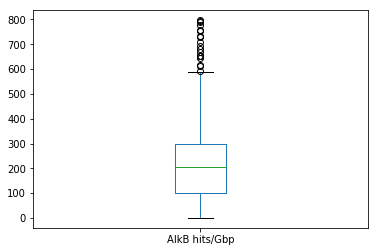

In [432]:
alk_subset['AlkB hits/Gbp'].plot(kind='box')

In [231]:
alk_subset.shape

(721, 26)

In [259]:
X = alk_subset[['Depth', 'Dissolved_oxygen', 'Phosphate',
        'Temperature', 'Salinity','Nitrate',#'Latitude','Longitude',#'DOP', 'DOC', 'DON'
       ]]
y = alk_subset['AlkB hits/Gbp']#/alk_subset['Genome Size   * assembled']*1000000000
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [275]:
X = rho_subset[['Depth', 'Dissolved_oxygen', 'Phosphate',
        'Temperature', 'Salinity','Nitrate'#'Latitude','Longitude','DOP', 'DOC', 'DON'
               ]]
y = rho_subset['RHD hits/Gbp']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

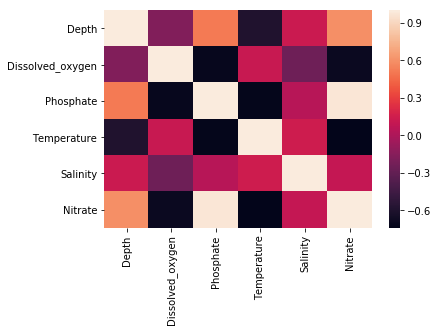

In [390]:
sns.heatmap(X.corr())

In [276]:
rf = RandomForestRegressor(n_estimators=10000,min_samples_split=5, min_samples_leaf=5)
rf.fit(X_train,np.sqrt(y_train))
y_pred_rf = rf.predict(X_test)

In [255]:
dt = DecisionTreeRegressor(max_depth=1000)
dt.fit(X_train,np.sqrt(y_train))
y_pred_dt = dt.predict(X_test)

In [628]:
gbt = GradientBoostingRegressor(n_estimators=5000)
gbt.fit(X_train,np.sqrt(y_train))
y_pred_gbt = gbt.predict(X_test)

In [278]:
print(mean_squared_error(np.sqrt(y_test),y_pred_rf))
print(r2_score(np.sqrt(y_test),y_pred_rf))

67.3560150983
0.369782738161


In [397]:
X.columns

Index(['Depth', 'Dissolved_oxygen', 'Phosphate', 'Temperature', 'Salinity',
       'Nitrate'],
      dtype='object')

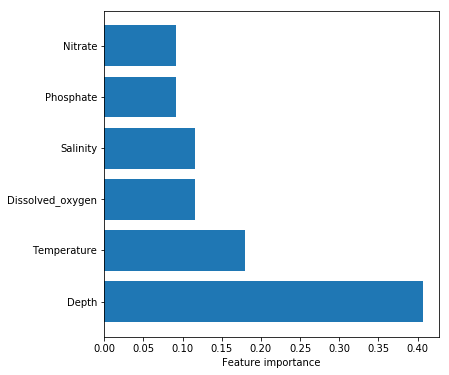

In [281]:
plt.figure(figsize=(6,6))
plt.barh(['Depth','Temperature','Dissolved_oxygen','Salinity','Phosphate','Nitrate'],sorted(rf.feature_importances_,reverse=True))
plt.xlabel('Feature importance')
#plt.ylabel ('Features')
plt.savefig("GOM_HC_figures/RHD_featureimportance",bbox_inches='tight',dpi=300)

In [262]:
['Depth','Temperature','Dissolved_oxygen','Salinity','Phosphate','Nitrate']

Index(['Depth', 'Dissolved_oxygen', 'Phosphate', 'Temperature', 'Salinity',
       'Nitrate'],
      dtype='object')

In [280]:
X.columns

Index(['Depth', 'Dissolved_oxygen', 'Phosphate', 'Temperature', 'Salinity',
       'Nitrate'],
      dtype='object')

In [279]:
rf.feature_importances_

array([ 0.40702548,  0.11583717,  0.09123719,  0.17920313,  0.11552139,
        0.09117564])

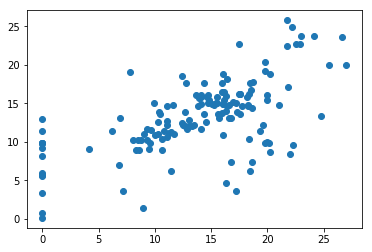

In [441]:
plt.scatter(np.sqrt(y_test),y_pred_rf)

(array([  83.,   14.,   30.,   52.,  111.,  146.,   86.,   41.,   16.,   13.]),
 array([  0.        ,   2.82302581,   5.64605161,   8.46907742,
         11.29210323,  14.11512903,  16.93815484,  19.76118065,
         22.58420645,  25.40723226,  28.23025807]),
 <a list of 10 Patch objects>)

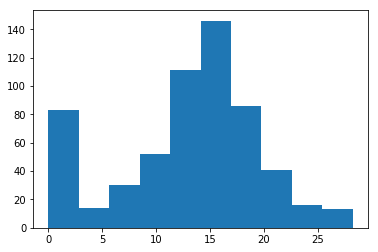

In [269]:
plt.hist(np.sqrt(y_train))

##### Box plots

/Users/uyennguyen/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


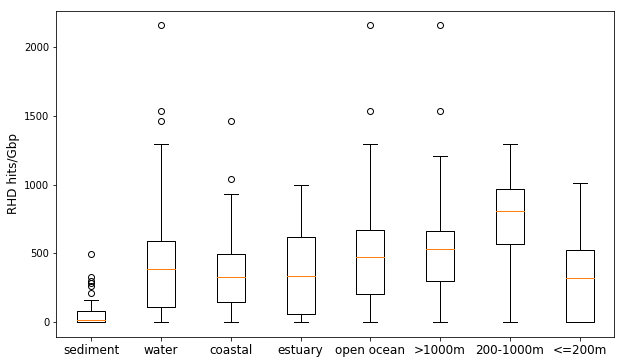

In [61]:
data_to_plot = [sed_rho,water_rho,coast_rho,estuary_rho,openocean_rho,deepocean_rho,midocean_rho,shallowocean_rho]
labels = ['sediment','water','coastal','estuary','open ocean','>1000m','200-1000m','<=200m']
boxplot(data_to_plot,labels,'RHD',figsize=(10,6))
plt.savefig('GOM_HC_figures/RHO_boxplots.png',bbox_inches='tight',dpi=300)

/Users/uyennguyen/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


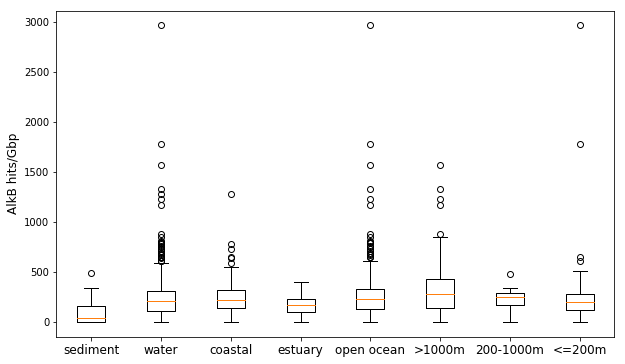

In [62]:
data_to_plot = [sed_alk,water_alk,coast_alk,estuary_alk,openocean_alk,deepocean_alk,midocean_alk,shallowocean_alk]
labels = ['sediment','water','coastal','estuary','open ocean','>1000m','200-1000m','<=200m']
boxplot(data_to_plot,labels,'AlkB',figsize=(10,6))
plt.savefig('GOM_HC_figures/AlkB_boxplots.png',bbox_inches='tight',dpi=300)

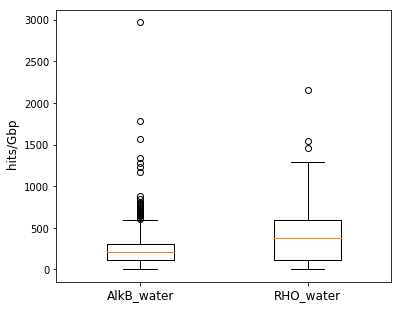

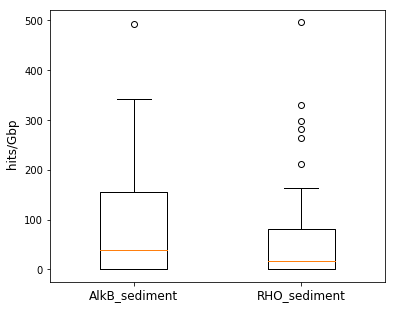

In [63]:
boxplot([water_alk,water_rho],['AlkB_water','RHO_water'],'',figsize=(6,5))
boxplot([sed_alk,sed_rho],['AlkB_sediment','RHO_sediment'],'',figsize=(6,5))
#plt.savefig('GOM_HC_figures/Water_AlkB_RHO_boxplots.png',bbox_inches='tight',dpi=300)

In [50]:
RHO['Sample type'].value_counts()

water       694
sediment     61
Name: Sample type, dtype: int64

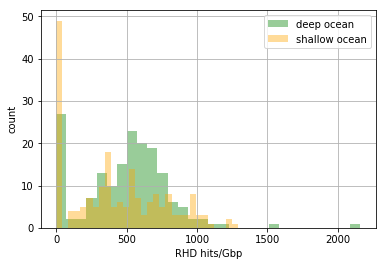

In [83]:
data_to_plot = [deepocean_rho,shallowocean_rho]
colors=['green','orange']
labels=['deep ocean','shallow ocean']
plot_hist(data_to_plot,labels,colors,'RHD',no_bins=30)


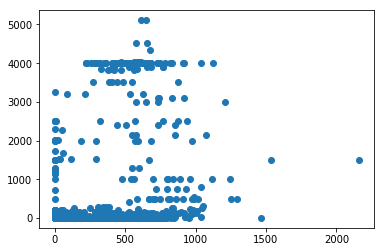

In [54]:
RHO_water = RHO[RHO['Sample type']=='water']
plt.scatter(RHO_water['RHO hits/Gbp'],RHO_water['Depth'])

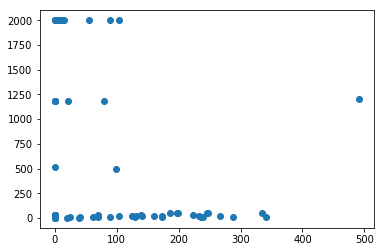

In [55]:
ALK_water = ALK[ALK['Sample type']=='sediment']
plt.scatter(ALK_water['AlkB hits/Gbp'],ALK_water['Depth'])

### V-3 Taxonomic plots <a class="anchor" id="V3"></a>

In [4]:
def get_groupby_percent(df,genename,groupbycol):
    """
    Calculate percentage of each taxa when data were grouped by groupbycol either:
    "Relative location", "deep_or_shallow", "Sample type"
    The function returns two tables:
        - df_taxon: columns are taxa, rows are the categories in groupbycol, values are raw count of each taxa
        - combine_df: columns are categories in groupbycol, rows are taxa, values are percentages
    """
    columns_to_delete = ['Genome Name / Sample Name','Relative location',
                         'Genome Size   * assembled', 'Geographic Location', 'Habitat',
                         'Longitude','Latitude','IMG Genome ID', 'IMG Submission ID',
                         'Sample type', 'Sequencing Center','Study Name','Depth','Temperature',
                         'Total %s hits' %genename, '%s hits/Gbp' %genename, 'Water_depth','Ocean',
                         'DOC','DON', 'DOP','Salinity','Dissolved_oxygen','Nitrate','Phosphate',
                         'Oxygen_saturation','Apparent_oxygen','Shannon','Simpson']
    columns_to_retain = list(set(df.columns)-set(columns_to_delete))
    df_taxon = df.groupby(groupbycol)[columns_to_retain].sum()
    taxons = {}
    for i in range(df_taxon.shape[0]):
        col=df_taxon.iloc[i]/df_taxon.iloc[i].sum()*100
        taxons[df_taxon.index[i]]=col
    taxon_percent = pd.DataFrame(taxons)
    
    return df_taxon, taxon_percent

def plot_bar(df,orderby,num_taxa,figsize,title):
    """
    df: contains percentage of taxa in different location types
    orderby: organize order of the plot (e.g, 'coastal' or 'sediment')
    num_taxa: how many taxa to display
    """
    df.sort_values(by=orderby,ascending=False).head(num_taxa).plot(kind='bar',figsize=figsize)
    plt.ylabel('Taxonomic composition %') 
    plt.title(title)

In [5]:
class_color_dicts = {'Alphaproteobacteria':'#ff6e28',
              'Gammaproteobacteria':'#4790ff',
              'Betaproteobacteria':'#ffa51e',
              'Bacilli': '#ed63c0',
               'Actinobacteria':'#3de245',
               'Chloroflexia':'#5dfcf9',
               'Flavobacteriia':'#c956ff',
              'Sordariomycetes': '#c3a4c4',
              'Dictyoglomia':'#ecfc3f',
                'Oligoflexia':'#f7ffa3',
              'Others': "#9b989b" }

def plot_bars_table(table,genename,color_dicts,index = [0.7,1.2],taxon_level="Class",figsize=(4,6)):
    
    def reverse_list(array):
        """
        This function reverse the order of the list 
        of taxa list for purpose of plotting
        """
        arr_rev = []
        for i in np.arange(len(array)-1,-1,-1):
            arr_rev.append(array[i])
        return arr_rev
    
    #Convert table to data double list 
    data = []
    for i in range(table.shape[0]):
        data.append(list(table.iloc[i]))
    
    #Get list of taxa
    rows = list(table.index)
    #Get colors 
    colors = [color_dicts[row] for row in rows]
    #define yxis scale
    values = np.arange(0,100,20)
    n_rows = len(rows)
    #Get column names for the table
    columns = table.columns
    
    bar_width = 0.3
    
    # Initialize the vertical-offset for the stacked bar chart.
    y_offset = np.zeros(len(columns))
    
    # Plot bars and create text labels for the table
    plt.figure(figsize=figsize)
    cell_text = []
    for row in range(n_rows):
        plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row],
               edgecolor='black')
        y_offset = y_offset + data[row]
        cell_text.append([round(x,1) for x in data[row]])
    
    # Reverse colors and text labels to display the last value at the top.
    colors = colors[::-1]
    cell_text.reverse()

    # Add a table at the bottom of the axes
    the_table = plt.table(cellText=cell_text,
                      rowLabels=reverse_list(rows),cellLoc='center',
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom',
                      bbox=[0.0,-0.29,1,.28])

    # Adjust layout to make room for the table:
    plt.subplots_adjust(left=0.6, bottom=0.1)
    plt.tight_layout()
    plt.ylabel('%s %s composition (percent)'%(genename,taxon_level),fontsize=12)
    plt.xticks([])
    #the_table.scale(1,4)
    the_table.auto_set_font_size(False)
    the_table.set_fontsize(9.5)

In [7]:
# Label sample by depth category
ALK = get_deep_or_shallow(ALK,200,1000)
RHO = get_deep_or_shallow(RHO,200,1000)
RHO_taxon, RHO_percent = get_groupby_percent(RHO[(RHO['Sample type']=='water')&(RHO['Water_depth']=='<=200 m')],'RHD','Ocean')
#RHO_percent.drop('South Indian',1,inplace=True)
ALK_taxon, ALK_percent = get_groupby_percent(ALK[(ALK['Sample type']=='water')&(ALK['Water_depth']=='<=200 m')],'AlkB','Ocean')

In [283]:
# Get the data ready for bar plot using function above
table = RHO_percent.sort_values(by='North Atlantic',ascending=False).head(5).sort_values(by='North Atlantic')
s_dict = {}
for col in table.columns:
    s_dict[col]=100-table[col].sum()
s= pd.DataFrame(s_dict,index=['Others'])
table = s.append(table)

In [284]:
table

,Antarctica,Arctic,Black Sea,Mediterranean,North Atlantic,North Pacific,South Atlantic,South Indian,South Pacific
Others,9.004024,15.433790,13.698630,5.202312,4.712507,7.660975,5.241935,100.0,1.740812
Flavobacteriia,2.515091,5.035877,2.739726,5.202312,5.720213,6.282781,8.378136,NaN,7.350097
Betaproteobacteria,4.828974,12.563601,2.739726,4.913295,7.354560,7.331771,4.659498,NaN,4.835590
Actinobacteria,7.595573,9.836921,12.328767,8.092486,12.973156,10.361567,10.349462,NaN,4.835590
Gammaproteobacteria,23.792757,19.465101,17.808219,17.341040,25.294267,24.444816,19.534050,NaN,19.342360
Alphaproteobacteria,52.263581,37.664710,50.684932,59.248555,43.945296,43.918089,51.836918,NaN,61.895551


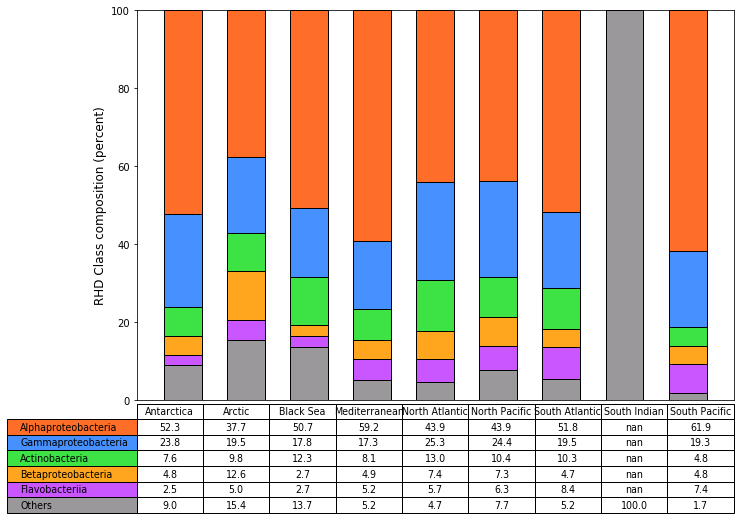

In [288]:
plot_bars_table(table,'RHD',class_color_dicts,index = [0.5,1.0,1.5,2.0,2.5,3,3.5,4,4.5],taxon_level="Class",figsize=(9,6))
#plt.savefig('GOM_HC_figures/AlkB_class_byocean_<=200m.png',bbox_inches='tight',dpi=300)

In [6]:
RHO_genus = pd.read_csv('RHD_meta_genus.csv',index_col=0)
ALK_genus = pd.read_csv('AlkB_meta_genus.csv',index_col=0)

RHO_genus = get_deep_or_shallow(RHO_genus,200,1000)
ALK_genus = get_deep_or_shallow(ALK_genus,200,1000)

RHO_genus_taxon, RHO_genus_percent = get_groupby_percent(RHO_genus[(RHO_genus['Sample type']=='water')],'RHD','Water_depth')
ALK_genus_taxon, ALK_genus_percent = get_groupby_percent(ALK_genus[(ALK_genus['Sample type']=='water')],'AlkB','Water_depth')

In [250]:
ALK_genus_percent.sort_values(by='>1000 m',ascending=False).head(15)

,200-1000 m,<=200 m,>1000 m
Ketobacter,72.171838,25.668886,38.992899
Alcanivorax,1.193317,2.362036,10.684312
Hanstruepera,13.651551,47.339489,7.165913
Streptomyces,0.906921,0.652781,6.326662
Mycobacterium,0.763723,1.241142,5.971595
Rhodococcus,0.668258,0.961993,5.551969
Burkholderia,1.957041,1.717844,3.970303
Ralstonia,0.668258,0.545416,3.292447
Acinetobacter,0.238663,0.717200,2.324080
Amycolatopsis,0.143198,0.790208,1.872176


In [8]:
#import random
genus_colors=['#848484','#2bff44','#8923c4','#ad4747','#e6b2ff',
 '#afb2ae','#c1093a','#e6ed2d','#fc4cff','#a3f2ff','#0f8c01',
 '#6b7cc6','#ff8a00','#aeffa5','#cc8a3b','#ff7a9d','#ffd77a',
 '#f9ffb2','#ff0202','#00fff2','#3a51ff','#73f4d8','#fffa00',
 '#ff6600','#00b2ff','#cb00ff','#ff009d']
#random.shuffle(genus_colors)

Text(0.5,0,'Subsets by ocean')

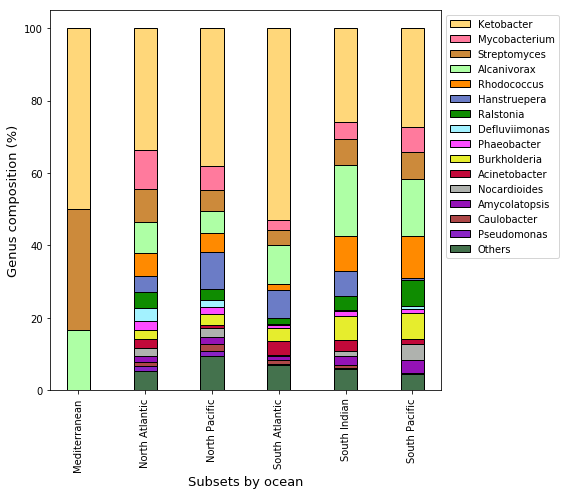

In [340]:
table = ALK_genus_percent.sort_values(by='North Atlantic',ascending=False).head(15).sort_values(by='North Atlantic')
#table.drop("South Indian",1,inplace=True)
s_dict = {}
for col in table.columns:
    s_dict[col]=100-table[col].sum()
s = pd.DataFrame(s_dict,index=['Others'])
table = s.append(table)

ax=table.T.plot(kind='bar',stacked=True,figsize=(7,7),width = 0.35,
         edgecolor = 'black',legend=False,color=genus_colors)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='best', bbox_to_anchor=(1, 1))
#fig=plt.xticks(np.arange(9), rotation=90,fontsize=11)
plt.ylabel('Genus composition (%)',fontsize=13)
plt.xlabel('Subsets by ocean',fontsize=13)
#plt.savefig("GOM_HC_figures/AlkB_genus_byocean_water_<200m.png",dpi=300,bbox_inches='tight')

In [12]:
RHO_genus_taxon, RHO_genus_percent_shallow = get_groupby_percent(RHO_genus[(RHO_genus['Sample type']=='water')&(RHO_genus['Water_depth']=='<=200 m')],'RHD','Ocean')
RHO_genus_taxon, RHO_genus_percent_deep = get_groupby_percent(RHO_genus[(RHO_genus['Sample type']=='water')&(RHO_genus['Water_depth']=='>1000 m')],'RHD','Ocean')

table1 = RHO_genus_percent_shallow.sort_values(by='North Atlantic',ascending=False).head(15).sort_values(by='North Atlantic')
table2 = RHO_genus_percent_deep.sort_values(by='North Atlantic',ascending=False).head(15)#.sort_values(by='North Atlantic')
table2=table2.append(RHO_genus_percent_deep.loc[list(set(table1.index)-set(table2.index))])
table1=RHO_genus_percent_shallow.loc[list(set(table2.index)-set(table1.index))].append(table1)

#table.drop("South Indian",1,inplace=True)
s_dict = {}
for col in table1.columns:
    s_dict[col]=100-table1[col].sum()
s = pd.DataFrame(s_dict,index=['Others'])
table1 = s.append(table1)

s_dict = {}
for col in table2.columns:
    s_dict[col]=100-table2[col].sum()
s = pd.DataFrame(s_dict,index=['Others'])
table2 = s.append(table2)
table2=table2.reindex(table1.index)



In [13]:
table2['Antarctica'] = [0] * table2.shape[0]
table2['Arctic'] = [0] * table2.shape[0]
table2['Black Sea'] = [0] * table2.shape[0]
ocean_orders = ['Antarctica', 'Arctic', 'Black Sea', 'Mediterranean', 'North Atlantic',
       'South Atlantic','North Pacific','South Pacific', 'South Indian']
table2 = table2[ocean_orders]
#table1['South Indian']=[0]*table1.shape[0] # for RHO only
table1 = table1[ocean_orders]

In [19]:
table2.head(10)

,Antarctica,Arctic,Black Sea,Mediterranean,North Atlantic,South Atlantic,North Pacific,South Pacific,South Indian
Others,0,0,0,11.111111,18.198198,18.322618,20.801233,20.947631,22.522523
Vibrio,0,0,0,7.407407,4.324324,3.974284,5.495634,4.738155,4.864865
Burkholderia,0,0,0,3.703704,2.522523,2.396259,2.105804,2.743142,1.981982
Roseiflexus,0,0,0,3.703704,2.432432,2.045587,1.848998,2.244389,1.801802
Chloroflexus,0,0,0,7.407407,2.522523,4.558738,2.619414,2.493766,4.144144
Halomonas,0,0,0,18.518519,4.774775,4.997078,5.701079,3.491272,3.783784
Bacillus,0,0,0,3.703704,8.018018,12.741087,4.468413,4.987531,4.864865
Achromobacter,0,0,0,11.111111,5.405405,6.458212,3.030303,3.990025,6.666667
Klebsiella,0,0,0,3.703704,3.333333,2.483928,1.592193,2.244389,2.882883
Methylocella,0,0,0,0.000000,0.180180,0.409117,0.205444,0.000000,0.000000


In [20]:
def plot_clustered_stacked(dfall,genename, labels=None, title="multiple stacked bar plot",  H="/", **kwargs):
    """Given a list of dataframes, with identical columns and index, create a clustered stacked bar plot. 
labels is a list of the names of the dataframe, used for the legend
title is a string for the title of the plot
H is the hatch used for identification of the different dataframe"""

    n_df = len(dfall)
    n_col = len(dfall[0].columns) 
    n_ind = len(dfall[0].index)
    axe = plt.subplot(111)

    for df in dfall : # for each data frame
        axe = df.plot(kind="bar",
                      linewidth=0.8,
                      stacked=True,
                      ax=axe,
                      legend=False,
                      grid=False,
                      edgecolor = 'black',
                      color=genus_colors,
                      figsize=(10,10),
                      **kwargs)  # make bar plots

    h,l = axe.get_legend_handles_labels() # get the handles we want to modify

    for i in range(0, n_df * n_col, n_col): # len(h) = n_col * n_df
        for j, pa in enumerate(h[i:i+n_col]):
            for rect in pa.patches: # for each index
                rect.set_x(rect.get_x() + 1 / float(n_df + 1) * i / float(n_col))
                rect.set_hatch(H * int(i / n_col)) #edited part     
                rect.set_width(1 / float(n_df + 1))

    axe.set_xticks((np.arange(0, 2 * n_ind, 2) + 1 / float(n_df + 1)) / 2.)
    axe.set_xticklabels(df.index, rotation = 45,ha='right')
    #axe.set_title(title)

    # Add invisible data to add another legend
    n=[]        
    for i in range(n_df):
        n.append(axe.bar(0, 0, color="gray", hatch=H * i))

    l1=axe.legend(h[::-1][n_col:], l[::-1][n_col:], loc='best', bbox_to_anchor=(1, 1))
    
    if labels is not None:
        l2 = plt.legend(n, labels, bbox_to_anchor=(1, 0.1))
    axe.add_artist(l1)
    plt.ylabel(genename+ " Genus composition (%)" ,fontsize=13)

    return axe


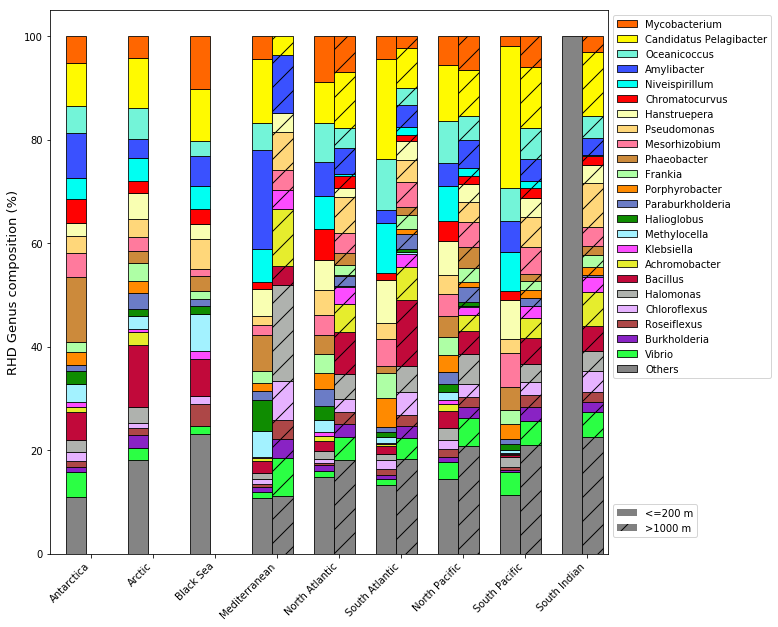

In [17]:
plot_clustered_stacked([table1.T,table2.T],'RHD',labels=['<=200 m','>1000 m'])
#plt.savefig("GOM_HC_figures/AlkB_genus_byocean_comparedepth.png",dpi=300,bbox_inches='tight')

Text(0.5,0,'Subsets by ocean')

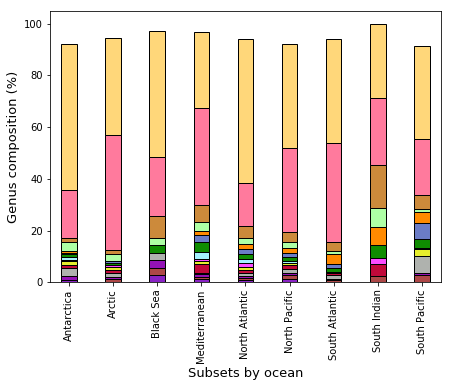

In [310]:
ax1=table1.T.plot(kind='bar',stacked=True,figsize=(7,5),width = 0.35,
         edgecolor = 'black',legend=False,color=genus_colors)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='best', bbox_to_anchor=(1, 1))
#fig=plt.xticks(np.arange(9), rotation=90,fontsize=11)
plt.ylabel('Genus composition (%)',fontsize=13)
plt.xlabel('Subsets by ocean',fontsize=13)
#plt.savefig("GOM_HC_figures/AlkB_genus_byocean_water_<200m.png",dpi=300,bbox_inches='tight')

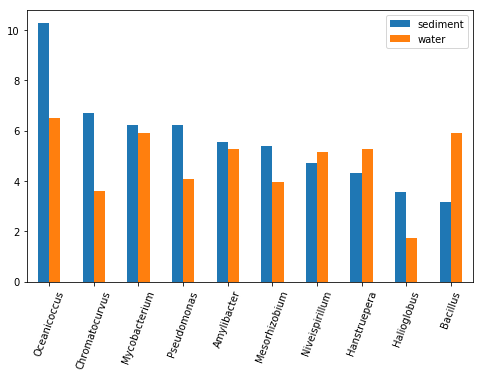

In [328]:
fig = combine.sort_values(by='sediment',ascending=False).head(10).plot(kind='bar',figsize=(8,5))
for tick in fig.get_xticklabels():
    tick.set_rotation(70)

In [ ]:
plot_bar(combine,'coastal',num_taxa=8,figsize=(8,5),title='AlkB composition at class level')
plt.savefig('ALK_family_bylocation.png',bbox_inches='tight',dpi=200)

### V-4 Statistical analyses <a class="anchor" id="V4"></a>

In [7]:
from skbio import DistanceMatrix
import numpy as np
from skbio.stats.distance import anosim
from sklearn.metrics import pairwise_distances 
from skbio.stats.distance import permanova
import scipy as sp


In [8]:
def T_test(list1,list2,equal_var=False):
    print("mean="+str(list1.mean())+", stdev="+str(list1.std())+", size="+str(len(list1)))
    print("mean="+str(list2.mean())+", stdev="+str(list2.std())+", size="+str(len(list2)))
    
    print(sp.stats.ttest_ind(list1,list2,equal_var=equal_var))

In [10]:
RHO = pd.read_csv('RHD_meta_class.csv',index_col=0)
ALK = pd.read_csv('AlkB_meta_class.csv',index_col=0)

sed_alk,water_alk,coast_alk,openocean_alk,estuary_alk, deepocean_alk,midocean_alk,shallowocean_alk = get_sub_df(ALK,'AlkB',200,1000)
sed_rho,water_rho,coast_rho,openocean_rho,estuary_rho,deepocean_rho,midocean_rho,shallowocean_rho = get_sub_df(RHO,'RHD',200,1000)

In [11]:
print("samples with no AlkB hits :", list(ALK['AlkB hits/Gbp']).count(0))
print("samples with no RHDs hits :", list(RHO['RHD hits/Gbp']).count(0))

samples with no AlkB hits : 98
samples with no RHDs hits : 157


In [13]:
T_test(shallowocean_rho,pd.Series(list(midocean_rho)+list(deepocean_rho)))

mean=306.551340479, stdev=267.384235064, size=149
mean=552.670575278, stdev=332.025371983, size=220
Ttest_indResult(statistic=-7.8582929278231708, pvalue=4.6616202012136849e-14)


In [39]:
T_test(shallowocean_rho,deepocean_rho)

mean=308.65781087874547, stdev=267.39383508077475, size=146
mean=496.1668282570585, stdev=315.0087342778631, size=170
Ttest_indResult(statistic=-5.7231490048054203, pvalue=2.4419692982826497e-08)


In [15]:
T_test(shallowocean_alk,pd.Series(list(midocean_alk)+list(deepocean_alk)))

mean=228.238174918, stdev=294.85437036, size=149
mean=301.11710096, stdev=237.863060458, size=220
Ttest_indResult(statistic=-2.5135739396115349, pvalue=0.012530537755321343)


In [73]:
print("sed vs. water for RHO:")
T_test(sed_rho,water_rho)
print("\n")
print("sed vs. water for AlkB:")
T_test(sed_alk,water_alk)

sed vs. water for RHO:
mean=60.580828507322465, stdev=96.6945625027243, size=66
mean=391.8020315017275, stdev=308.8280647022219, size=704
Ttest_indResult(statistic=-19.896135065797957, pvalue=7.4808152183827572e-52)


sed vs. water for AlkB:
mean=90.32903492406106, stdev=110.19129379742145, size=66
mean=238.65955910668924, stdev=221.6704215027819, size=704
Ttest_indResult(statistic=-9.311310525736884, pvalue=6.5977860838218818e-16)


In [17]:
print("open vs. coast for AlkB:")
T_test(openocean_alk,coast_alk)
print("\n")
print("open vs. estuary for AlkB:")
T_test(coast_alk,estuary_alk)

open vs. coast for AlkB:
mean=271.689025133, stdev=264.418880793, size=369
mean=236.611207466, stdev=172.706799425, size=203
Ttest_indResult(statistic=1.9124794450422096, pvalue=0.056330484862981388)


open vs. estuary for AlkB:
mean=236.611207466, stdev=172.706799425, size=203
mean=175.771921515, stdev=91.3529260506, size=101
Ttest_indResult(statistic=4.0154535090548045, pvalue=7.4985479438345105e-05)


In [16]:
print("open vs. coast for RHO:")
T_test(openocean_rho,coast_rho)
print("\n")
print("open vs. estuary for RHO:")
T_test(coast_rho,estuary_rho)

open vs. coast for RHO:
mean=453.289095644, stdev=330.122831915, size=369
mean=338.351850225, stdev=249.167038787, size=203
Ttest_indResult(statistic=4.6877046044779647, pvalue=3.5401413110783859e-06)


open vs. estuary for RHO:
mean=338.351850225, stdev=249.167038787, size=203
mean=366.794341327, stdev=302.545953554, size=101
Ttest_indResult(statistic=-0.81695169164501447, pvalue=0.41510392104119342)


In [139]:
alk_deep = ALK[(ALK['Sample type']=='water')&(ALK['Depth']>1000)&(ALK['Relative location']=='open ocean')]['AlkB hits/Gbp']
alk_mid = ALK[(ALK['Sample type']=='water')&(ALK['Depth']<=1000)&(ALK['Relative location']=='open ocean')&(ALK['Depth']>200)]['AlkB hits/Gbp']
alk_shallow = ALK[(ALK['Sample type']=='water')&(ALK['Depth']<=200)&(ALK['Relative location']=='open ocean')]['AlkB hits/Gbp']
print(len(alk_deep),len(alk_mid),len(alk_shallow))
print(list(alk_deep).count(0)/170*100)
print(list(alk_mid).count(0)/50*100)
print(list(alk_shallow).count(0)/146*100) 

170 50 146


In [143]:
rho_deep = RHO[(RHO['Sample type']=='water')&(RHO['Depth']>1000)&(RHO['Relative location']=='open ocean')]['RHD hits/Gbp']
rho_mid = RHO[(RHO['Sample type']=='water')&(RHO['Depth']<=1000)&(RHO['Relative location']=='open ocean')&(RHO['Depth']>200)]['RHD hits/Gbp']
rho_shallow = RHO[(RHO['Sample type']=='water')&(RHO['Depth']<=200)&(RHO['Relative location']=='open ocean')]['RHD hits/Gbp']
print(len(rho_deep),len(rho_mid),len(rho_shallow))
print(list(rho_deep).count(0)/170*100)
print(list(rho_mid).count(0)/50*100)
print(list(rho_shallow).count(0)/146*100) 

170 50 146
8.823529411764707
6.0
28.767123287671232


/Users/uyennguyen/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


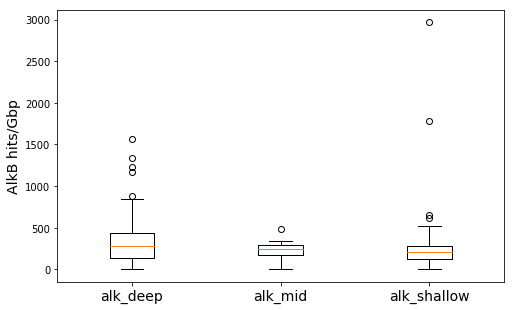

In [141]:
data_to_plot = [alk_deep,alk_mid,alk_shallow]
boxplot(data_to_plot,labels=["alk_deep",'alk_mid','alk_shallow'],genename='AlkB')

In [142]:
T_test(alk_deep,alk_mid)
T_test(alk_deep,alk_shallow)
T_test(alk_mid,alk_shallow)

mean=321.54716227600676, stdev=263.35754225595906, size=170
mean=231.6548924868243, stdev=85.37949334597515, size=50
Ttest_indResult(statistic=3.8199266483543894, pvalue=0.00017445451139209945)
mean=321.54716227600676, stdev=263.35754225595906, size=170
mean=229.40034171221592, stdev=297.0441229150946, size=146
Ttest_indResult(statistic=2.8961322346902016, pvalue=0.0040629221303485515)
mean=231.6548924868243, stdev=85.37949334597515, size=50
mean=229.40034171221592, stdev=297.0441229150946, size=146
Ttest_indResult(statistic=0.082316656917486505, pvalue=0.9344813001577722)


In [144]:
T_test(rho_deep,rho_mid)
T_test(rho_deep,rho_shallow)
T_test(rho_mid,rho_shallow)

mean=496.1668282570585, stdev=315.0087342778631, size=170
mean=744.7833151485561, stdev=318.9482383362489, size=50
Ttest_indResult(statistic=-4.8587308510257747, pvalue=5.8509203609507736e-06)
mean=496.1668282570585, stdev=315.0087342778631, size=170
mean=308.65781087874547, stdev=267.39383508077475, size=146
Ttest_indResult(statistic=5.7231490048054203, pvalue=2.4419692982826497e-08)
mean=744.7833151485561, stdev=318.9482383362489, size=50
mean=308.65781087874547, stdev=267.39383508077475, size=146
Ttest_indResult(statistic=8.6804563165800204, pvalue=6.6963279599358458e-13)


### ANOSIM, NMDS, and diversity anlyses of gene composition

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import manifold
from sklearn.metrics.pairwise import pairwise_distances
import skbio 

#### Diversity Analyses

In [161]:
def diversity_boxplot(dfs,index_type,labels,genename,figsize=(8,5)):
    """
    This function plot boxplot of certain feature in each class of target variable
    - df: dataframe
    - col: feature column
    """
    # Create a figure instance
    fig = plt.figure(figsize=figsize)
    # Create an axes instance
    ax = fig.add_subplot(111)
    # Create the boxplot
    data_to_plot = [df[index_type].dropna() for df in dfs]    
    ax.boxplot(data_to_plot)
    ax.set_xticklabels(labels,fontsize=12)#,rotation=45)
    plt.ylabel(genename + " " + index_type + " index",fontsize=14)

In [39]:
RHO_genus = pd.read_csv('RHD_meta_genus.csv',index_col=0)
RHO_genus = get_deep_or_shallow(RHO_genus,200,1000)

ALK_genus = pd.read_csv('AlkB_meta_genus.csv',index_col=0)
ALK_genus = get_deep_or_shallow(ALK_genus,200,1000)

In [70]:
# Get genus taxa lists for each gene
genename='AlkB'
columns_to_delete = ['Genome Name / Sample Name','Relative location',
                         'Genome Size   * assembled', 'Geographic Location', 'Habitat',
                         'Longitude','Latitude','IMG Genome ID', 'IMG Submission ID',
                         'Sample type', 'Sequencing Center','Study Name','Depth','Temperature',
                         'Total %s hits' %genename, '%s hits/Gbp' %genename, 'Ocean','Water_depth',
                         'DOC','DON', 'DOP','Salinity','Dissolved_oxygen','Nitrate','Phosphate',
                     'Oxygen_saturation','Apparent_oxygen']
taxa = list(set(ALK_genus.columns)-set(columns_to_delete))

In [ ]:
ALK_genus[]

In [71]:
# Calculate shannon and simpson diversity indices
ALK_genus['Shannon']=ALK_genus[taxa].astype('int').apply(lambda x:skbio.diversity.alpha.shannon(x),axis=1)
ALK_genus['Simpson']=ALK_genus[taxa].astype('int').apply(lambda x:skbio.diversity.alpha.simpson(x),axis=1)
#RHO_genus.to_csv('RHO_meta_genus.csv')
#ALK_genus.to_csv('AlkB_meta_genus.csv')

/Users/uyennguyen/anaconda3/envs/TEST/lib/python3.6/site-packages/skbio/diversity/alpha/_base.py:869: RuntimeWarning: invalid value encountered in true_divide
  freqs = counts / counts.sum()
/Users/uyennguyen/anaconda3/envs/TEST/lib/python3.6/site-packages/skbio/diversity/alpha/_base.py:138: RuntimeWarning: invalid value encountered in true_divide
  freqs = counts / counts.sum()


In [117]:
['North Pacific', 'Mediterranean', 'North Atlantic', 'South Pacific',
       'Arctic', 'Antarctica', 'Black Sea', 'South Atlantic',
       'South Indian']

array(['North Pacific', 'Mediterranean', 'North Atlantic', 'South Pacific',
       'Arctic', 'Antarctica', nan, 'Black Sea', 'South Atlantic',
       'South Indian'], dtype=object)

/Users/uyennguyen/anaconda3/envs/TEST/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


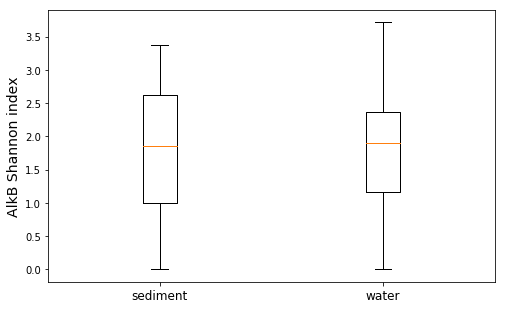

In [165]:
# Box plots for diversity index
kinds = ['sediment','water']
dfs=[]
dataframe = ALK_genus
for kind in kinds:
    dfs.append(dataframe[#(dataframe['Relative location']=='open ocean')&
                         dataframe['Sample type']==kind])# &
                        #(dataframe['Ocean']==kind)])
                        

index_type = 'Shannon' 
diversity_boxplot(dfs,index_type,kinds,'AlkB',figsize=(8,5))
plt.savefig('GOM_HC_figures/AlkB_shannon_bysampletype.png',bbox_inches='tight',dpi=300)

In [166]:
T_test(dfs[0]['Shannon'].dropna(),dfs[1]['Shannon'].dropna())

mean=1.73752343335, stdev=1.06014984786, size=46
mean=1.7439841364, stdev=0.868279559181, size=620
Ttest_indResult(statistic=-0.040340823681502998, pvalue=0.96798341386652931)


In [143]:
for df in dfs:
    print(df['Shannon'].mean())

3.69987182455
2.03088947223
3.52621814593
3.3714406345
4.22768857915
3.88631501792
1.54770943025
3.73331883584
3.17128743552


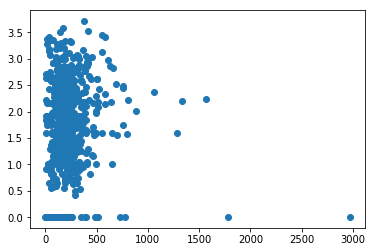

In [94]:
plt.scatter(ALK_genus['AlkB hits/Gbp'],ALK_genus['Shannon'])

#### ANOSIM analyses and NMDS plots

In [775]:
RHO_genus = pd.read_csv('RHD_meta_genus.csv',index_col=0)
ALK_genus = pd.read_csv('AlkB_meta_genus.csv',index_col=0)
ALK_genus =get_deep_or_shallow(ALK_genus,200,1000)
RHO_genus = get_deep_or_shallow(RHO_genus,200,1000)

In [194]:
def calculate_percent(df,genename):
    """
    
    """
    columns_to_delete = ['Genome Name / Sample Name','Relative location',
                         'Genome Size   * assembled', 'Geographic Location', 'Habitat',
                         'Longitude','Latitude','IMG Genome ID', 'IMG Submission ID',
                         'Sample type', 'Sequencing Center','Study Name','Depth','Temperature',
                         'Total %s hits' %genename, '%s hits/Gbp' %genename, 'Ocean','Water_depth',
                         'DOC','DON', 'DOP','Salinity','Dissolved_oxygen','Nitrate','Phosphate',
                     'Oxygen_saturation','Apparent_oxygen','Shannon','Simpson']
    columns_to_retain = list(set(df.columns)-set(columns_to_delete))
    df_sub = df[columns_to_retain]
    df_taxon = []
    locations = []
    depths = []
    types = []
    oceans=[]
    for i in range(df.shape[0]):
        if df_sub.iloc[i].sum() > 0:
            df_taxon.append(df_sub.iloc[i]/df_sub.iloc[i].sum())
            locations.append(df['Relative location'].iloc[i])
            depths.append(df['Water_depth'].iloc[i])
            types.append(df['Sample type'].iloc[i])
            oceans.append(df['Ocean'].iloc[i])

            
    taxon = pd.DataFrame(df_taxon)
    taxon['Relative location'] = locations
    taxon['Water_depth'] = depths
    taxon['Sample type'] = types
    taxon['Ocean'] = oceans
    return taxon

In [173]:
def anosim_test(dfs,no_permutations=1000):
    OTU_df = pd.concat(dfs)
    OTU_mat = OTU_df.as_matrix()
    bc_dm = pairwise_distances(OTU_mat,metric="braycurtis")
    dm = DistanceMatrix(bc_dm)
    grouping = []
    for i in range(len(dfs)):
        grouping += [i] * dfs[i].shape[0]
        print(dfs[i].shape[0])
    np.random.seed(0)
    
    return anosim(dm, grouping, permutations=no_permutations), bc_dm, grouping


In [174]:
def MDS_plot(bc_dm,grouping,kind,colors,figsize=(8,8)):
    mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=101,
                       dissimilarity="precomputed", n_jobs=1)
    pos = mds.fit(bc_dm).embedding_
    if kind=='mds':
        xs, ys = pos[:, 0], pos[:, 1]
    elif kind =='nmds':
        nmds = manifold.MDS(n_components=2, metric=False, max_iter=3000, eps=1e-12,
                        dissimilarity="precomputed", random_state=101, n_jobs=1,
                        n_init=1)
        npos = nmds.fit_transform(bc_dm, init=pos)
        xs, ys = npos[:, 0], npos[:, 1]

    fig, ax = plt.subplots(figsize=figsize)
    for i in range(0, len(xs)):
        col = colors[grouping[i]]
        scatter = ax.scatter(np.array(xs[i]), np.array(ys[i]), c=col, s=100, alpha=0.5,edgecolors='black') 
    plt.xlabel('Dimension 1', fontsize=14, labelpad=12)
    plt.ylabel('Dimension 2', fontsize=14, labelpad=12)
    #plt.legend(loc='best')
    #plt.suptitle('Products', fontsize=24)
    plt.tick_params(labelsize=15, length=14, direction='out', pad=10, top='off', right='off')

In [210]:
rho_abundance=calculate_percent(RHO_genus,'RHD')
alk_abundance = calculate_percent(ALK_genus,'AlkB')

In [229]:
# Get genus taxa lists for each gene
genename='AlkB'
columns_to_delete = ['Genome Name / Sample Name','Relative location',
                         'Genome Size   * assembled', 'Geographic Location', 'Habitat',
                         'Longitude','Latitude','IMG Genome ID', 'IMG Submission ID',
                         'Sample type', 'Sequencing Center','Study Name','Depth','Temperature',
                         'Total %s hits' %genename, '%s hits/Gbp' %genename, 'Ocean','Water_depth',
                         'DOC','DON', 'DOP','Salinity','Dissolved_oxygen','Nitrate','Phosphate',
                     'Oxygen_saturation','Apparent_oxygen','Shannon','Simpson']
taxa = list(set(ALK_genus.columns)-set(columns_to_delete))

In [230]:
#kinds = ['deep ocean','mid ocean','shallow ocean']
ocean_orders = ['North Atlantic','South Atlantic',
               'North Pacific', 'South Pacific',
               'South Indian', 'Arctic','Antarctica',
               'Mediteranean','Black Sea']
dfs=[]
for kind in ocean_orders:
    dfs.append(alk_abundance[(alk_abundance['Sample type']=='water')&
                             #(alk_abundance['Relative location']=='coastal')&
                             #(rho_abundance['Water_depth']=='<=200 m')&
                            (alk_abundance['Ocean']==kind)][taxa])
                        


In [234]:
result,bc_dm,grouping = anosim_test([dfs[0],dfs[2]])

176
262


In [235]:
result

method name                    ANOSIM
test statistic name                 R
sample size                       438
number of groups                    2
test statistic               0.130285
p-value                   0.000999001
number of permutations           1000
Name: ANOSIM results, dtype: object

In [208]:
dfcolors = ['orange','blue','grey','green','red','black','purple','yellow','pink']

/Users/uyennguyen/anaconda3/envs/TEST/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


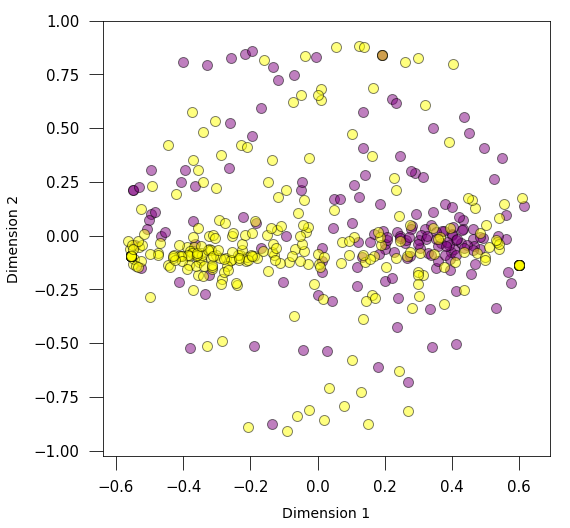

In [237]:
MDS_plot(bc_dm,grouping,kind='mds',colors=dfcolors[6:8])
plt.savefig("GOM_HC_figures/AlkB_nmds_NAtlantic_NPacific.png",bbox_inches='tight',dpi=300)

In [134]:
rho_abundance["Relative location"] = rho_abundance["Relative location"].astype('category')
label=list(rho_abundance["Relative location"].cat.codes)

In [366]:
meta_prok = pd.read_csv('genomes_proks_metadata.csv')
prok = pd.read_csv('prokaryotes.csv')
meta_prok['Assembly'] = meta_prok[['Assembly','RefSeq FTP']].apply(lambda x:x.strip(' '))
df = pd.merge(meta_prok[['Assembly']],prok,how='left',on=['Assembly'])
df.dropna(subset=['Organism Groups'],inplace=True)
notmatch_ass = list(set(meta_prok['Assembly'])-set(df['Assembly']))
meta_prok_2 = meta_prok[meta_prok['Assembly'].isin(notmatch_ass)]
meta_prok_2['Assembly'] = meta_prok_2['Assembly'].apply(lambda x:'.'.join([x.split('.')[0],'2']))
df2 = pd.merge(meta_prok_2[['Assembly']],prok,how='left',on=['Assembly'])
df2['Assembly'] = df2['Assembly'].apply(lambda x:'.'.join([x.split('.')[0],'1']))
df_concat = pd.concat([df,df2])
df_concat.dropna(subset=['Organism Groups'],inplace=True)
nomatch_ass_2 = list(set(meta_prok['Assembly'])-set(df_concat['Assembly']))
meta_prok[meta_prok['Assembly'].isin(nomatch_ass_2)].to_csv('NCBI_Nomatchlist.csv')
df_concat['Organism Groups']=df_concat['Organism Groups'].astype(str)
df_concat['Domain'] = df_concat['Organism Groups'].apply(lambda x:x.split(';')[0])


In [469]:
meta_prok = pd.read_csv('genomes_proks_metadata.csv')
prok = pd.read_csv('prokaryotes.csv')
meta_prok['Assembly'] = meta_prok['Assembly'].apply(lambda x:x.strip(' '))
df = pd.merge(meta_prok[['Assembly','RefSeq FTP']],prok,how='left',on=['Assembly'])
#df.drop('RefSeq FTP_y',1,inplace=True)
df.rename({'RefSeq FTP_x':'RefSeq FTP'},inplace=True)

In [470]:
df.dropna(subset=['Organism Groups'],inplace=True)
notmatch_ass = list(set(meta_prok['Assembly'])-set(df['Assembly']))
meta_prok_2 = meta_prok[meta_prok['Assembly'].isin(notmatch_ass)]
meta_prok_2['Assembly'] = meta_prok_2['Assembly'].apply(lambda x:'.'.join([x.split('.')[0],'2']))

/Users/uyennguyen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [477]:
df2 = pd.merge(meta_prok_2[['Assembly','RefSeq FTP']],prok,how='left',on=['Assembly'])
df2['Assembly'] = df2['Assembly'].apply(lambda x:'.'.join([x.split('.')[0],'1']))
df2.drop('RefSeq FTP_y',1,inplace=True)
df2.rename({'RefSeq FTP_x':'RefSeq FTP'},inplace=True)

In [484]:
df_concat = pd.concat([df,df2])
df_concat.dropna(subset=['Organism Groups'],inplace=True)
df_concat['Organism Groups']=df_concat['Organism Groups'].astype(str)
df_concat['Domain'] = df_concat['Organism Groups'].apply(lambda x:x.split(';')[0])
df_concat['Genus']=df_concat['#Organism Name'].apply(lambda x:x.split(' ')[0])
df_concat['Species']=df_concat['#Organism Name'].apply(lambda x:' '.join(x.split(' ')[0:2]))
df_concat.to_csv('NCBI_genomes_metadata.csv')

### V-5. Analyze GOS subset <a class="anchor" id="V5"></a>

In [408]:
GOS_alk = ALK[ALK['Study Name']=='Marine microbial communities from Global Ocean Sampling (GOS)']
GOS_mean_total_alk=GOS_alk.groupby(['Latitude','Longitude','Genome Name / Sample Name',
                 'Depth','Relative location','Sample type'])['Total AlkB hits'].mean().reset_index()
GOS_mean_normalized_alk=GOS_alk.groupby(['Latitude','Longitude','Genome Name / Sample Name',
                 'Depth','Relative location','Sample type'])['AlkB hits/Gbp'].mean().reset_index()
GOS_mean_alk = pd.merge(GOS_mean_total_alk,GOS_mean_normalized_alk,on=['Latitude','Longitude','Genome Name / Sample Name',
                 'Depth','Relative location','Sample type'])

In [413]:
GOS_sed_alk,GOS_water_alk,GOS_coast_alk,GOS_openocean_alk,GOS_estuary_alk, GOS_deepocean_alk,GOS_surfaceocean_alk = get_sub_df(GOS_alk,'AlkB')
GOS_sed_rho,GOS_water_rho,GOS_coast_rho,GOS_openocean_rho,GOS_estuary_rho,GOS_deepocean_rho,GOS_surfaceocean_rho = get_sub_df(GOS_rho,'RHO')

/Users/uyennguyen/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


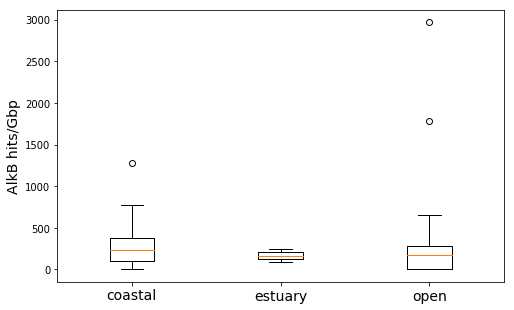

In [415]:
data_to_plot=[GOS_coast_alk,GOS_estuary_alk,GOS_openocean_alk]
labels = ['coastal','estuary','open']
boxplot(data_to_plot,labels,'AlkB',figsize=(8,5))

In [423]:
T_test(GOS_coast_alk,GOS_openocean_alk)

258.9944582673254
260.65835436803894
Ttest_indResult(statistic=-0.02469066686428973, pvalue=0.98038168161682371)


In [291]:
GOS_alk_class, GOS_combine_alk = get_groupby_percent(GOS_alk,'AlkB','Relative location')

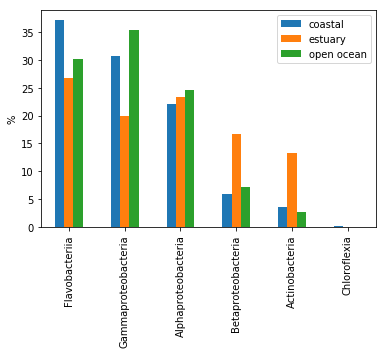

In [295]:
plot_bar(GOS_combine_alk,'coastal',6)

In [146]:
GOS_openocean_alk = GOS_alk_class.iloc[6]/GOS_alk_class.iloc[6].sum()*100
GOS_coastal_alk = GOS_alk_class.iloc[0]/GOS_alk_class.iloc[0].sum()*100
GOS_esturary_alk = GOS_alk_class.iloc[2]/GOS_alk_class.iloc[2].sum()*100
GOS_fresh_alk = GOS_alk_class.iloc[3]/GOS_alk_class.iloc[3].sum()*100


GOS_alk_percent = pd.DataFrame({'openocean':GOS_openocean_alk,'coastal':GOS_coastal_alk,'estuary':GOS_esturary_alk,'freshwater':GOS_fresh_alk })

/Users/uyennguyen/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:179: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


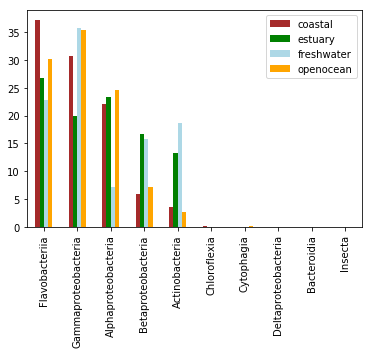

In [154]:
GOS_alk_percent.sort_values(by='coastal',ascending=False).head(10).plot(kind='bar',colors=['brown','green','lightblue','orange'])

In [404]:
GOS_rho = RHO[RHO['Study Name']=='Marine microbial communities from Global Ocean Sampling (GOS)']
GOS_mean_total_rho=GOS_rho.groupby(['Latitude','Longitude','Genome Name / Sample Name',
                 'Depth','Relative location'])['Total RHO hits'].mean().reset_index()
GOS_mean_normalized_rho=GOS_rho.groupby(['Latitude','Longitude','Genome Name / Sample Name',
                 'Depth','Relative location'])['RHO hits/Gbp'].mean().reset_index()
GOS_mean_rho = pd.merge(GOS_mean_total_rho,GOS_mean_normalized_rho,on=['Latitude','Longitude','Genome Name / Sample Name',
                 'Depth','Relative location'])

In [405]:
GOS_mean = pd.merge(GOS_mean_alk,GOS_mean_rho,on=['Latitude','Longitude','Genome Name / Sample Name',
                 'Depth'])
GOS_mean.shape

(72, 10)

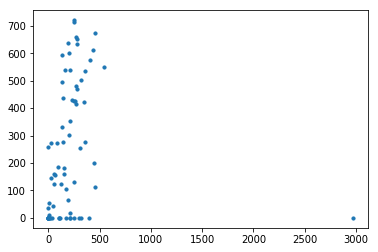

In [406]:
plt.scatter(GOS_mean['AlkB hits/Gbp'],GOS_mean['RHO hits/Gbp'],s=10)

In [407]:
GOS_mean.head()

,Latitude,Longitude,Genome Name / Sample Name,Depth,Relative location_x,Total AlkB hits,AlkB hits/Gbp,Relative location_y,Total RHO hits,RHO hits/Gbp
0,-17.475834,-149.81223,"Marine microbial communities from Moorea, Cook...",1.4,coral reef,0.0,0.000000,coral reef,0.0,0.000000
1,-17.453056,-149.79889,"Marine microbial communities from Moorea, Cook...",1.4,coastal,0.0,0.000000,coastal,0.0,0.000000
2,-15.277778,-148.22444,Marine microbial communities from Tikehau Lago...,1.2,coral reef,0.0,0.000000,coral reef,0.0,0.000000
3,-15.143611,-147.43500,Marine microbial communities from Rangirora At...,1.0,coral reef,21.0,252.326174,coral reef,0.0,0.000000
4,-10.131389,-135.44945,Marine microbial communities from Polynesia - ...,30.0,open ocean,18.0,355.535737,open ocean,14.0,276.527795


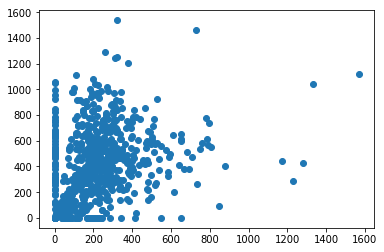

In [155]:
alk_rho = pd.concat([pd.merge(ALK,RHO,on=['IMG Genome ID']),pd.merge(ALK,RHO,on=['IMG Submission ID'])])
alk_rho = alk_rho.drop_duplicates(subset=['IMG Genome ID'],keep='first')
plt.scatter(alk_rho['AlkB hits/Gbp'],alk_rho['RHO hits/Gbp'])

<br>
## VI. Geographic plotting of genes <a class="anchor" id="VI"></a>

### VI-1. Plotting the all sample locations on interactive map <a class="anchor" id="VI1"></a>

In [220]:
meta.columns

Index(['Depth', 'Genome Name / Sample Name', 'Genome Size   * assembled',
       'Geographic Location', 'Habitat', 'IMG Genome ID', 'IMG Submission ID',
       'Latitude', 'Longitude', 'Relative location', 'Sequencing Center',
       'Study Name', 'Sample type'],
      dtype='object')

In [26]:
from ast import literal_eval as make_tuple
import folium

#IMG = pd.read_csv('IMG_metadata.csv')
#EBI = pd.read_csv('EMBI_EBI_GOS.csv')
meta = pd.read_csv('IMG_EBI_metadata.csv')
lat = list(meta['Latitude']) 
lon = list(meta['Longitude'])
def color_assign(Sampletype):
    if Sampletype == 'water':
        return 'blue'
    else:
        return 'brown'
meta['color'] = meta['Sample type'].apply(lambda x:color_assign(x))
#Convert each location point to tuple
code_tuple = []
for i in range(0,len(lat)):
    code_tuple.append((lat[i],lon[i]))

#Map the points
#latlon = code_tuple
mapit = folium.Map( location=[40, -1.464582], zoom_start=2,tiles='Mapbox Bright')
for i in range(meta.shape[0]):
    folium.CircleMarker(location=[meta['Latitude'].iloc[i],meta['Longitude'].iloc[i]],
                        radius=1,fill=True,
                        #fill_color='#FF0000',
                        fill_opacity=0.5,
                        weight=4,
                        color=meta['color'].iloc[i]).add_to(mapit)

#Save map 
mapit.save( 'Sample_map.png',dpi=300) 

In [20]:
folium.Marker

(308, 4)

In [30]:
from ast import literal_eval as make_tuple
import folium

#IMG = pd.read_csv('IMG_metadata.csv')
#EBI = pd.read_csv('EMBI_EBI_GOS.csv')
RHO = pd.read_csv('AlkB_meta_class.csv')
data =RHO.groupby(['Latitude','Longitude',#'Genome Name / Sample Name',
                 'Depth'])['AlkB hits/Gbp'].mean().reset_index()

#data_mean = data.groupby(['Latitude','Longitude','Genome Name / Sample Name',
                 #'Depth'])['RHO hits/Gbp'].mean().reset_index()

#Map the points
mapit = folium.Map( location=[40, -1.464582], zoom_start=2,tiles='Mapbox Bright')
for i in range(0,len(data)):
    folium.CircleMarker(location=[data['Latitude'].iloc[i],data['Longitude'].iloc[i]],
                        popup=data['Depth'].iloc[i].astype('str'),
                        radius=data['AlkB hits/Gbp'].iloc[i]/100+1,
                        fill=True,
                        fill_color='blue',
                        fill_opacity=0.2,
                        weight=1,
                        color='blue').add_to(mapit)
    




#Save map 
mapit.save( 'AlkB_sample_map.html') 

### VI-2. Plotting the distribution of genes on map <a class="anchor" id="VI2"></a>

In [21]:
import plotly.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 

In [23]:
limits = [(0,1),(1,3),(3,5),(5,7),(7,10)]
colors = ["rgb(135,206,250)",'rgb(0,191,255)','rgb(30,144,255)','rgb(0,0,255)','rgb(0,0,205)']
samples = []
scale = 10

for i in range(len(limits)):
    df_sub = GOS_mean[(GOS_mean['Depth']<limits[i][1]) &(GOS_mean['Depth']>=limits[i][0])]
    sample = dict(
        type = 'scattergeo',
        lon = df_sub['Longitude'],
        lat = df_sub['Latitude'],
        text = df_sub['RHO hits/Gbp'].astype(str),
        #text = df_sub['text'],
        marker = dict(
            alpha=0.2,
            size = df_sub['RHO hits/Gbp']/scale+10,
            color = colors[i],
            line = dict(width=0.5, color='rgb(40,40,40)'),
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(limits[i][0],limits[i][1]) )
    samples.append(sample)

layout = dict(
    geo = dict(
        scope = 'world',
        showland = True,
        landcolor = "rgb(212, 212, 212)",
        subunitcolor = "rgb(255, 255, 255)",
        countrycolor = "rgb(255, 255, 255)",
        showlakes = True,
        lakecolor = "rgb(255, 255, 255)",
        showsubunits = True,
        showcountries = True,
        resolution = 50,
        projection = dict(
            type = 'Mercator',
            rotation = dict(
                lon = -100
            )
        )
    ),
    title = 'Distribution of AlkB',
)

fig = { 'data':samples, 'layout':layout }
iplot( fig, validate=False, filename='d3-bubble-map-populations' )    


NameError: name 'GOS_mean' is not defined

In [158]:
limits = [(0,1),(1,3),(3,5),(5,7),(7,10)]
colors = ["rgb(135,206,250)",'rgb(0,191,255)','rgb(30,144,255)','rgb(0,0,255)','rgb(0,0,205)']
samples = []
scale = 10

for i in range(len(limits)):
    df_sub = GOS_mean[(GOS_mean['Depth']<limits[i][1]) &(GOS_mean['Depth']>=limits[i][0])]
    sample = dict(
        type = 'scattergeo',
        #locationmode = 'USA-states',
        lon = df_sub['Longitude'],
        lat = df_sub['Latitude'],
        text = df_sub['RHO hits/Gbp'].astype(str),
        #text = df_sub['text'],
        marker = dict(
            alpha=0.2,
            size = df_sub['RHO hits/Gbp']/scale+10,
            color = colors[i],
            line = dict(width=0.5, color='rgb(40,40,40)'),
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(limits[i][0],limits[i][1]) )
    samples.append(sample)

layout = dict(
    geo = dict(
        scope = 'world',
        showland = True,
        landcolor = "rgb(212, 212, 212)",
        subunitcolor = "rgb(255, 255, 255)",
        countrycolor = "rgb(255, 255, 255)",
        showlakes = True,
        lakecolor = "rgb(255, 255, 255)",
        showsubunits = True,
        showcountries = True,
        resolution = 50,
        projection = dict(
            type = 'Mercator',
            rotation = dict(
                lon = -100
            )
        )
    ),
    title = 'Distribution of RHO',
)

fig = { 'data':samples, 'layout':layout }
iplot( fig, validate=False, filename='d3-bubble-map-populations' )    


In [24]:
scl = [[0,'rgb(0,0,255)'],[1,"rgb(30,144,255)"],[2,"rgb(0, 25, 255)"],\
[5,"rgb(0, 152, 255)"],[10,"rgb(44, 255, 150)"],[100,"rgb(151, 255, 0)"]]#,
#[2000,"rgb(255, 111, 0)"],[3000,"rgb(255, 0, 0)"]
scale = 10
surface = RHO

data = [ dict(
    lat = surface['Latitude'],
    lon = surface['Longitude'],
    text = surface['RHO hits/Gbp'].astype(str),
    
    marker = dict(        
        color = surface['Depth'],
        colorscale = 'coolwarm',
        reversescale = True,
        opacity = 0.5,
            size = surface['RHO hits/Gbp']/scale+5,
        sizemode = 'area',       
        colorbar = dict(
            thickness = 10,
            titleside = "right",
            outlinecolor = "rgba(68, 68, 68, 0)",
            ticks = "outside",
            ticklen = 3,
            showticksuffix = "last",
            #ticksuffix = " inches",
            dtick = 500
        ),
    ),
    type = 'scattergeo'
) ]



layout = dict(
    geo = dict(
        scope = 'world',
        showland = True,
        landcolor = "rgb(212, 212, 212)",
        subunitcolor = "rgb(255, 255, 255)",
        countrycolor = "rgb(255, 255, 255)",
        showlakes = True,
        lakecolor = "rgb(255, 255, 255)",
        showsubunits = True,
        showcountries = True,
        resolution = 50,
        projection = dict(
            type = 'Mercator',
            rotation = dict(
                lon = -100
            )
        )
    ),
    title = 'Distribution of RHO',
)
fig = { 'data':data, 'layout':layout }
iplot( fig, validate=False, filename='d3-bubble-map-populations' )

In [191]:
scl = [[0,'rgb(0,0,255)'],[1,"rgb(30,144,255)"],[2,"rgb(0, 25, 255)"],\
[5,"rgb(0, 152, 255)"],[10,"rgb(44, 255, 150)"],[100,"rgb(151, 255, 0)"]]#,
#[2000,"rgb(255, 111, 0)"],[3000,"rgb(255, 0, 0)"]
scale = 10
surface = ALK

data = [ dict(
    lat = surface['Latitude'],
    lon = surface['Longitude'],
    text = surface['Geographic Location'].astype(str),
    
    marker = dict(        
        color = surface['AlkB hits/Gbp'],
        colorscale = 'coolwarm',
        #reversescale = True,
        opacity = 0.5,
        #size = surface['AlkB hits/Gbp']/scale+5,
        #sizemode = 'area',       
        colorbar = dict(
            thickness = 10,
            titleside = "right",
            outlinecolor = "rgba(68, 68, 68, 0)",
            ticks = "outside",
            ticklen = 3,
            showticksuffix = "last",
            #ticksuffix = " inches",
            dtick = 500
        ),
    ),
    type = 'scattergeo'
) ]



layout = dict(
    geo = dict(
        scope = 'world',
        showland = True,
        landcolor = "rgb(212, 212, 212)",
        subunitcolor = "rgb(255, 255, 255)",
        countrycolor = "rgb(255, 255, 255)",
        showlakes = True,
        lakecolor = "rgb(255, 255, 255)",
        showsubunits = True,
        showcountries = True,
        resolution = 50,
        projection = dict(
            type = 'Mercator',
            rotation = dict(
                lon = -100
            )
        )
    ),
    title = 'Distribution of AlkB',
)
fig = { 'data':data, 'layout':layout }
iplot( fig, validate=False, filename='d3-bubble-map-populations' )

In [211]:
gene_df[gene_df['IMG Submission ID']=='21794']

,Actinobacteria,Alphaproteobacteria,Bacilli,Bacteroidia,Betaproteobacteria,Chloroflexia,Cytophagia,Deferribacteres,Deltaproteobacteria,Flavobacteriia,...,IMG Genome ID,IMG Submission ID,Insecta,Leotiomycetes,Mammalia,Nitrospira <class>,Oligoflexia,Sordariomycetes,Sphingobacteriia,Thermoprotei
21794.assembled.faa_AlkB.faa.blast,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21794,21794,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [209]:
merge.columns

Index(['Actinobacteria', 'Alphaproteobacteria', 'Bacilli', 'Bacteroidia',
       'Betaproteobacteria', 'Bryopsida', 'Caldisericia', 'Chloroflexia',
       'Chlorophyceae', 'Clostridia', 'Cytophagia', 'Deinococci',
       'Deltaproteobacteria', 'Depth', 'Dictyoglomia', 'Epsilonproteobacteria',
       'Flavobacteriia', 'Fusobacteriia', 'Gammaproteobacteria',
       'Genome Name / Sample Name', 'Genome Size   * assembled',
       'Geographic Location', 'Habitat', 'IMG Genome ID', 'IMG Submission ID',
       'Ignavibacteria', 'Insecta', 'Latitude', 'Leotiomycetes', 'Longitude',
       'Mammalia', 'Maxillopoda', 'Nitrospira <class>', 'Oligoflexia',
       'Relative location', 'Sample type', 'Sequencing Center',
       'Sordariomycetes', 'Sphingobacteriia', 'Spirochaetia', 'Study Name',
       'Thermotogae', 'Verrucomicrobiae', 'Total RHO hits', 'RHO hits/Gbp'],
      dtype='object')

In [225]:
import csv
with open('total_filenames.csv','r') as f:
    filenames = [row.rstrip() for row in f]

In [228]:
IDs = [name.split('.')[0] for name in filenames]

In [230]:
notfoundlist = []
for i in range(df.shape[0]):
    if df['IMG Genome ID'].iloc[i] not in IDs and df['IMG Submission ID'].iloc[i] not in IDs:
        notfoundlist.append(df['IMG Genome ID'].iloc[i])

In [238]:
df[df['IMG Genome ID']=='3300027893']

,Depth,Genome Name / Sample Name,Genome Size * assembled,Geographic Location,Habitat,IMG Genome ID,IMG Submission ID,Latitude,Longitude,Relative location,Sequencing Center,Study Name,Sample type
620,NaN,Marine sediment microbial communities from Whi...,2405770886,"White Oak River estuary, North Carolina, USA",Marine sediment,3300027893,187464,34.647811,-77.111208,coastal,DOE Joint Genome Institute (JGI),Marine sediment microbial communities from Whi...,sediment


## Miscellaneous<a class="anchor" id="VII"></a>

In [ ]:
import pandas as pd, csv, string, numpy as np
from Bio import SeqIO

old_file = 'GCF_AlkB_aligned_1.csv'
with open(old_file,'r') as f:
    used_seqs = set([line.rstrip() for line in f])

new_file = 'GCF_AlkB_2_out.csv'

with open(new_file,'r') as f:
    sequence = [line.rstrip() for line in f]
del sequence[0:14]
threshold_index = [sequence.index(i) for i in sequence if 'threshold' in i][0]
domain_index = [sequence.index(i) for i in sequence if 'Domain' in i][0]
if threshold_index < domain_index:
    del sequence[threshold_index:]
else:
    del sequence[domain_index-2:]

df = pd.DataFrame()
df['Evalue'] = [float(item.split()[0]) for item in sequence]
df['Sequence'] = [item.split()[8] for item in sequence]
searched_sequences = list(df[df['Evalue'] < 0.01]['Sequence'])

with open('GCF_AlkB_2.faa', "w") as f:
    fasta_sequences = SeqIO.parse(open('GCF_merged_unique_update.faa'),'fasta')
    s = [seq for seq in fasta_sequences]
    for seq in s:
        if seq.id in searched_sequences and seq.id not in used_seqs:
            SeqIO.write([seq], f, "fasta")

In [6]:
s = '((1_WP_082303147_1:0.24246,3_WP_054290271_1:0.24246):0.24095,((((((2_WP_011659975_1:0.07799,504_WP_081333506_1:0.07799):0.06639,513_WP_080410084_1:0.14438):0.17945,5_WP_059250219_1:0.32383):0.13971,(4_WP_058378898_1:0.46110,((((((((((((((((((((((((((((((((((((((((((((((7_ABO12068_2:0.00000,265_WP_000993544_1:0.00000):0.00053,161_WP_000993545_1:0.00053):0.00003,297_WP_000993551_1:0.00056):0.00003,315_WP_029424359_1:0.00059):0.00029,611_WP_000993553_1:0.00088):0.00007,394_WP_000993549_1:0.00095):0.00031,323_WP_045544194_1:0.00126):0.00021,((14_AHX64431_1:0.00000,116_WP_000993538_1:0.00000):0.00093,329_WP_044695533_1:0.00093):0.00054):0.00015,298_WP_000993546_1:0.00161):0.00020,311_WP_000993555_1:0.00182):0.00043,36_AQU58642_1:0.00225):0.00010,9_ADX92311_1:0.00234):0.00022,123_WP_000993541_1:0.00256):0.00018,616_WP_000993539_1:0.00274):0.00021,673_WP_079548523_1:0.00295):0.00055,(314_WP_032047557_1:0.00159,610_WP_004709037_1:0.00159):0.00191):0.00111,369_WP_049590998_1:0.00462):0.00414,(((33_AMO40825_1:0.00000,620_WP_005069435_1:0.00000):0.00238,(162_YP_004995277_1:0.00201,419_WP_017386863_1:0.00201):0.00037):0.00417,604_WP_081174121_1:0.00655):0.00221):0.00395,(168_WP_013198046_1:0.00520,596_WP_080026974_1:0.00520):0.00752):0.03177,(556_WP_075315551_1:0.03371,(562_WP_075696457_1:0.00224,668_WP_039047901_1:0.00224):0.03147):0.01077):0.01828,(131_WP_004925568_1:0.04093,572_WP_076032682_1:0.04093):0.02183):0.02331,441_WP_067659095_1:0.08607):0.02018,((382_WP_053577830_1:0.08138,409_WP_010326608_1:0.08138):0.00172,(463_WP_067729916_1:0.04666,(579_WP_076753643_1:0.04340,664_WP_099339041_1:0.04340):0.00326):0.03644):0.02314):0.05116,((169_WP_013198473_1:0.00953,595_WP_005041890_1:0.00953):0.03472,((557_WP_075315761_1:0.00068,669_WP_099948520_1:0.00068):0.00180,561_WP_005402760_1:0.00248):0.04176):0.11316):0.02606,((((91_WP_011786287_1:0.00569,219_WP_041654888_1:0.00569):0.01734,399_WP_058092141_1:0.02303):0.00846,(153_WP_014577857_1:0.01987,379_WP_053112754_1:0.01987):0.01163):0.09293,171_WP_013260510_1:0.12443):0.05904):0.02751,(((((((((((((((((8_ABO53908_1:0.00118,((203_WP_014722638_1:0.00071,(508_WP_059455933_1:0.00028,517_WP_034194113_1:0.00028):0.00043):0.00003,341_WP_045579368_1:0.00074):0.00044):0.01726,((((((((((((((((34_AOJ21094_1:0.00000,585_WP_069232312_1:0.00000):0.00055,586_WP_077218820_1:0.00055):0.00003,588_WP_078040759_1:0.00058):0.00028,118_WP_012328091_1:0.00086):0.00166,81_WP_041489167_1:0.00251):0.00462,((52_WP_006496590_1:0.00083,434_WP_062884702_1:0.00083):0.00008,(408_WP_058902068_1:0.00083,435_WP_062910917_1:0.00083):0.00008):0.00622):0.00023,291_WP_059235603_1:0.00736):0.00076,(((((40_ATF78316_1:0.00000,395_WP_027788117_1:0.00000):0.00083,506_WP_048024179_1:0.00083):0.00377,518_WP_069272573_1:0.00460):0.00274,(364_WP_047850573_1:0.00373,511_WP_069247381_1:0.00373):0.00361):0.00026,70_WP_011351263_1:0.00760):0.00052):0.00038,(362_WP_047900060_1:0.00718,641_WP_096472696_1:0.00718):0.00131):0.00165,221_WP_014897792_1:0.01014):0.00048,510_WP_069256029_1:0.01063):0.00038,(502_WP_069225289_1:0.00955,503_WP_059977886_1:0.00955):0.00145):0.00105,509_WP_059557147_1:0.01205):0.00198,174_WP_011656209_1:0.01403):0.00033,119_WP_012363291_1:0.01436):0.00075,529_WP_069745942_1:0.01512):0.00332):0.00283,(299_WP_009695692_1:0.00083,507_WP_069244871_1:0.00083):0.02045):0.00137,(308_WP_040143639_1:0.00152,516_WP_069241080_1:0.00152):0.02112):0.00253,(((60_WP_012467518_1:0.00291,523_WP_060139994_1:0.00291):0.00030,(302_WP_048805111_1:0.00180,343_WP_006410992_1:0.00180):0.00140):0.00092,515_WP_006406275_1:0.00412):0.02105):0.00205,342_WP_035972883_1:0.02723):0.00136,(((337_WP_045566501_1:0.00450,((505_WP_059654880_1:0.00394,(512_WP_059749555_1:0.00375,519_WP_069269977_1:0.00375):0.00018):0.00028,522_WP_069236866_1:0.00422):0.00028):0.00302,514_WP_060231439_1:0.00752):0.00605,612_WP_084901377_1:0.01356):0.01502):0.00104,521_WP_060016598_1:0.02963):0.04100,(((78_WP_011492067_1:0.01544,637_WP_095421011_1:0.01544):0.00339,120_WP_012427267_1:0.01883):0.00179,(345_WP_046572902_1:0.01326,458_WP_063499249_1:0.01326):0.00736):0.05001):0.00594,((((((((((((((((37_ARL49330_1:0.00000,38_ARL99447_1:0.00000):0.00000,63_YP_108945_1:0.00000):0.00000,273_WP_004538099_1:0.00000):0.00028,255_WP_004540069_1:0.00028):0.00043,199_WP_004553697_1:0.00070):0.00018,69_WP_004524677_1:0.00088):0.00045,543_WP_071810561_1:0.00133):0.00012,274_WP_038723169_1:0.00145):0.00037,(64_YP_102417_1:0.00000,94_WP_004191500_1:0.00000):0.00182):0.00047,339_WP_028358403_1:0.00229):0.00019,336_WP_038799286_1:0.00248):0.00153,300_WP_004548191_1:0.00401):0.01172,((68_WP_009890105_1:0.00055,280_WP_009904578_1:0.00055):0.01165,(249_WP_015601343_1:0.00151,338_WP_006025890_1:0.00151):0.01069):0.00352):0.00581,414_WP_059584156_1:0.02154):0.00488,(301_WP_010105150_1:0.00443,340_WP_010116298_1:0.00443):0.02199):0.04470,520_WP_069234116_1:0.07112):0.00545):0.00279,((125_WP_015876470_1:0.03020,396_WP_055139015_1:0.03020):0.01980,((163_WP_013698792_1:0.00368,344_WP_036049941_1:0.00368):0.00241,647_WP_096750524_1:0.00610):0.04391):0.02936):0.01488,((121_WP_012430194_1:0.01344,(335_WP_045219728_1:0.00439,(455_WP_063394228_1:0.00123,648_WP_096745844_1:0.00123):0.00315):0.00905):0.01770,(467_WP_021192765_1:0.00096,472_WP_064806678_1:0.00096):0.03017):0.06312):0.05266,(225_WP_008738933_1:0.10788,(231_WP_014996703_1:0.01535,600_WP_080531795_1:0.01535):0.09253):0.03904):0.02112,(((67_WP_011061224_1:0.00062,321_WP_041118140_1:0.00062):0.01868,(416_WP_060839178_1:0.00361,417_WP_060843515_1:0.00361):0.01569):0.07871,(((((((((202_WP_014718291_1:0.00390,663_WP_098951781_1:0.00390):0.01031,350_WP_043050876_1:0.01421):0.00425,442_WP_063029341_1:0.01846):0.00055,464_WP_064452133_1:0.01901):0.00060,(((328_WP_010209991_1:0.00748,(420_WP_033902380_1:0.00338,500_WP_069077504_1:0.00338):0.00410):0.00057,373_WP_049712976_1:0.00806):0.00162,590_WP_078048772_1:0.00968):0.00993):0.00140,(267_WP_024075934_1:0.00237,499_WP_069076356_1:0.00237):0.01864):0.00588,593_WP_046383671_1:0.02689):0.00091,241_WP_015372291_1:0.02779):0.00893,292_WP_038440619_1:0.03672):0.06129):0.07002):0.02701,(((((((((((((((((((((((((((((((((((((((11_AEJ48190_1:0.00000,12_AFE18050_1:0.00000):0.00000,24_AMC43541_1:0.00000):0.00000,25_AMC52390_1:0.00000):0.00000,26_AMC56708_1:0.00000):0.00000,28_AMC65701_1:0.00000):0.00000,29_AMC70219_1:0.00000):0.00000,31_AMC83308_1:0.00000):0.00000,49_WP_003417047_1:0.00000):0.00000,164_NP_856925_1:0.00000):0.00000,165_NP_217769_1:0.00000):0.00077,198_WP_014001641_1:0.00077):0.00042,324_WP_045449935_1:0.00119):0.00031,15_AGL28698_1:0.00150):0.00020,658_WP_031658975_1:0.00170):0.00033,23_AJW50476_1:0.00203):0.01408,((27_AMC61015_1:0.00000,30_AMC74796_1:0.00000):0.00000,32_AMC91701_1:0.00000):0.01611):0.04033,(((((35_APA77438_1:0.00180,558_WP_019733462_1:0.00180):0.00160,(((46_WP_003874560_1:0.00026,325_WP_023868150_1:0.00026):0.00040,481_WP_023883945_1:0.00065):0.00083,86_WP_011725948_1:0.00148):0.00191):0.00232,39_ATA29384_1:0.00571):0.04137,(((((201_WP_008259796_1:0.00064,533_WP_042913496_1:0.00064):0.00080,208_WP_014380962_1:0.00144):0.00397,253_WP_020823382_1:0.00541):0.01632,638_WP_095577703_1:0.02173):0.02421,614_WP_007773148_1:0.04594):0.00114):0.00567,642_WP_096437887_1:0.05276):0.00368):0.00135,((114_WP_012393161_1:0.00305,639_WP_096370129_1:0.00305):0.04911,150_WP_023371553_1:0.05216):0.00564):0.01085,((((((((((((82_WP_011558744_1:0.00700,98_WP_011855012_1:0.00700):0.03375,((87_YP_886209_1:0.00000,211_WP_011727945_1:0.00000):0.02007,374_WP_049747853_1:0.02007):0.02068):0.00429,421_WP_050982559_1:0.04503):0.00080,207_WP_041781781_1:0.04583):0.00026,(89_WP_011778985_1:0.04318,(187_WP_041302802_1:0.02848,239_WP_041311440_1:0.02848):0.01470):0.00292):0.00255,((101_WP_041800889_1:0.00222,160_WP_041788755_1:0.00222):0.04419,469_WP_003929436_1:0.04640):0.00225):0.00238,484_WP_068915886_1:0.05103):0.00307,461_WP_082902468_1:0.05410):0.00080,236_WP_019514710_1:0.05490):0.00100,(251_WP_003882727_1:0.00256,389_WP_054601686_1:0.00256):0.05333):0.01050,671_WP_087020226_1:0.06640):0.00130,677_WP_003927986_1:0.06770):0.00095):0.01761,((361_WP_047329472_1:0.01216,546_WP_071947080_1:0.01216):0.02395,589_WP_078020466_1:0.03611):0.05015):0.00127,242_WP_047313329_1:0.08753):0.00418,(177_WP_013829920_1:0.05379,679_WP_085259091_1:0.05379):0.03791):0.01172,(((((((57_WP_020907102_1:0.00223,(565_WP_030535014_1:0.00026,606_WP_054781789_1:0.00026):0.00197):0.00068,480_WP_065352226_1:0.00291):0.07356,167_WP_013416741_1:0.07647):0.00253,((((61_WP_007297971_1:0.04592,583_WP_077043571_1:0.04592):0.01348,(((62_WP_012689460_1:0.01333,((83_WP_011595253_1:0.00362,482_WP_054246569_1:0.00362):0.00248,284_WP_005251086_1:0.00611):0.00722):0.03939,((334_WP_045200419_1:0.01312,(444_WP_045841230_1:0.00273,452_WP_032381527_1:0.00273):0.01039):0.03843,((355_WP_050035908_1:0.00169,494_WP_006940284_1:0.00169):0.01358,666_WP_010593515_1:0.01527):0.03629):0.00117):0.00567,541_WP_033090113_1:0.05839):0.00102):0.00222,(212_WP_014350954_1:0.05365,275_WP_025350804_1:0.05365):0.00797):0.01449,548_WP_071931535_1:0.07611):0.00289):0.00854,((79_WP_011740672_1:0.00368,((115_WP_012395148_1:0.00066,129_WP_015356363_1:0.00066):0.00108,640_WP_096370402_1:0.00174):0.00193):0.04125,151_WP_036393247_1:0.04493):0.04261):0.00180,(388_WP_062394459_1:0.08416,493_WP_004019855_1:0.08416):0.00519):0.00299,536_WP_070378009_1:0.09233):0.01110):0.00478,((((269_WP_024101506_1:0.00026,544_WP_071935410_1:0.00026):0.00092,636_WP_094980237_1:0.00118):0.00279,307_WP_033097093_1:0.00397):0.00205,681_WP_059382258_1:0.00602):0.10218):0.00334,((((((((135_YP_001704327_1:0.00000,305_WP_005111911_1:0.00000):0.00039,304_WP_032692575_1:0.00039):0.00015,368_WP_005080858_1:0.00054):0.00015,438_WP_052537196_1:0.00068):0.00091,(209_WP_005056260_1:0.00148,(260_WP_005070213_1:0.00078,303_WP_005100497_1:0.00078):0.00070):0.00011):0.00671,433_WP_043077702_1:0.00830):0.00833,400_WP_083013632_1:0.01662):0.00184,((440_WP_030096905_1:0.00156,457_WP_046255951_1:0.00156):0.00256,643_WP_096506077_1:0.00411):0.01435):0.09308):0.00201,(178_WP_013830919_1:0.03752,680_WP_085260164_1:0.03752):0.07604):0.01138,(((((55_WP_011211153_1:0.00090,371_WP_060594583_1:0.00090):0.05583,214_WP_081505477_1:0.05673):0.00563,(195_WP_014987826_1:0.00576,626_WP_042258156_1:0.00576):0.05660):0.00673,547_WP_071929766_1:0.06909):0.00332,276_WP_025352421_1:0.07242):0.05253):0.00321,(179_WP_013806919_1:0.09146,181_WP_049793883_1:0.09146):0.03669):0.00361,139_WP_013137703_1:0.13176):0.01206,((56_WP_020906149_1:0.00162,((261_WP_003945652_1:0.00082,352_WP_046377931_1:0.00082):0.00060,288_WP_029254461_1:0.00143):0.00019):0.11697,180_WP_013808586_1:0.11859):0.02523):0.00407,137_WP_083773850_1:0.14788):0.01456,((128_WP_012937191_1:0.13435,(319_WP_040246668_1:0.10205,326_WP_099055326_1:0.10205):0.03230):0.02579,(258_WP_020937457_1:0.11695,407_WP_063824505_1:0.11695):0.04319):0.00229):0.00518,(((((((((((53_WP_011209853_1:0.00522,370_WP_060590497_1:0.00522):0.02040,(54_WP_011211149_1:0.00542,372_WP_060594584_1:0.00542):0.02020):0.04626,213_WP_014351055_1:0.07188):0.00240,215_WP_086008239_1:0.07428):0.00053,(278_WP_081769814_1:0.06899,662_WP_098697201_1:0.06899):0.00582):0.00265,540_WP_033089223_1:0.07746):0.00508,549_WP_084760077_1:0.08254):0.00538,627_WP_042259752_1:0.08792):0.02939,277_WP_081769634_1:0.11731):0.02621,(333_WP_045199982_1:0.03473,(446_WP_080966381_1:0.00058,454_WP_080730129_1:0.00058):0.03415):0.10878):0.00535,447_WP_082833857_1:0.14886):0.01876):0.00269,((((((((((17_AJK57700_1:0.00731,(250_WP_016334611_1:0.00091,294_WP_038512877_1:0.00091):0.00640):0.00076,330_WP_044856471_1:0.00807):0.03729,(170_YP_003768535_1:0.00000,184_WP_013228182_1:0.00000):0.04536):0.01189,496_WP_065913194_1:0.05725):0.03667,670_WP_054049163_1:0.09392):0.01530,88_WP_011753618_1:0.10922):0.01749,(293_WP_038510858_1:0.11855,(383_WP_060572953_1:0.05207,(384_WP_062396339_1:0.00718,385_WP_060712878_1:0.00718):0.04489):0.06648):0.00816):0.01190,(127_WP_012835865_1:0.13628,310_WP_038676042_1:0.13628):0.00233):0.00498,378_WP_052593874_1:0.14360):0.02085,309_WP_038675890_1:0.16445):0.00586):0.00214,(((((90_WP_011780307_1:0.06523,470_WP_040542343_1:0.06523):0.01014,(100_WP_011894229_1:0.02568,159_WP_013471661_1:0.02568):0.04969):0.01443,206_WP_014816021_1:0.08980):0.05392,(((237_WP_081649954_1:0.08305,460_WP_082902021_1:0.08305):0.01604,672_WP_087028293_1:0.09909):0.02987,618_WP_087073297_1:0.12897):0.01476):0.02213,676_WP_003924421_1:0.16586):0.00659):0.00377,410_WP_067855296_1:0.17623):0.00462,(((((((((58_WP_020907261_1:0.00082,351_WP_021333072_1:0.00082):0.00018,289_WP_029255108_1:0.00100):0.00217,(478_WP_030535413_1:0.00082,607_WP_081557707_1:0.00082):0.00234):0.00047,262_WP_020969312_1:0.00364):0.07604,((((((59_WP_020909414_1:0.00096,290_WP_029256457_1:0.00096):0.00005,659_WP_097386749_1:0.00101):0.00023,263_WP_020971065_1:0.00124):0.00019,353_WP_046379439_1:0.00143):0.00139,((477_WP_007730881_1:0.00137,605_WP_030536015_1:0.00137):0.00062,568_WP_075834631_1:0.00199):0.00083):0.02234,569_WP_075836220_1:0.02516):0.05452):0.02084,((479_WP_054826870_1:0.00098,566_WP_063315140_1:0.00098):0.07633,567_WP_064113076_1:0.07730):0.02322):0.04811,(((270_WP_024101934_1:0.00129,(306_WP_006553043_1:0.00085,(545_WP_071935702_1:0.00055,635_WP_064256517_1:0.00055):0.00030):0.00045):0.00566,682_WP_059384688_1:0.00696):0.11000,(495_WP_065922203_1:0.02054,665_WP_010593273_1:0.02054):0.09642):0.03167):0.00508,449_WP_082834170_1:0.15371):0.00803,(332_WP_032396810_1:0.05717,(445_WP_052061630_1:0.00243,453_WP_052054790_1:0.00243):0.05473):0.10458):0.01910):0.00506,448_WP_082834037_1:0.18591):0.00357,((((74_WP_011435695_1:0.06844,134_WP_041940318_1:0.06844):0.05606,112_WP_020459794_1:0.12450):0.00111,152_WP_013423339_1:0.12561):0.05175,(126_WP_012785590_1:0.15619,((141_WP_013287088_1:0.00378,156_WP_013476262_1:0.00378):0.13048,(192_WP_014691872_1:0.07843,216_WP_014442976_1:0.07843):0.05583):0.02193):0.02117):0.01212):0.00556):0.00254,471_WP_082908494_1:0.19758):0.00385,((397_WP_062402010_1:0.15626,542_WP_071540094_1:0.15626):0.03818,425_WP_008247792_1:0.19444):0.00700):0.00954):0.01211,108_WP_011961266_1:0.22309):0.00459,((43_WP_011274219_1:0.10656,((157_WP_014008680_1:0.04956,252_WP_020442282_1:0.04956):0.02683,285_WP_038545347_1:0.07638):0.03018):0.01056,279_WP_025402237_1:0.11712):0.11056):0.01908,(((((((((((51_WP_011589978_1:0.04745,(((92_WP_041656636_1:0.00026,381_WP_053115583_1:0.00026):0.00041,218_WP_014422298_1:0.00067):0.00636,93_WP_041656661_1:0.00703):0.04042):0.03773,630_WP_089423379_1:0.08518):0.00304,104_WP_011920688_1:0.08822):0.03088,((117_WP_012275111_1:0.03609,188_WP_043290478_1:0.03609):0.03075,312_WP_040110213_1:0.06684):0.05227):0.00295,245_WP_015486581_1:0.12205):0.02541,526_WP_083244131_1:0.14746):0.06247,(((((((210_WP_014870897_1:0.00545,365_WP_048385071_1:0.00545):0.12445,(230_WP_014993086_1:0.00396,598_WP_022993905_1:0.00396):0.12595):0.03005,432_WP_061903676_1:0.15995):0.00102,((232_WP_015014142_1:0.11416,573_WP_029709538_1:0.11416):0.00872,404_WP_058720405_1:0.12288):0.03809):0.03983,((233_WP_015048894_1:0.17363,473_WP_082990296_1:0.17363):0.01484,375_WP_049726161_1:0.18847):0.01232):0.00135,603_WP_080916977_1:0.20215):0.00419,224_WP_008737102_1:0.20634):0.00358):0.00555,(142_WP_013300868_1:0.21114,(359_WP_047030523_1:0.14986,570_WP_075995328_1:0.14986):0.06128):0.00433):0.00148,628_WP_089132069_1:0.21695):0.00755,96_WP_011831915_1:0.22451):0.01320,426_WP_008248031_1:0.23771):0.00906):0.01541,621_WP_087462614_1:0.26217):0.00493,((((10_AFK03166_1:0.18204,183_WP_013927133_1:0.18204):0.00210,(584_WP_077132825_1:0.14084,597_WP_080238226_1:0.14084):0.04330):0.06457,((158_WP_013453033_1:0.23459,431_WP_067545790_1:0.23459):0.00410,525_WP_069606669_1:0.23869):0.01002):0.01753,((((((((16_AGN15917_1:0.00000,48_YP_096989_1:0.00000):0.00000,193_WP_010948681_1:0.00000):0.00437,((132_WP_080020133_1:0.00270,(((138_WP_077382394_1:0.00098,439_WP_072356599_1:0.00098):0.00117,234_WP_080031495_1:0.00215):0.00037,430_WP_080274499_1:0.00252):0.00018):0.00114,((133_WP_080020808_1:0.00084,674_WP_072402465_1:0.00084):0.00071,235_WP_080031911_1:0.00155):0.00229):0.00053):0.02006,(429_WP_027223103_1:0.01366,552_WP_027228283_1:0.01366):0.01077):0.11763,678_WP_058480835_1:0.14206):0.00997,(136_WP_003636008_1:0.14763,(((331_WP_045107284_1:0.06363,634_WP_094089747_1:0.06363):0.03884,683_WP_028372482_1:0.10247):0.03188,675_WP_058482217_1:0.13435):0.01328):0.00440):0.09416,205_WP_014802915_1:0.24619):0.01570,((((((((((((((((((44_NP_250216_1:0.00000,84_WP_003083349_1:0.00000):0.00070,412_WP_033936994_1:0.00070):0.00002,443_WP_016851798_1:0.00073):0.00005,185_WP_014603088_1:0.00077):0.00004,217_WP_003087223_1:0.00081):0.00016,247_WP_015503176_1:0.00097):0.00061,667_WP_023099757_1:0.00159):0.00035,624_WP_088407073_1:0.00194):0.00302,110_WP_012076365_1:0.00496):0.04059,(243_WP_015477788_1:0.04012,(286_WP_043251315_1:0.01564,(422_WP_061561325_1:0.00433,468_WP_043316246_1:0.00433):0.01131):0.02448):0.00543):0.00663,(((105_WP_012018968_1:0.00269,655_WP_096826670_1:0.00269):0.00598,(175_WP_013715056_1:0.00324,295_WP_017363192_1:0.00324):0.00542):0.00871,(564_WP_075748323_1:0.00960,594_WP_079783449_1:0.00960):0.00778):0.03479):0.06754,((((((((((((45_NP_251264_1:0.00000,130_WP_003102475_1:0.00000):0.00056,602_WP_019371713_1:0.00056):0.00031,405_WP_023088318_1:0.00087):0.00010,(85_WP_003090058_1:0.00070,622_WP_023095538_1:0.00070):0.00027):0.00009,264_WP_022579886_1:0.00106):0.00018,623_WP_031629331_1:0.00124):0.00040,456_WP_023981038_1:0.00164):0.00018,411_WP_031690268_1:0.00182):0.00032,524_WP_033995235_1:0.00214):0.00025,413_WP_003108805_1:0.00239):0.00027,656_WP_034049870_1:0.00266):0.02335,109_WP_012075495_1:0.02601):0.09370):0.03804,((244_WP_015486340_1:0.00028,282_WP_051482470_1:0.00028):0.14129,(349_WP_046011085_1:0.09750,631_WP_094060807_1:0.09750):0.04407):0.01617):0.00454,(((154_WP_049784493_1:0.00576,380_WP_053112910_1:0.00576):0.04034,(327_WP_052471961_1:0.02954,537_WP_070964466_1:0.02954):0.01655):0.00764,615_WP_085679373_1:0.05373):0.10855):0.00175,((50_WP_011587420_1:0.07669,(229_WP_014992473_1:0.00378,599_WP_063141420_1:0.00378):0.07291):0.00138,(222_WP_008734304_1:0.07269,223_WP_008734344_1:0.07269):0.00538):0.08596):0.02682,72_WP_011398497_1:0.19085):0.01219,(354_WP_046561228_1:0.09396,498_WP_068991188_1:0.09396):0.10908):0.04305,459_WP_063673325_1:0.24610):0.01580):0.00434):0.00087):0.00692,427_WP_008251992_1:0.27402):0.00324,402_WP_082633372_1:0.27727):0.00199,360_WP_047197389_1:0.27926):0.00243,(((((((143_WP_038598150_1:0.00781,466_WP_035326209_1:0.00781):0.14697,(145_WP_013305856_1:0.12868,((322_WP_045475278_1:0.06747,580_WP_076619267_1:0.06747):0.05877,346_WP_045801673_1:0.12624):0.00244):0.02611):0.00473,(240_WP_015362045_1:0.08353,(398_WP_060523488_1:0.00418,617_WP_085775445_1:0.00418):0.07935):0.07599):0.01958,(527_WP_069674613_1:0.09542,528_WP_069676389_1:0.09542):0.08368):0.03015,(176_WP_013765703_1:0.19935,204_WP_014774037_1:0.19935):0.00990):0.00323,476_WP_066206320_1:0.21248):0.02497,(((((144_WP_015481061_1:0.12848,684_WP_095069950_1:0.12848):0.04438,535_WP_070237860_1:0.17286):0.02522,191_WP_014200927_1:0.19807):0.01656,(462_WP_066406463_1:0.19551,(534_WP_069947662_1:0.16373,587_WP_077402732_1:0.16373):0.03179):0.01912):0.01035,390_WP_060688971_1:0.22499):0.01247):0.04424):0.04243,(((166_WP_011164634_1:0.00336,287_WP_038449479_1:0.00336):0.03126,625_WP_088565087_1:0.03461):0.00409,238_WP_015091278_1:0.03870):0.28542):0.00232,((228_WP_015006996_1:0.00081,256_WP_020931882_1:0.00081):0.22451,(485_WP_068802505_1:0.21931,489_WP_068806113_1:0.21931):0.00601):0.10112):0.00532,99_WP_012565625_1:0.33175):0.00105,((((((((((((((((((42_CQR87130_1:0.03832,173_WP_041530234_1:0.03832):0.00167,601_WP_080621012_1:0.03999):0.04534,613_WP_085377502_1:0.08533):0.00920,259_WP_041528006_1:0.09454):0.01840,(387_WP_054540146_1:0.10863,451_WP_084739955_1:0.10863):0.00431):0.00237,(538_WP_071165316_1:0.05577,559_WP_075775238_1:0.05577):0.05954):0.01182,660_WP_097372392_1:0.12713):0.00295,313_WP_039003345_1:0.13008):0.00235,(((((((((65_WP_011049132_1:0.09551,((((146_WP_044040998_1:0.00445,(147_WP_044041824_1:0.00299,574_WP_076619976_1:0.00299):0.00146):0.01894,((272_WP_040104338_1:0.00653,646_WP_096707989_1:0.00653):0.01461,((650_WP_096790334_1:0.00244,653_WP_096869874_1:0.00244):0.00194,654_WP_096873231_1:0.00438):0.01676):0.00225):0.02618,553_WP_072505927_1:0.04957):0.03595,(271_WP_024092001_1:0.07113,474_WP_065271883_1:0.07113):0.01439):0.00999):0.00580,(80_WP_011539960_1:0.04903,248_WP_005660953_1:0.04903):0.05228):0.00095,632_WP_094033222_1:0.10226):0.00343,366_WP_048529056_1:0.10569):0.00698,(551_WP_071973223_1:0.10248,(576_WP_076629411_1:0.08704,629_WP_089422347_1:0.08704):0.01544):0.01020):0.00372,608_WP_081507798_1:0.11640):0.00543,283_WP_025311162_1:0.12183):0.00221,(483_WP_066110426_1:0.07162,(578_WP_076622397_1:0.04432,581_WP_076696553_1:0.04432):0.02729):0.05242):0.00304,75_WP_011453520_1:0.12707):0.00536):0.00161,((148_WP_015501944_1:0.06767,376_WP_049835775_1:0.06767):0.05367,554_WP_067547474_1:0.12134):0.01269):0.00401,113_WP_012176709_1:0.13804):0.00340,644_WP_096517592_1:0.14144):0.00291,((316_WP_043868222_1:0.07677,652_WP_096806051_1:0.07677):0.00193,391_WP_062218388_1:0.07870):0.06565):0.00840,619_WP_087211939_1:0.15275):0.01148,296_WP_044048444_1:0.16423):0.01344,318_WP_052452994_1:0.17768):0.03132,(((97_WP_011840181_1:0.00533,418_WP_011336763_1:0.00533):0.00476,122_WP_041669910_1:0.01010):0.11493,(102_WP_011907135_1:0.10716,649_WP_096784285_1:0.10716):0.01786):0.08397):0.08964,266_WP_024269539_1:0.29864):0.03417):0.00496,(((((41_CQR86658_1:0.22734,(66_WP_044028060_1:0.21455,575_WP_076626955_1:0.21455):0.01279):0.01000,((124_WP_080514689_1:0.19552,(539_WP_083392670_1:0.13394,560_WP_077701367_1:0.13394):0.06158):0.03605,((((149_WP_015495818_1:0.06628,377_WP_082166505_1:0.06628):0.11622,555_WP_067551641_1:0.18250):0.03346,(((((((317_WP_043870580_1:0.09190,651_WP_096805502_1:0.09190):0.01836,392_WP_062219410_1:0.11026):0.08700,((577_WP_076622021_1:0.09214,582_WP_076705365_1:0.09214):0.06468,633_WP_094036410_1:0.15682):0.04044):0.00449,609_WP_081508664_1:0.20175):0.00554,(386_WP_054539339_1:0.18882,450_WP_066818489_1:0.18882):0.01848):0.00075,661_WP_097372892_1:0.20805):0.00418,367_WP_048530568_1:0.21223):0.00373):0.00316,550_WP_071971178_1:0.21913):0.01244):0.00577):0.00855,475_WP_065273521_1:0.24588):0.00453,645_WP_096518155_1:0.25041):0.02054,76_WP_084812489_1:0.27095):0.06681):0.02648,((((((((((13_AFO50072_1:0.00000,107_WP_012052622_1:0.00000):0.09268,77_WP_011487195_1:0.09268):0.11682,(((357_WP_047010645_1:0.11254,424_WP_008246036_1:0.11254):0.08286,358_WP_047010757_1:0.19540):0.00900,((393_WP_054735030_1:0.12111,532_WP_036525232_1:0.12111):0.00026,531_WP_036525228_1:0.12137):0.08303):0.00510):0.01106,428_WP_062384540_1:0.22056):0.04478,(((((21_AJP48210_1:0.09783,22_AJP48350_1:0.09783):0.07055,487_WP_068805066_1:0.16838):0.08083,((73_WP_010891008_1:0.10785,(196_WP_013832824_1:0.01406,197_WP_013834097_1:0.01406):0.09379):0.07994,(189_WP_043290721_1:0.05875,465_WP_011005930_1:0.05875):0.12904):0.06143):0.00150,(226_WP_015006703_1:0.00417,257_WP_020932071_1:0.00417):0.24655):0.01208,(194_WP_015594605_1:0.15831,401_WP_062406576_1:0.15831):0.10449):0.00253):0.00239,486_WP_068803882_1:0.26772):0.01539,(((18_AJP47912_1:0.25497,(488_WP_068805413_1:0.25286,490_WP_083214684_1:0.25286):0.00211):0.01117,((19_AJP47913_1:0.21414,(20_AJP47921_1:0.14129,491_WP_083214893_1:0.14129):0.07284):0.02619,(227_WP_015006851_1:0.01003,657_WP_016390893_1:0.01003):0.23030):0.02582):0.00949,492_WP_083214960_1:0.27563):0.00748):0.04904,415_WP_060771630_1:0.33215):0.02615,320_WP_052464189_1:0.35830):0.00191,((((((((((((71_WP_011354827_1:0.03940,530_WP_069749510_1:0.03940):0.00061,220_WP_014897514_1:0.04001):0.07096,((103_WP_003239855_1:0.07659,501_WP_069083720_1:0.07659):0.00211,423_WP_061563277_1:0.07870):0.03228):0.01379,403_WP_058718455_1:0.12476):0.00392,348_WP_046010295_1:0.12868):0.00797,(246_WP_015487771_1:0.00512,281_WP_025264935_1:0.00512):0.13154):0.00937,111_WP_012389741_1:0.14602):0.00472,(95_WP_011797842_1:0.07963,(268_WP_024100076_1:0.00486,(436_WP_080381189_1:0.00139,437_WP_080466965_1:0.00139):0.00347):0.07477):0.07111):0.00353,347_WP_046010291_1:0.15427):0.08741,186_WP_014108679_1:0.24168):0.02298,(106_WP_011942111_1:0.00081,172_WP_013639908_1:0.00081):0.26385):0.03723,((((((155_WP_004949510_1:0.00441,254_WP_020438617_1:0.00441):0.00113,182_WP_013811847_1:0.00554):0.01382,200_WP_006319850_1:0.01936):0.07774,190_WP_014830412_1:0.09711):0.13014,497_WP_068989481_1:0.22725):0.02618,406_WP_082669126_1:0.25343):0.04847):0.05832):0.00404):0.00645,571_WP_075996959_1:0.37070):0.00973,((140_WP_041921830_1:0.09296,592_WP_078122025_1:0.09296):0.09416,356_WP_046861149_1:0.18713):0.19330):0.01224,363_WP_047909195_1:0.39266):0.00888,47_WP_010960898_1:0.40154):0.00407,563_WP_075790652_1:0.40561):0.05549):0.00245):0.00875,591_WP_078049074_1:0.47230):0.00385,(6_WP_084762135_1:0.19731,(685_WP_087541093_1:0.19212,686_WP_096617010_1:0.19212):0.00519):0.27884):0.00725);'

In [7]:
new_s = []
for term in s.split(','):
    new_s.append(len(term.split('_')[0].split('(')[0:-1])*'('+'_'.join(term.split('_')[1:]))

In [9]:
print(','.join(new_s))

((WP_082303147_1:0.24246,WP_054290271_1:0.24246):0.24095,((((((WP_011659975_1:0.07799,WP_081333506_1:0.07799):0.06639,WP_080410084_1:0.14438):0.17945,WP_059250219_1:0.32383):0.13971,(WP_058378898_1:0.46110,((((((((((((((((((((((((((((((((((((((((((((((ABO12068_2:0.00000,WP_000993544_1:0.00000):0.00053,WP_000993545_1:0.00053):0.00003,WP_000993551_1:0.00056):0.00003,WP_029424359_1:0.00059):0.00029,WP_000993553_1:0.00088):0.00007,WP_000993549_1:0.00095):0.00031,WP_045544194_1:0.00126):0.00021,((AHX64431_1:0.00000,WP_000993538_1:0.00000):0.00093,WP_044695533_1:0.00093):0.00054):0.00015,WP_000993546_1:0.00161):0.00020,WP_000993555_1:0.00182):0.00043,AQU58642_1:0.00225):0.00010,ADX92311_1:0.00234):0.00022,WP_000993541_1:0.00256):0.00018,WP_000993539_1:0.00274):0.00021,WP_079548523_1:0.00295):0.00055,(WP_032047557_1:0.00159,WP_004709037_1:0.00159):0.00191):0.00111,WP_049590998_1:0.00462):0.00414,(((AMO40825_1:0.00000,WP_005069435_1:0.00000):0.00238,(YP_004995277_1:0.00201,WP_017386863_1:0.002

In [ ]:
lp = ['LP_F_10_SI03_10DRAFT','LP_F_10_S103_200DRAFT','LP_F_10_SI03_150DRAFT','LP_F_10_SI03_135DRAFT',
'LP_F_10_SI03_120DRAFT','LP_F_10_SI03_100DRAFT','LP_J_09_P20_1000DRAFT','LP_J_08_P26_500DRAFT',
'LP_A_09_P20_500DRAFT','LP_A_09_P20_1000DRAFT','LP_A_09_P04_1300DRAFT','LP_A_09_P04_1000DRAFT',
'LP_A_09_P04_500DRAFT','LP_A_09_P04_10DRAFT','LP_J_09_P20_500DRAFT']

si48=['SI48aug10_120mDRAFT','SI48aug10_135mDRAFT','SI48aug10_200mDRAFT','SI48aug10_150mDRAFT',
'SI48aug10_10mDRAFT','SI48aug10_100mDRAFT']

si53=['SI53jan11_10mDRAFT','SI53jan11_200mDRAFT','SI53jan11_100mDRAFT','SI53jan11_135mDRAFT',
'SI53jan11_120mDRAFT','SI53jan11_150mDRAFT']

kg=['KGI_S1_ANT01_95mDRAFT','KGI_S2_ANT06_2345mDRAFT','KGI_S2_ANT04_2345mDRAFT',
'KGI_S2_ANT05_2345mDRAFT','KGI_S1_ANT03_95mDRAFT','KGI_S1_ANT02_95mDRAFT']

si34=['SI34jun09_200mDRAFT','SI34jun09_10mDRAFT','SI34jun09_120mDRAFT','SI34jun09_135mDRAFT',
'SI34jun09_150mDRAFT','SI34jun09_100mDRAFT']

bs=['BS_KBA_SWE12_21mDRAFT','BS_KBB_SWE26_205mDRAFT','BS_KBA_SWE07_21mDRAFT','BS_KBA_SWE21_205mDRAFT','BS_KBA_SWE02_21mDRAFT']

si36=['SI36aug09_200mDRAFT','SI36aug09_135mDRAFT','SI36aug09_150mDRAFT','SI36aug09_100mDRAFT','SI36aug09_120mDRAFT']

si47=['SI47jul10_100mDRAFT','SI47jul10_150mDRAFT','SI47jul10_200mDRAFT','SI47jul10_135mDRAFT','SI47jul10_120mDRAFT']

si54=['SI54feb11_120mDRAFT','SI54feb11_150mDRAFT','SI54feb11_100mDRAFT','SI54feb11_135mDRAFT','SI54feb11_200mDRAFT']

tdf=['TDF_MC_ARG01_113mDRAFT','TDF_MC_ARG02_113mDRAFT','TDF_OR_ARG05_123mDRAFT']

si60=['SI60aug11_200mDRAFT','SI60aug11_150mDRAFT','SI60aug11_100mDRAFT']

sa= ['SA_S2_NOR13_50mDRAFT','SA_S1_NOR05_45mDRAFT','SA_S1_NOR08_45mDRAFT','SA_S2_NOR15_50mDRAFT',
    'SA_S1_NOR02_45mDRAFT','SA_S2_NOR18_50mDRAFT']
si39 = ['SI39nov09_135mDRAFT','SI39nov09_120mDRAFT','SI39nov09_10mDRAFT','SI39nov09_100mDRAFT']

for array in [lp,si48,si53,kg,si34,bs,si36,si47,si54,tdf,si60,sa,si39]:
    blast_IMG.loc[blast_IMG['seq_id']==array[0].split('_')[0],['seq_id']]=array
blast_IMG.drop_duplicates(subset=['file_id'],keep='last',inplace=True)

### Get ocean geographical data

In [353]:
#import datetime as dt  
import numpy as np
from netCDF4 import Dataset  # http://code.google.com/p/netcdf4-python/
import matplotlib.pyplot as plt

from scipy.interpolate import RegularGridInterpolator,interp2d,griddata
import time
from mpl_toolkits.basemap  import Basemap,cm

In [4]:
IMG = pd.read_csv("IMG_EBI_metadata.csv")
#IMG=IMG[['Latitude','Longitude','Depth']]
#IMG_nona = IMG.dropna(subset=['Depth'])
#IMG_nona.index = range(IMG_nona.shape[0])

In [5]:
IMG.shape

(770, 15)

In [45]:
IMG_na=IMG[IMG['Depth'].isnull()]
NA_points = list(zip(IMG_na['Depth'],IMG['Latitude'],IMG['Longitude']))
len(NA_points)

7

In [14]:
points=list(zip(IMG_nona['Depth'],IMG_nona['Latitude'],IMG_nona['Longitude']))
print(len(points))

763


In [91]:
def cartesian(d,lat,long):
    x = d * np.cos(lat) * np.sin(long)
    y = d * np.sin(lat)
    z = d * np.cos(lat) * np.cos(long)
    return np.array([z,x,y])

def interpolation(filename,var,variable_name,points):
    file = Dataset(filename)

    lat = file.variables['lat'][:]
    lon = file.variables['lon'][:]
    depth = file.variables['depth'][:]
    val = file.variables[var][:]
    my_interpolating_function = RegularGridInterpolator((depth,lat,lon), val[0],method='nearest')
    results=my_interpolating_function(points)
    
    nonmask_indices = []
    for i in range(len(results)):
        if results[i]>0:
            nonmask_indices.append(i)

    mask_indices=list(set(range(len(results)))-set(nonmask_indices))
    
    leftover=list(set([points[i] for i in mask_indices]))
    print("No of leftover pts,", len(leftover))
   
    IMG[variable_name] = [0]*IMG.shape[0]
    for i in nonmask_indices:
        IMG.loc[i,variable_name] = results[i]
    
    if len(leftover) == 0:
        pass
    
    else:
        
        d,la,lo=np.mgrid[0:5500:102j, lat[0]:lat[-1]:180j, lon[0]:lon[-1]:360j]

        woa_depth=np.concatenate((np.arange(0,100,5),np.arange(100,500,25),np.arange(500,2000,50),np.arange(2000,5600,100)),axis=0)
        woa_depth_new = []
        for i in woa_depth:
            woa_depth_new += [i]*lat.shape[0]*lon.shape[0]
        d=np.array(woa_depth_new).reshape(102,lat.shape[0],lon.shape[0])
        
        d1 = d[~val[0].mask]
        lat1 = la[~val[0].mask]
        lon1 = lo[~val[0].mask]
        val1 = val[0][~val[0].mask]
    
        orig_points = list(zip(d1,lat1,lon1,val1))
        print("No of unmasked points,", len(orig_points))


        values = []
        for onept in leftover:
            lat = onept[1]
            lon = onept[2]
            x = cartesian(onept[0],lat,lon)
            pts = []
            distances=[]
            for pt in orig_points:
                if pt[1] in np.arange(round(lat)-2,round(lat)+2,0.5) and pt[2] in np.arange(round(lon)-2,round(lon)+2,0.5):
                    pts.append(pt)
                    pt_cart = cartesian(pt[0],pt[1],pt[2])
                    distances.append(np.linalg.norm(x-pt_cart))
            if distances == []:
                values.append('NA')
            else:
                values.append(pts[distances.index(min(distances))][3])
    
        for i in range(IMG.shape[0]):
            if points[i] in leftover:
                print(i)
                IMG.loc[i,variable_name]=values[leftover.index(points[i])]
    
    return IMG



In [93]:
filenames = {"woa13_all_p00_01.nc":("p_an","Phosphate"),
             "woa13_all_o00_01.nc":("o_an","Dissolved_oxygen"),
             "woa13_all_n00_01.nc":("n_an","Nitrate"),
             "woa13_all_A00_01.nc":("A_an","Apparent_oxygen"),
             "woa13_A5B2_t00_01v2.nc":("t_an","Temperature"),
             "woa13_A5B2_s00_01v2.nc":("s_an","Salinity"),
             "woa13_all_oxygen_saturation.nc":("O_an","Oxygen_saturation")}

for filename in filenames:
    var = filenames[filename][0]         
    variable_name = filenames[filename][1]   
    interpolation(filename,var,variable_name,points)

##### Merge all data to get the most complete metadata

In [28]:
IMG = pd.read_csv("IMG_EBI_metadata.csv",index_col=0)
chem = pd.read_csv("IMG_chemical_vars.csv",index_col=0)
chem.tail()
df = pd.merge(IMG,chem,left_index=True,right_index=True)
df.drop(['Latitude_y','Longitude_y','Depth_y'],1,inplace=True)
df.rename(columns={'Depth_x':"Depth",'Latitude_x':'Latitude', 'Longitude_x':"Longitude"},inplace=True)

In [59]:
df = pd.read_csv("IMG_EBI_metadata_chemdata.csv",index_col=0)

In [60]:
df.shape

(770, 24)

##### Process DOC data

In [61]:
#Zip the IMG points
doc_pts = list(zip(df['Depth'],df['Latitude'],df['Longitude']))

In [98]:
doc1 = pd.read_csv("DOC_DON_dataset_AllLines_2017.csv")
doc1=doc1.drop(doc1.index[0])
doc1.dropna(subset=['DOC'],inplace=True)
doc1['CTDPRS']=doc1['CTDPRS'].astype(float)
doc1 = doc1[(doc1['DOC']!= -999)&(doc1['CTDPRS']!= -999)]

/Users/uyennguyen/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (0,7,12,13,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [75]:
#doc2= pd.read_csv("DOMobs_QCdatabase_Letscher.csv")
doc2 =doc2[doc2['doc']!= -999]
doc2.columns

Index(['cruise', 'lat', 'lon', 'depth', 'month', 'doc', 'don', 'dop'], dtype='object')

In [76]:
doc_lat = np.array(doc2['lat'])
doc_lon = np.array(doc2['lon'])
doc_depth = np.array(doc2['depth'])
doc_doc = np.array(doc2['doc'])

In [77]:
z,x,y=np.mgrid[0:5500:102j, -89.5:89.5:180j, -179.5:179.5:360j]
test=np.concatenate((np.arange(0,100,5),np.arange(100,500,25),np.arange(500,2000,50),np.arange(2000,5600,100)),axis=0)
new_test = []
for i in test:
    new_test += [i]*x.shape[1]*y.shape[2]
z=np.array(new_test).reshape(102,x.shape[1],y.shape[2])

In [78]:
import time
start_time = time.time()
V = griddata((doc_depth,doc_lat,doc_lon),doc_doc, (z,x,y), method='nearest')
print("--- %s seconds ---" % (time.time() - start_time))

--- 8.761478185653687 seconds ---


In [72]:
new_depth = test
new_lat = np.arange(-89.5,90,1)
new_lon = np.arange(-179.5,180,1)

In [79]:
# Interpolate and add to the IMG-EBI metadata table
interpolation = RegularGridInterpolator((new_depth,new_lat,new_lon), V,method='linear')
df['DOC']=interpolation(doc_pts)


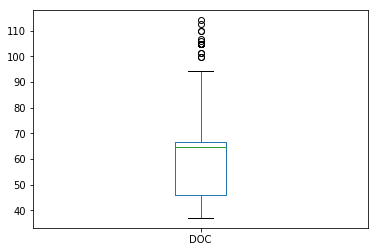

In [80]:
df['DOC'].plot(kind='box')

In [91]:
DOC_data = pd.DataFrame({'Lat':x.flatten(),'Lon':y.flatten(),'Depth':z.flatten(),'DON':V.flatten()})
DOC_data['DOC'] = V.flatten()
DOC_data.head()

,Lat,Lon,Depth,DON,DOP,DOC
0,-89.5,-179.5,0,4.68,0.216,46.39
1,-89.5,-178.5,0,4.68,0.216,46.39
2,-89.5,-177.5,0,4.55,0.216,46.39
3,-89.5,-176.5,0,4.55,0.216,46.39
4,-89.5,-175.5,0,4.55,0.216,46.39


In [93]:
df = pd.read_csv("IMG_EBI_metadata_chemdata.csv",index_col=0)

In [536]:
file = Dataset("woa13_all_o00_01.nc")

lat = file.variables['lat'][:]
lon = file.variables['lon'][:]
depth = file.variables['depth'][:]
val = file.variables['o_an'][0][101][:]

In [537]:
depth[101]

5500.0

In [538]:
unmasked_values= val.flatten()[~val.flatten().mask]
unmask_indices = [i for i in range(len(val.flatten())) if val.flatten()[i] in unmasked_values]

In [152]:
len(unmask_indices)

41088

In [517]:
combined_woa_doc.head()

,Depth,Dissolved_oxygen,Lat,Lon,Phosphate,Nitrate,Oxygen_apparent,Temperature,Salinity,Oxygen_saturation,DOP,DOC,DON,Prediceted_Alk,Prediceted_RHDs
0,0,7.857874,-77.5,-178.5,1.677810,21.152571,0.405582,-1.09091,34.224213,95.259514,0.216,46.39,4.55,136.917119,214.576315
1,0,7.851273,-77.5,-177.5,1.674586,21.359177,0.419207,-1.05341,34.199200,95.096352,0.216,46.39,4.55,137.074631,212.943329
2,0,7.843269,-77.5,-176.5,1.672591,21.541763,0.434657,-0.92791,34.195213,94.911125,0.216,46.02,4.55,138.161441,170.492977
3,0,7.834198,-77.5,-175.5,1.670968,21.676786,0.451038,-1.05231,34.169388,94.714783,0.216,46.02,4.55,135.025965,176.924419
4,0,7.823783,-77.5,-174.5,1.668782,21.747992,0.468328,-1.14351,34.150890,94.507088,0.216,46.02,4.55,135.110418,177.999468


In [544]:
alkb = list(combined_woa_doc[combined_woa_doc['Depth']==5500]['Predicted_AlkB'])

In [479]:
combined_woa_doc['Predicted_AlkB'].max()

665.15279169168218

In [545]:
new_ma_arr = [-999]*64800
j=0
for i in unmask_indices:
    new_ma_arr[i]=alkb[j]
    j+=1
    
Ma = np.ma.masked_equal(new_ma_arr, -999)
Ma = Ma.reshape(180,360)

/Users/uyennguyen/anaconda3/envs/TEST/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3342: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/uyennguyen/anaconda3/envs/TEST/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3381: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


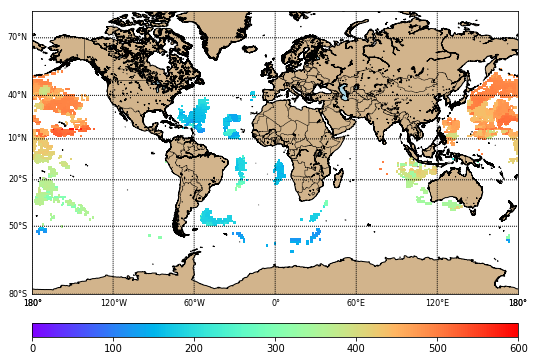

In [548]:
x,y=np.meshgrid(lon,lat)
fig=plt.figure(figsize=(20,6))
map = Basemap(#width=500000000,height=350000000,
            projection='mill',llcrnrlat=-80,urcrnrlat=80,
            llcrnrlon=-180,urcrnrlon=180,lat_ts=10,resolution='i')
xi, yi = map(x, y)
map.fillcontinents(color='tan',lake_color='lightblue')
#map.drawmapboundary()

cs = map.pcolor(xi,yi,Ma,vmin=0,vmax=600,cmap='rainbow')

# Add Grid Lines
map.drawparallels(np.arange(-80., 81., 30.), labels=[1,0,0,0], fontsize=8)
map.drawmeridians(np.arange(-180., 181., 60.), labels=[0,0,0,1], fontsize=8)

# Add Coastlines, States, and Country Boundaries
map.drawcoastlines()
map.drawcountries()
cbar = map.colorbar(cs, location='bottom', pad="10%")
plt.savefig("AlkB_5500m_prediction.png",bbox_inches='tight',dpi=300)

In [357]:
d,la,lo=np.mgrid[0:5500:102j, lat[0]:lat[-1]:180j, lon[0]:lon[-1]:360j]

woa_depth=np.concatenate((np.arange(0,100,5),np.arange(100,500,25),np.arange(500,2000,50),np.arange(2000,5600,100)),axis=0)
woa_depth_new = []
for i in woa_depth:
    woa_depth_new += [i]*lat.shape[0]*lon.shape[0]
d=np.array(woa_depth_new).reshape(102,lat.shape[0],lon.shape[0])
        
d1 = d[~val[0].mask]
lat1 = la[~val[0].mask]
lon1 = lo[~val[0].mask]
val1 = val[0][~val[0].mask]

In [358]:
combined_woa = pd.DataFrame({'Lat':lat1,'Lon':lon1,'Depth':d1,'Dissolved_oxygen':val1})

In [463]:
combined_woa_doc.shape

(3305010, 13)

In [459]:
filenames = {"woa13_all_p00_01.nc":("p_an","Phosphate"),
             "woa13_all_n00_01.nc":("n_an","Nitrate"),
             "woa13_all_A00_01.nc":("A_an","Apparent_oxygen"),
             "woa13_A5B2_t00_01v2.nc":("t_an","Temperature"),
             "woa13_A5B2_s00_01v2.nc":("s_an","Salinity"),
             "woa13_all_oxygen_saturation.nc":("O_an","Oxygen_saturation")}

for filename in filenames:
    file = Dataset(filename)
    var = filenames[filename][0]    
    variable_name = filenames[filename][1]  
    val = file.variables[var][:]
    combined_woa[variable_name] = val[0][~val[0].mask]
combined_woa_doc = pd.merge(combined_woa,DOC_data,on=['Lat','Lon','Depth']) 

In [141]:
combined_woa_doc= pd.read_csv("Combined_woa_doc.csv")

In [470]:
X.columns

Index(['Depth', 'Dissolved_oxygen', 'Phosphate', 'Temperature', 'Salinity',
       'Nitrate'],
      dtype='object')

In [471]:
global_pred=rf.predict(combined_woa_doc[['Depth', 'Dissolved_oxygen', 'Phosphate', 'Temperature', 'Salinity',
       'Nitrate']])

In [472]:
combined_woa_doc['Predicted_AlkB']=np.square(global_pred)

In [473]:
combined_woa_doc.to_csv("Predicted_genes_global_noDOC.csv")

In [514]:
combined_woa_doc = pd.read_csv("Predicted_genes_global.csv",index_col=0)

/Users/uyennguyen/anaconda3/envs/TEST/lib/python3.6/site-packages/numpy/lib/arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


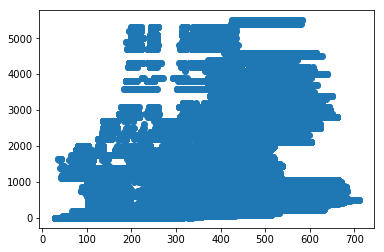

In [207]:
plt.scatter(combined_woa_doc['Predicted_RHD'],combined_woa_doc['Depth'])

In [618]:
lons = combined_woa_doc[combined_woa_doc['Depth']==10]['Lon']
lats = combined_woa_doc[combined_woa_doc['Depth']==10]['Lat']
alkb = combined_woa_doc[combined_woa_doc['Depth']==0]['Prediceted_Alk']

In [560]:
alkb.shape

(41053,)

In [592]:
file = Dataset("MODSCW_P2015245_2000_GM05_closest_chlgradmag.nc")

latitude = file.variables['latitude'][:]
longitude = file.variables['longitude'][:]
altitude = file.variables['altitude'][:]
val = file.variables['chlor_a'][:]

In [594]:
altitude.shape

(1,)

In [73]:
#generate new grid X,Y,Z
#print("Generate new grid...")
xi,yi,zi=np.ogrid[0:5500:102j, -89.5:89.5:180j, -179.5:179.5:360j]
X1=xi.reshape(xi.shape[0],)
Y1=yi.reshape(yi.shape[1],)
Z1=zi.reshape(zi.shape[2],)
ar_len=len(X1)*len(Y1)*len(Z1)
X=np.arange(ar_len,dtype=float)
Y=np.arange(ar_len,dtype=float)
Z=np.arange(ar_len,dtype=float)
l=0
for i in range(0,len(X1)):
    for j in range(0,len(Y1)):
        for k in range(0,len(Z1)):
            X[l]=X1[i]
            Y[l]=Y1[j]
            Z[l]=Z1[k]
            l=l+1
V = griddata((d1,lat1,lon1), phos1, (X,Y,Z), method='linear')